<a href="https://colab.research.google.com/github/Shehab-Badran/AI-project/blob/main/Task3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: !pip install gym torch numpy matplotlib

!pip install gym torch numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

# Create environment
env = gym.make("CartPole-v1")



---



---



In [ ]:
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, action_dim)
        )

    def forward(self, x):
        return self.fc(x)


In [ ]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size):
        transitions = random.sample(self.buffer, batch_size)
        return map(np.array, zip(*transitions))

    def __len__(self):
        return len(self.buffer)


In [ ]:
def train_dqn(episodes=10, batch_size=9):
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    policy_net = DQN(state_dim, action_dim)
    target_net = DQN(state_dim, action_dim)
    target_net.load_state_dict(policy_net.state_dict())

    optimizer = optim.Adam(policy_net.parameters(), lr=0.001)
    replay_buffer = ReplayBuffer(10)

    gamma = 0.000099
    epsilon = 0.00001
    epsilon_min = 0.00001
    epsilon_decay = 0.000995
    target_update = 1

    rewards = []

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0

        while True:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    action = policy_net(state_tensor).argmax().item()

            next_state, reward, done, _ = env.step(action)
            replay_buffer.push((state, action, reward, next_state, done))

            state = next_state
            total_reward += reward

            if done:
                break

            if len(replay_buffer) > batch_size:
                states, actions, rewards_, next_states, dones = replay_buffer.sample(batch_size)

                states = torch.FloatTensor(states)
                actions = torch.LongTensor(actions)
                rewards_ = torch.FloatTensor(rewards_)
                next_states = torch.FloatTensor(next_states)
                dones = torch.FloatTensor(dones)

                q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
                next_q = target_net(next_states).max(1)[0]
                expected_q = rewards_ + gamma * next_q * (1 - dones)

                loss = nn.MSELoss()(q_values, expected_q.detach())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        rewards.append(total_reward)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)

        if ep % target_update == 0:
            target_net.load_state_dict(policy_net.state_dict())

        print(f"Episode {ep}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    return rewards


In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

# Create environment
env = gym.make("CartPole-v1", render_mode="rgb_array")  # Set render_mode for visualization

# DQN Class (Assuming it's defined elsewhere in your code)
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, action_dim)
        )

    def forward(self, x):
        return self.fc(x)

# ReplayBuffer Class (Assuming it's defined elsewhere in your code)
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size):
        transitions = random.sample(self.buffer, batch_size)
        return map(np.array, zip(*transitions))

    def __len__(self):
        return len(self.buffer)

def train_dqn(episodes=1000, batch_size=128):  # Increased episodes and batch_size
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    policy_net = DQN(state_dim, action_dim)
    target_net = DQN(state_dim, action_dim)
    target_net.load_state_dict(policy_net.state_dict())

    optimizer = optim.Adam(policy_net.parameters(), lr=0.001)
    replay_buffer = ReplayBuffer(10000)

    gamma = 0.99
    epsilon = 1.0
    epsilon_min = 0.01
    epsilon_decay = 0.99  # Faster decay for faster exploration
    target_update = 5  # More frequent updates

    rewards = []  # Initialize rewards list

    for ep in range(episodes):
        state = env.reset()
        if isinstance(state, dict):  # Check if state is a dictionary
            state = state['observation']  # Extract the 'observation' value

        total_reward = 0

        while True:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                with torch.no_grad():
                    action = policy_net(state_tensor).argmax().item()

            next_state, reward, done, _ = env.step(action)

            # Check if next_state is a dictionary
            if isinstance(next_state, dict):
                next_state = next_state['observation']

            reward = reward * 2  # Increase reward
            replay_buffer.push((state, action, reward, next_state, done))

            state = next_state
            total_reward += reward

            if done:
                break

            if len(replay_buffer) > batch_size:
                states, actions, rewards_, next_states, dones = replay_buffer.sample(batch_size)

                states = torch.FloatTensor(states)
                actions = torch.LongTensor(actions)
                rewards_ = torch.FloatTensor(rewards_)
                next_states = torch.FloatTensor(next_states)
                dones = torch.FloatTensor(dones)

                q_values = policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()
                next_q = target_net(next_states).max(1)[0]
                expected_q = rewards_ + gamma * next_q * (1 - dones)

                loss = nn.MS

In [ ]:
rewards = train_dqn()

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("DQN on CartPole")
plt.show()


Episode 0, Reward: 18.0, Epsilon: 0.995
Episode 1, Reward: 23.0, Epsilon: 0.990
Episode 2, Reward: 28.0, Epsilon: 0.985
Episode 3, Reward: 16.0, Epsilon: 0.980
Episode 4, Reward: 20.0, Epsilon: 0.975
Episode 5, Reward: 42.0, Epsilon: 0.970
Episode 6, Reward: 13.0, Epsilon: 0.966
Episode 7, Reward: 26.0, Epsilon: 0.961
Episode 8, Reward: 29.0, Epsilon: 0.956
Episode 9, Reward: 10.0, Epsilon: 0.951
Episode 10, Reward: 47.0, Epsilon: 0.946
Episode 11, Reward: 16.0, Epsilon: 0.942
Episode 12, Reward: 22.0, Epsilon: 0.937
Episode 13, Reward: 20.0, Epsilon: 0.932
Episode 14, Reward: 22.0, Epsilon: 0.928
Episode 15, Reward: 30.0, Epsilon: 0.923
Episode 16, Reward: 20.0, Epsilon: 0.918
Episode 17, Reward: 14.0, Epsilon: 0.914
Episode 18, Reward: 11.0, Epsilon: 0.909
Episode 19, Reward: 48.0, Epsilon: 0.905
Episode 20, Reward: 18.0, Epsilon: 0.900
Episode 21, Reward: 75.0, Epsilon: 0.896
Episode 22, Reward: 17.0, Epsilon: 0.891
Episode 23, Reward: 19.0, Epsilon: 0.887
Episode 24, Reward: 17.0, 

KeyboardInterrupt: 

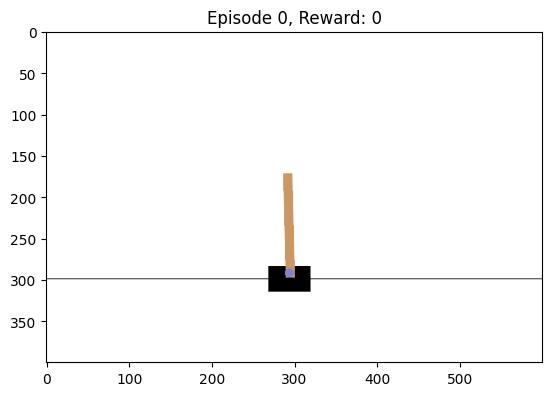

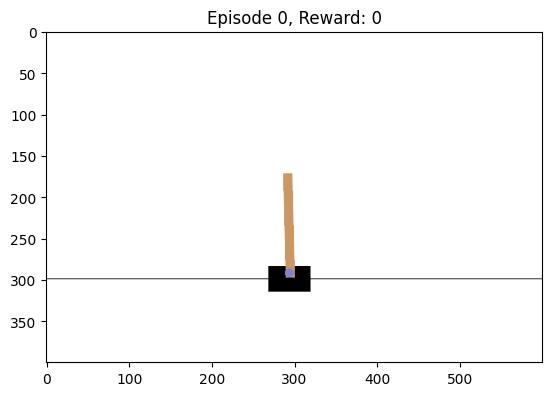

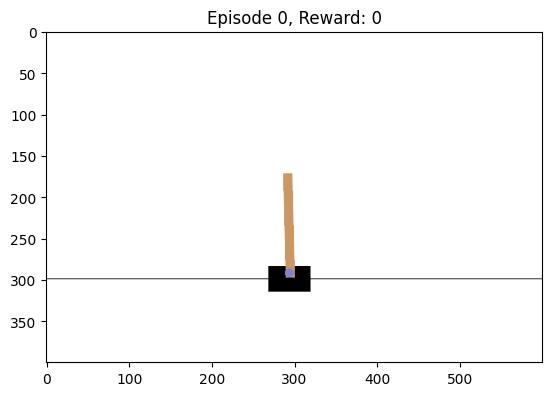

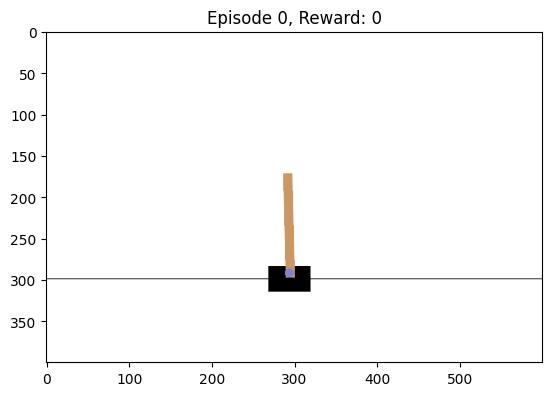

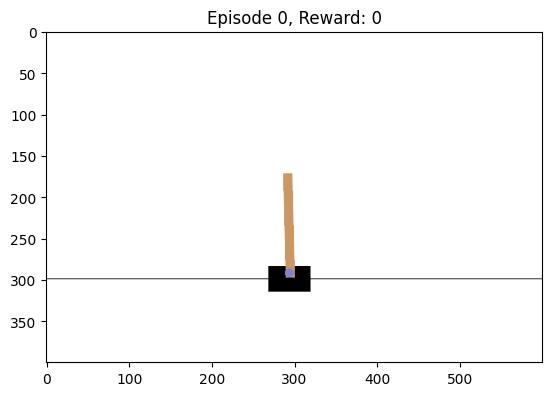

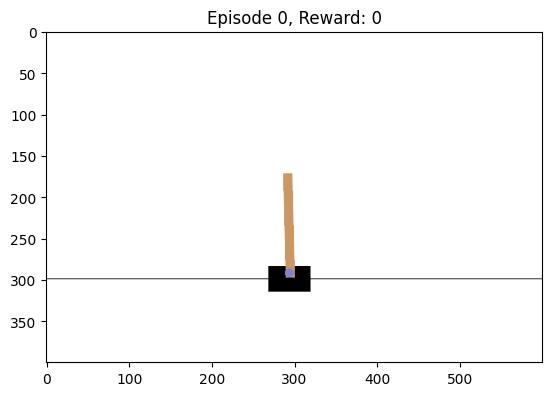

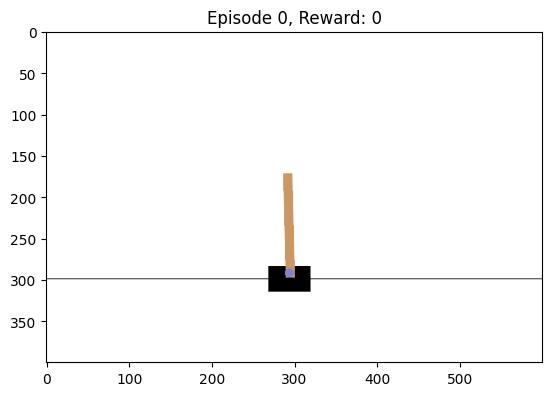

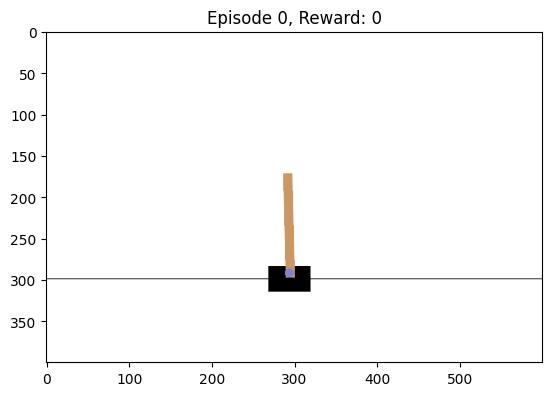

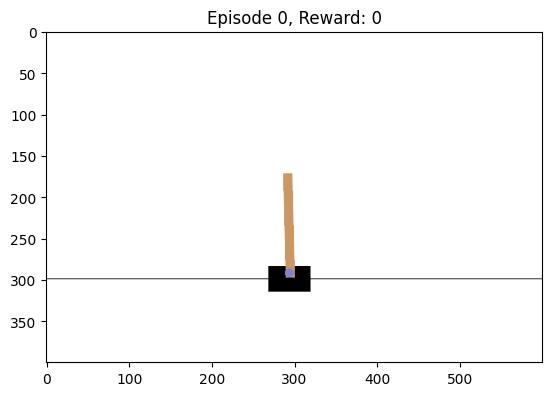

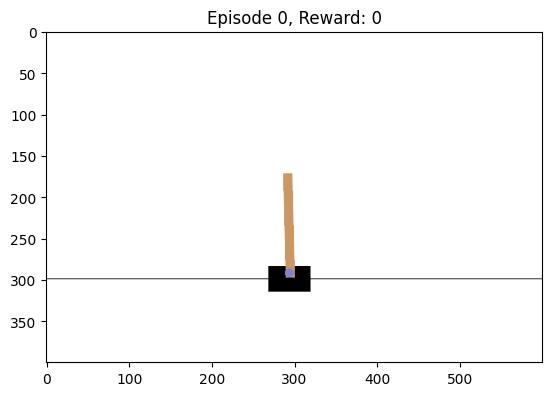

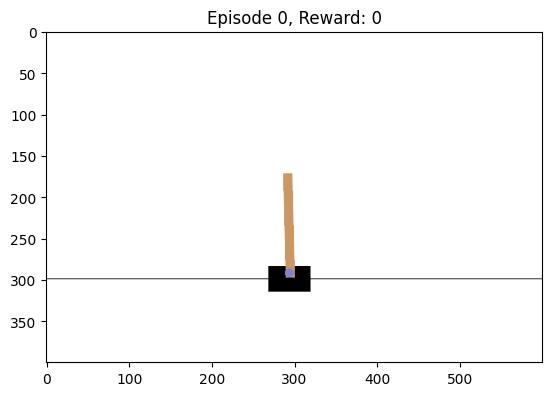

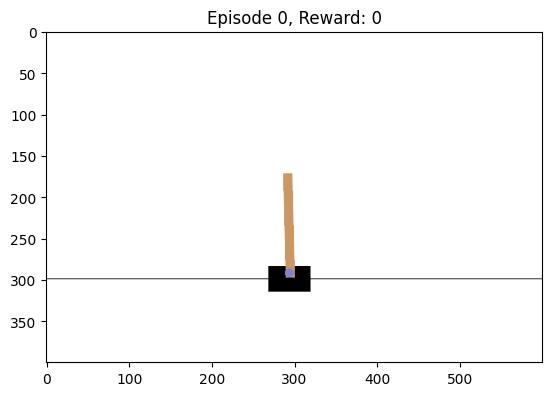

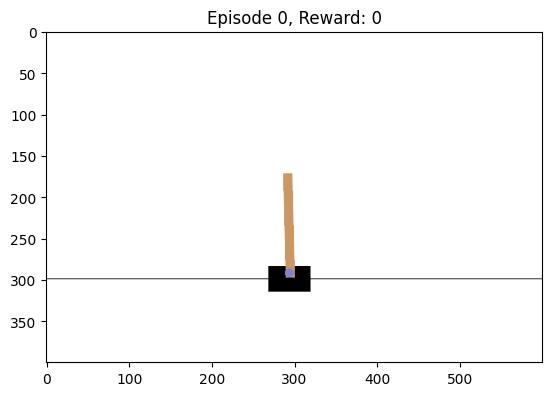

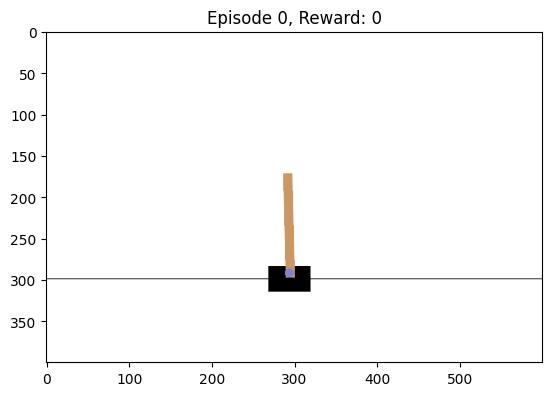

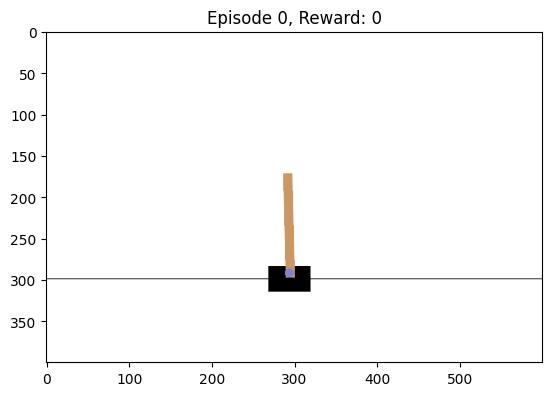

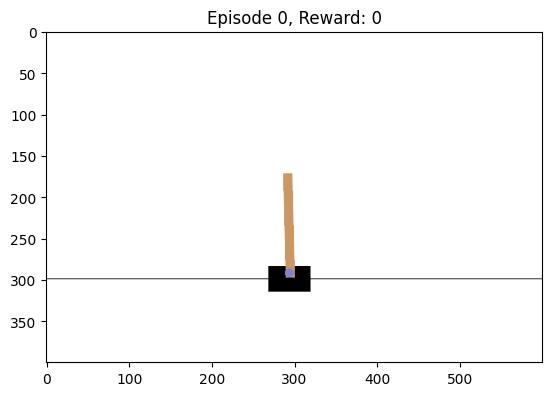

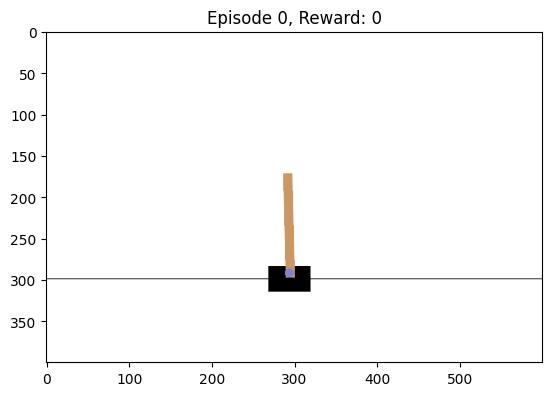

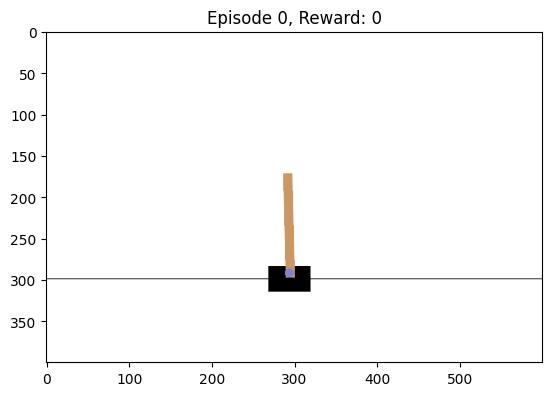

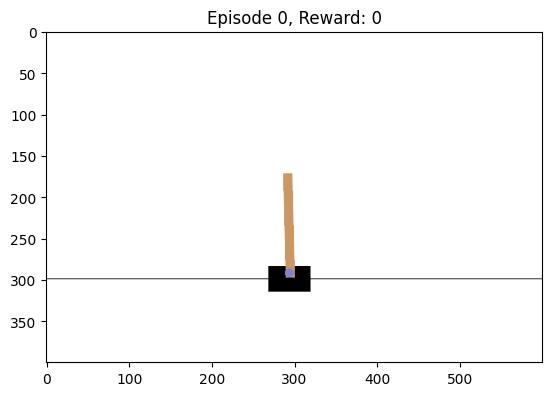

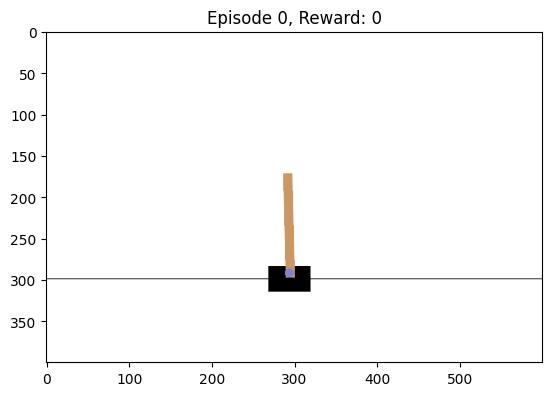

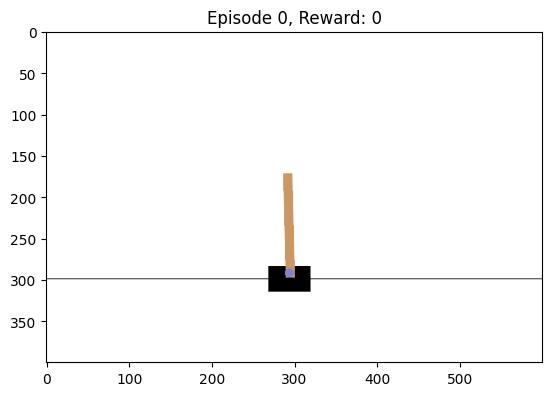

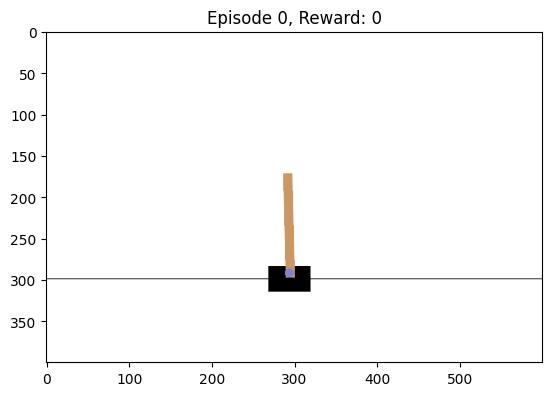

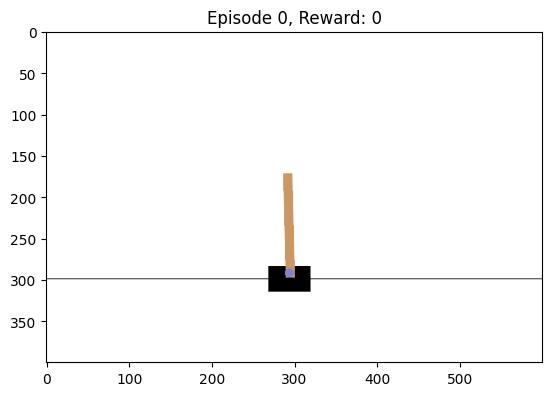

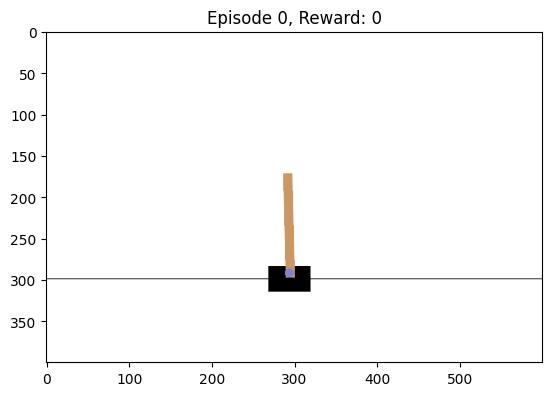

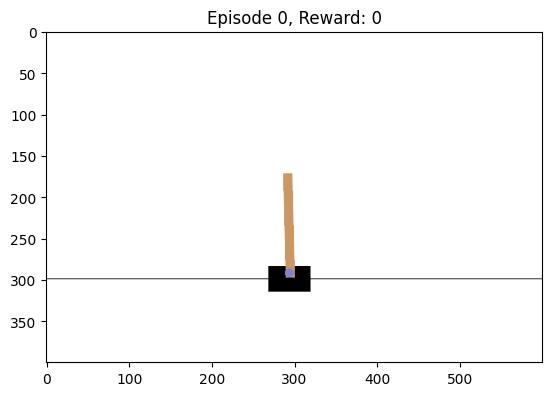

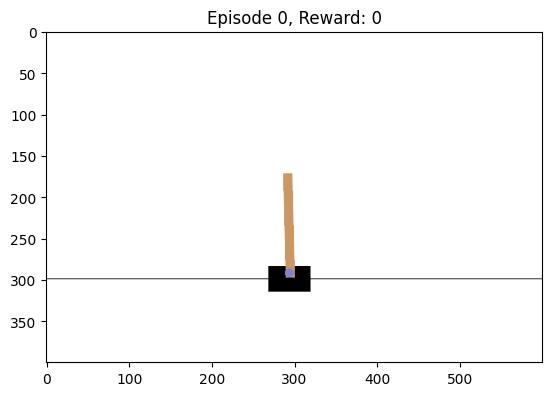

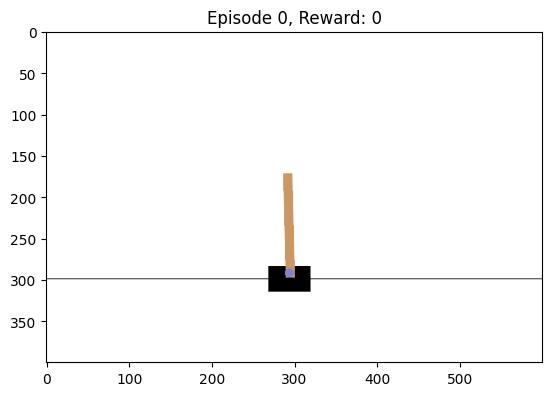

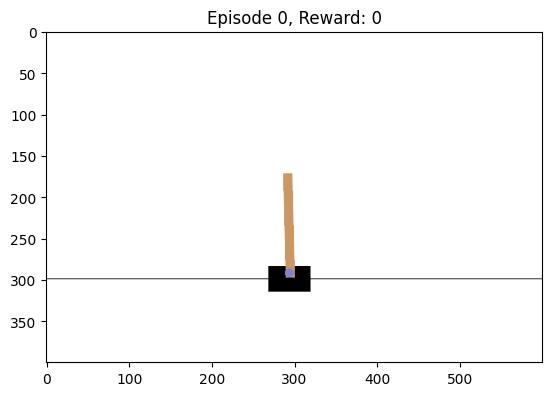

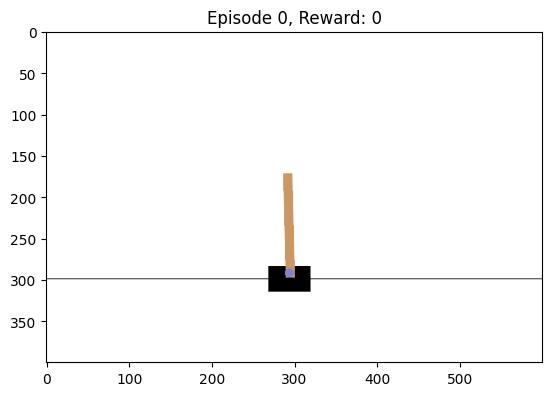

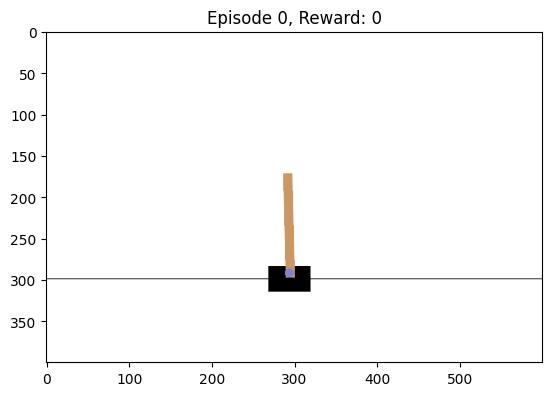

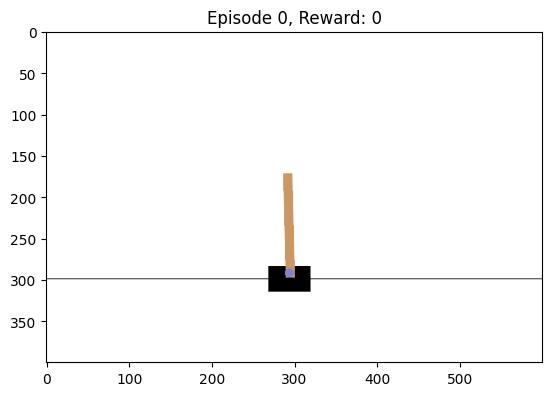

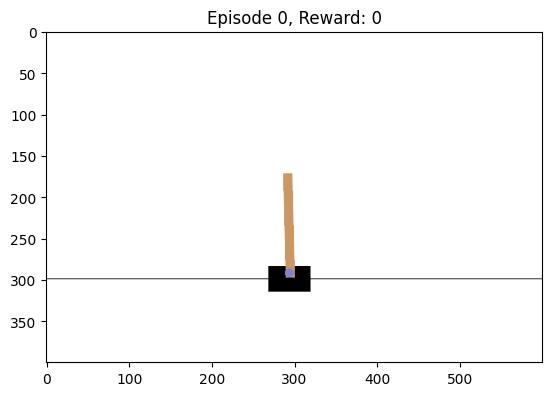

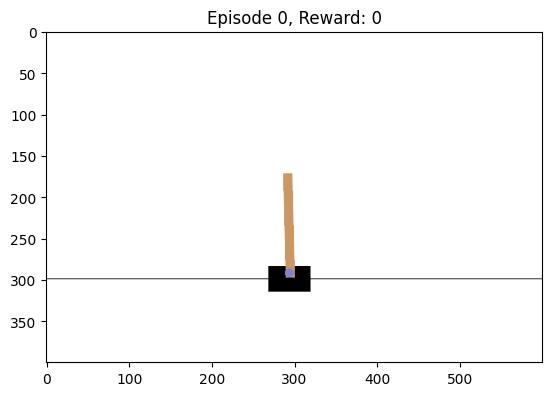

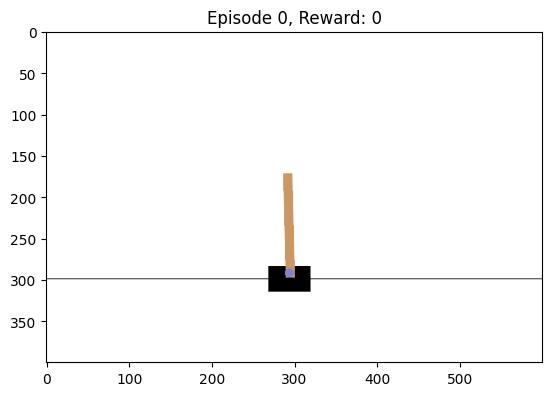

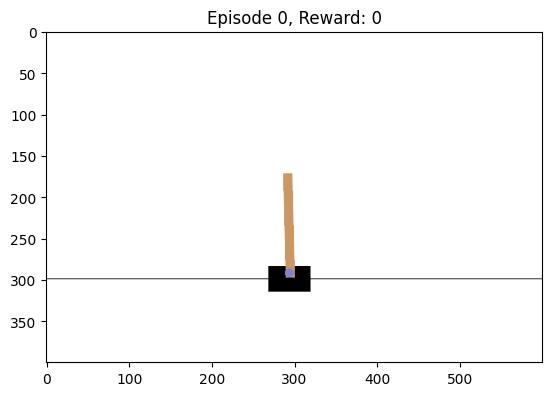

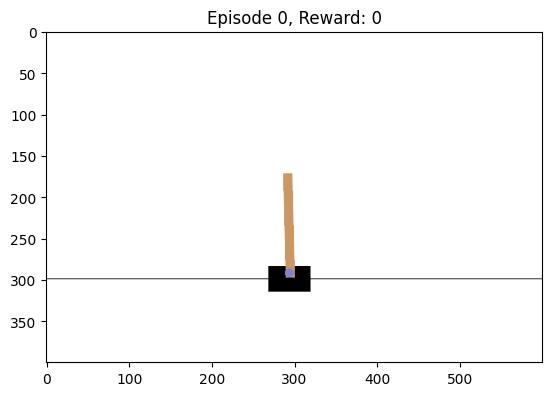

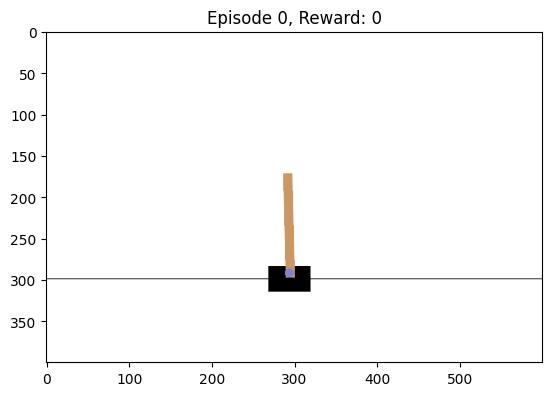

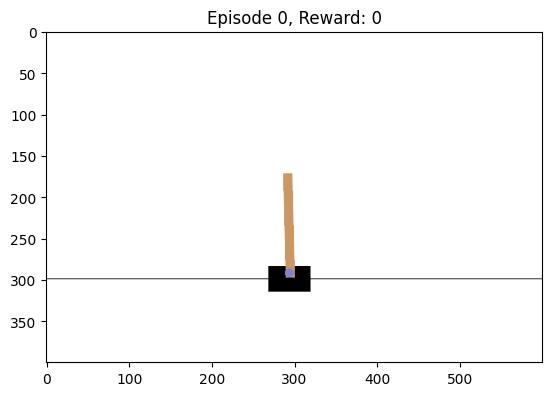

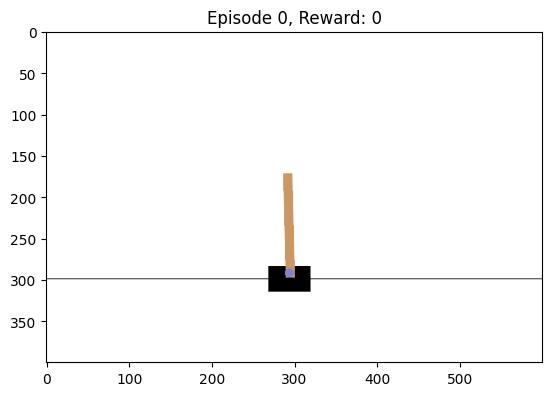

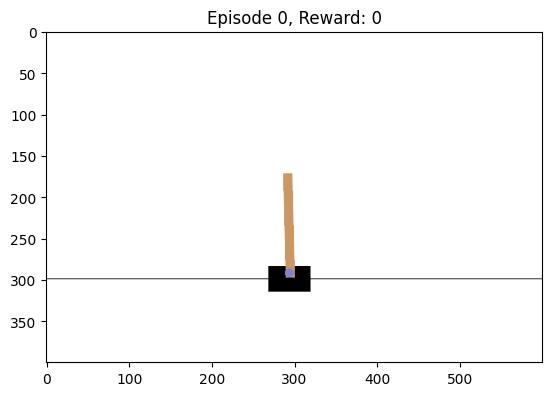

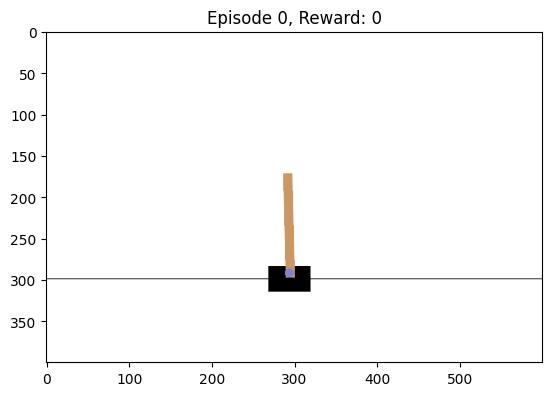

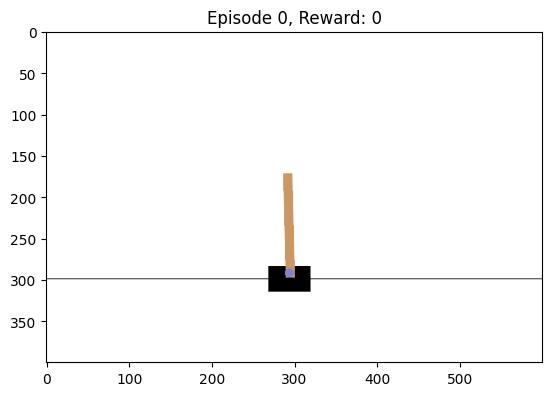

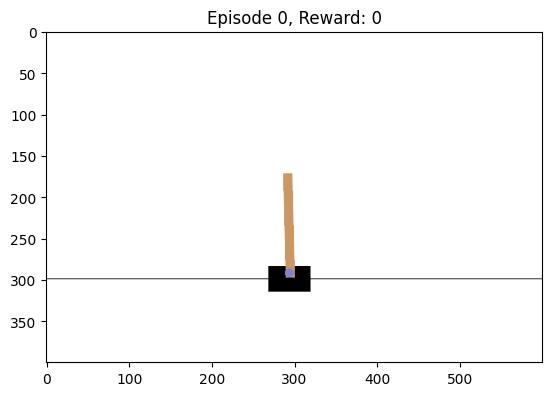

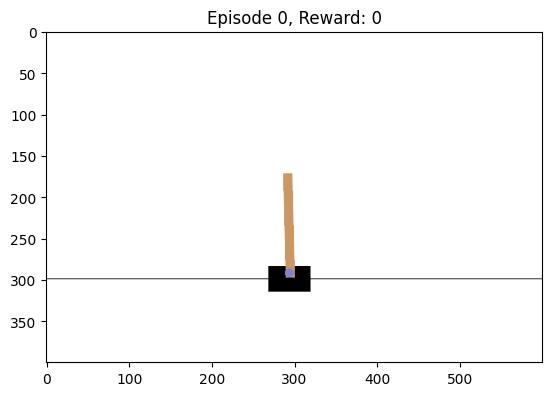

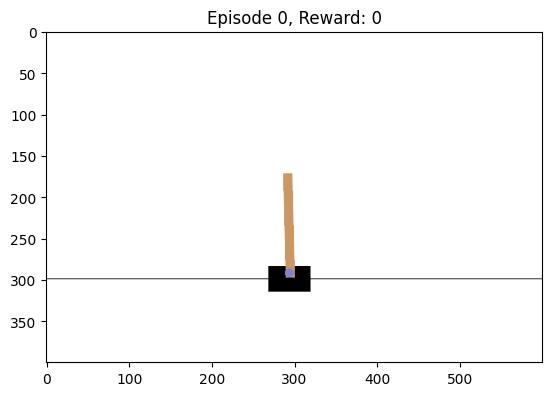

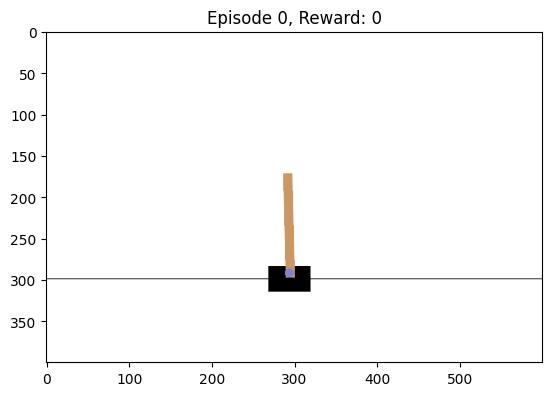

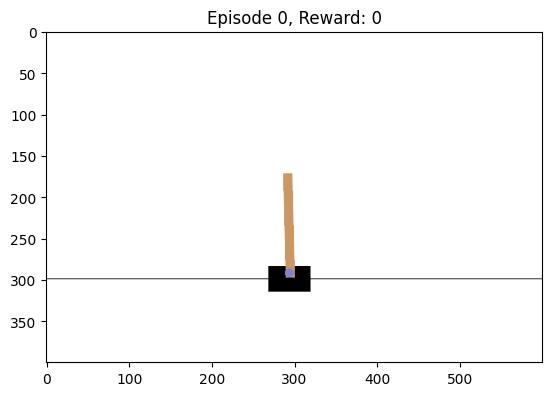

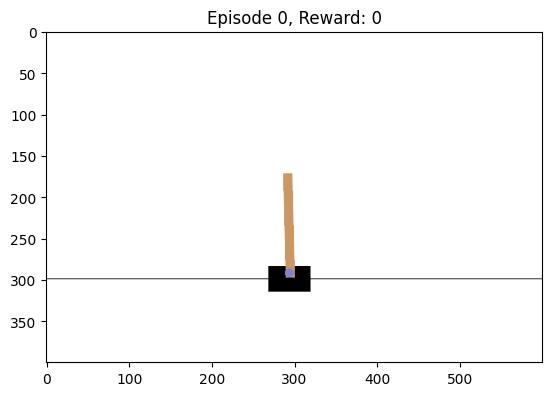

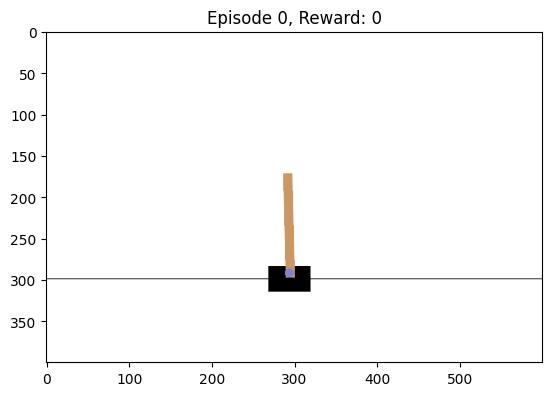

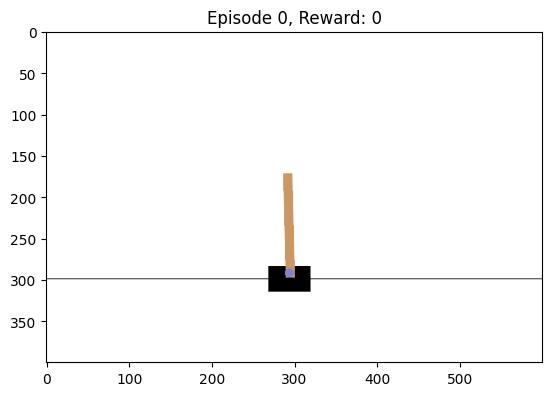

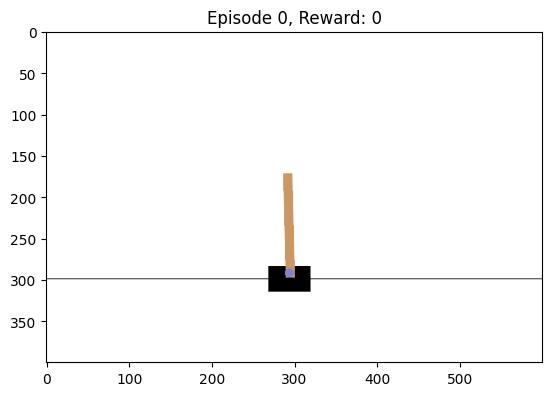

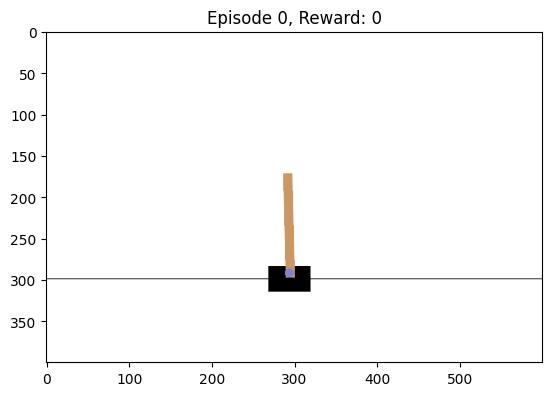

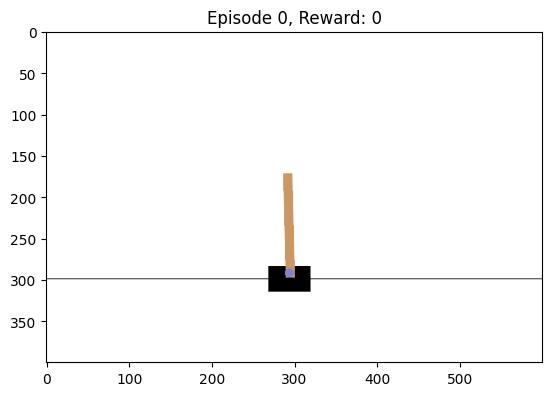

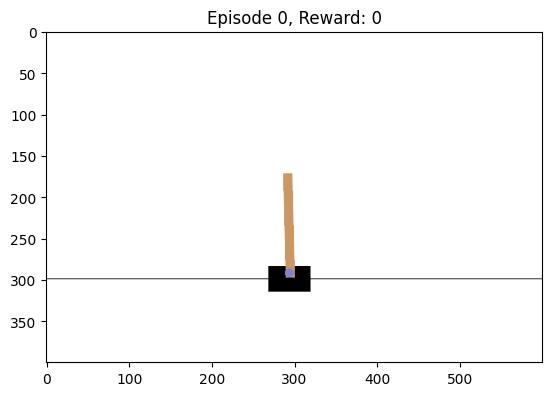

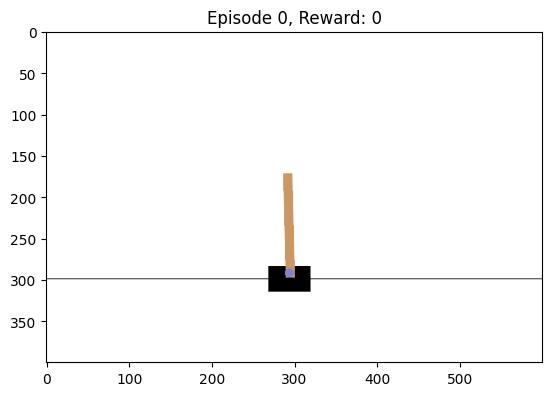

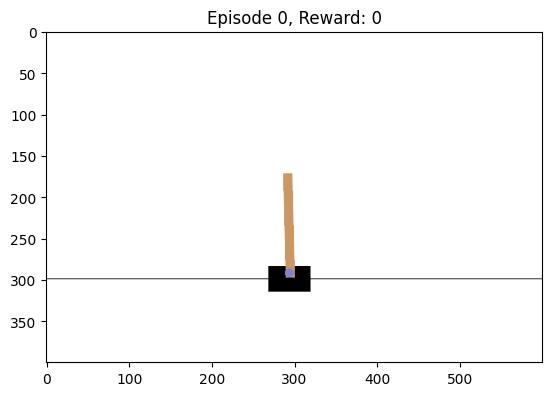

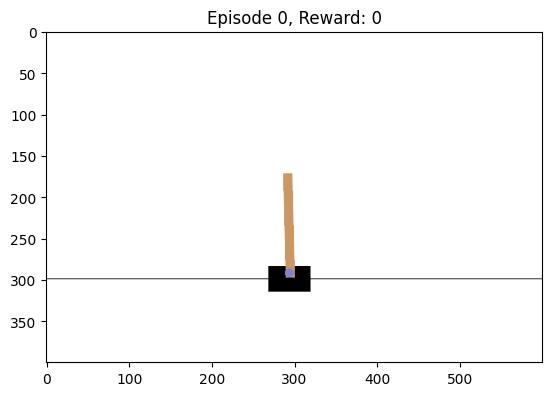

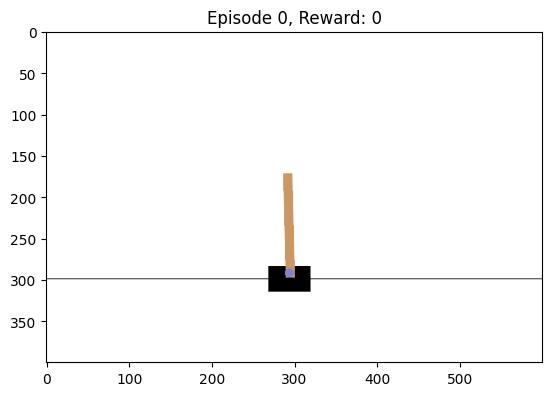

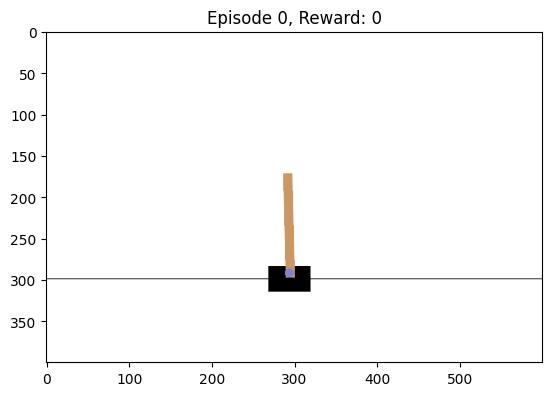

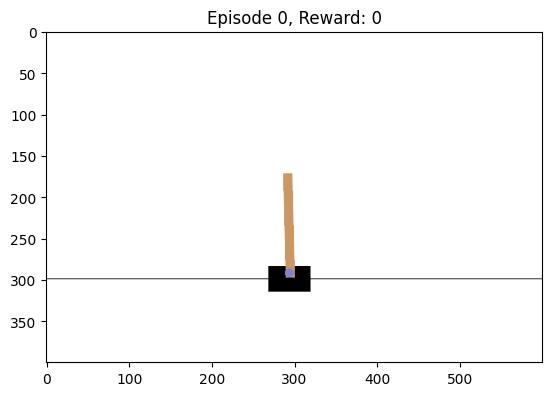

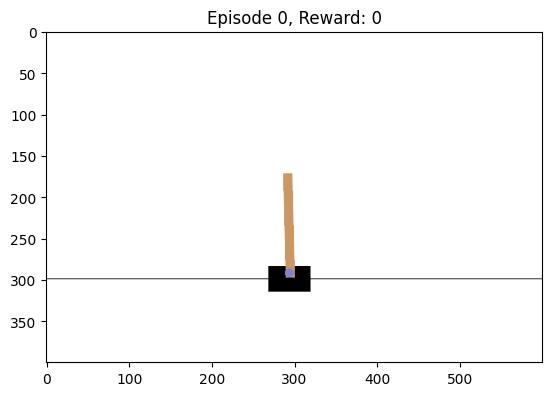

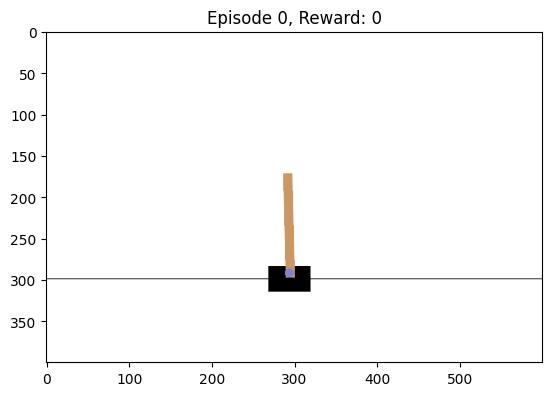

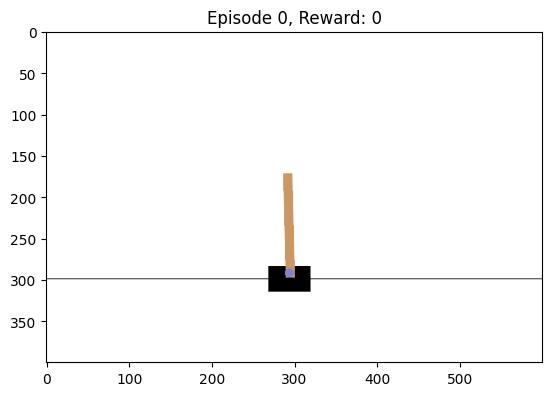

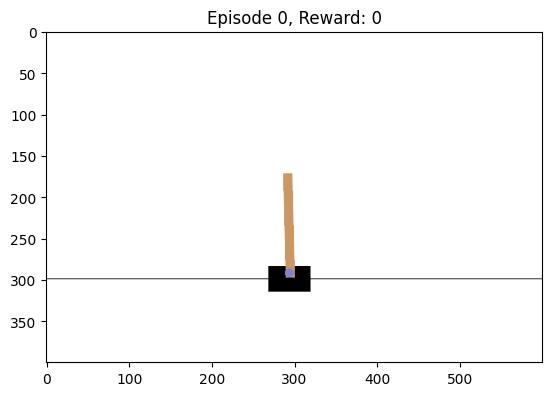

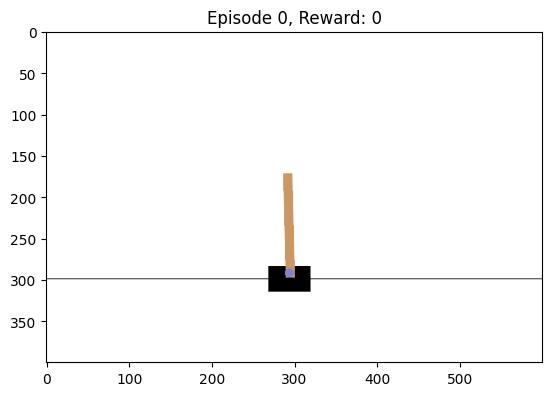

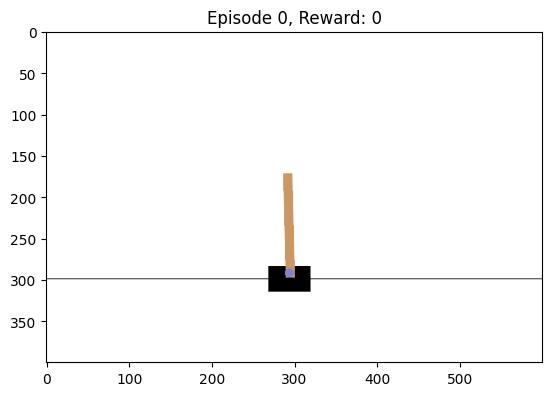

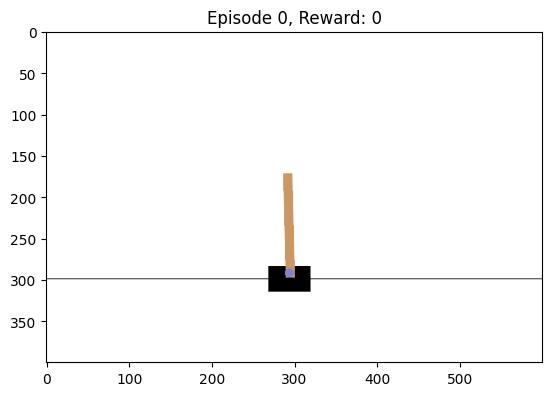

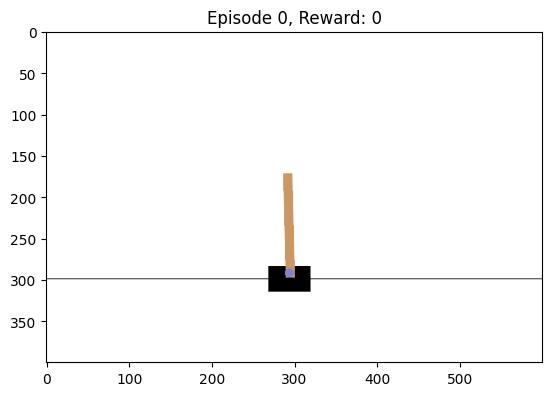

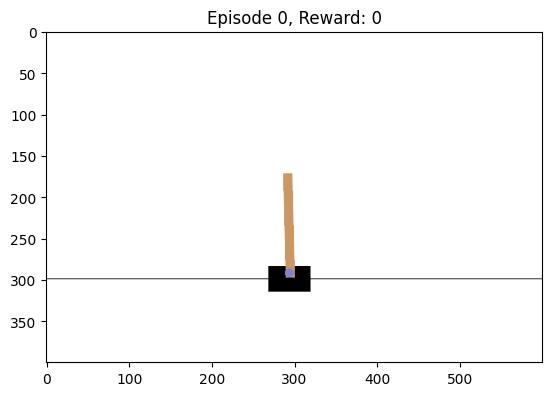

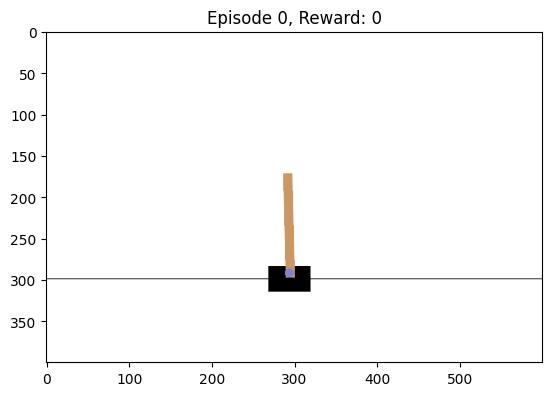

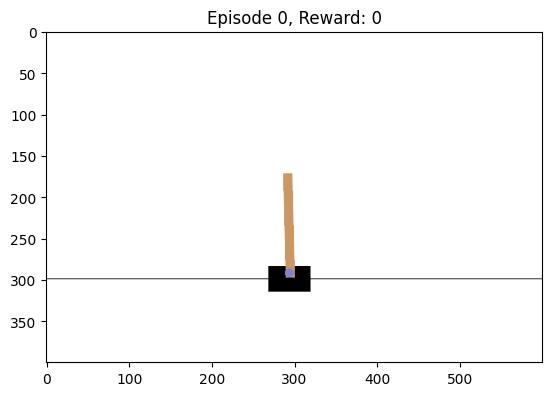

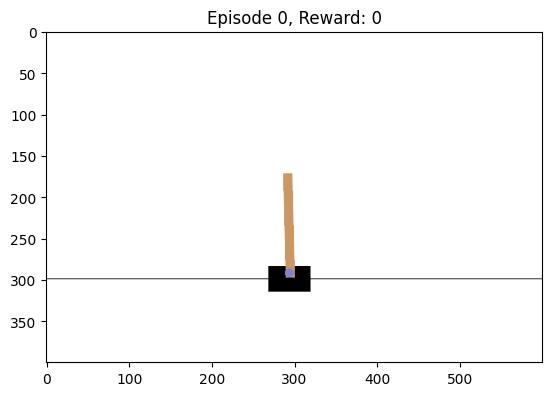

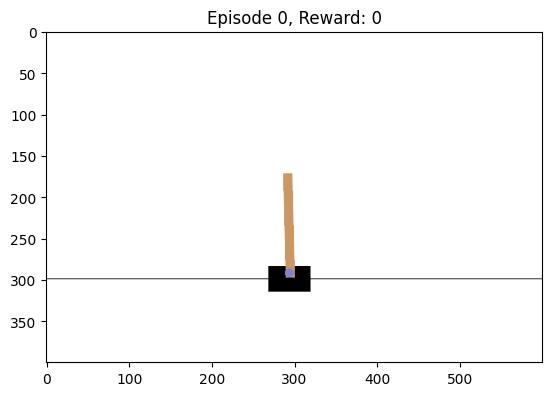

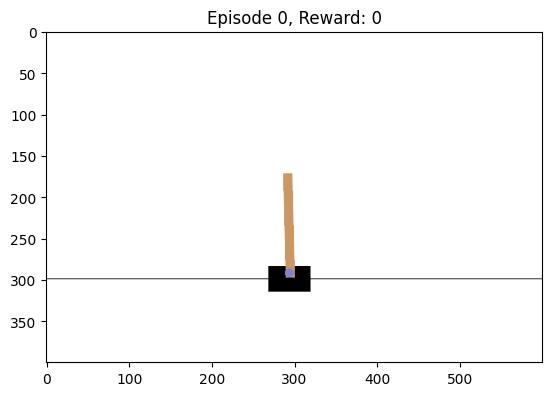

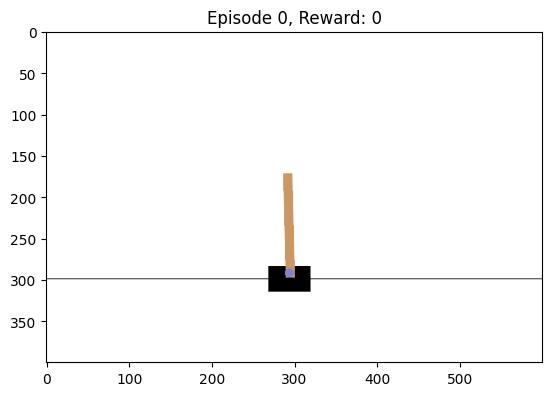

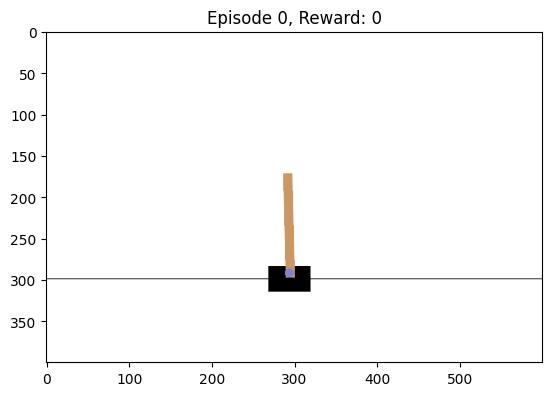

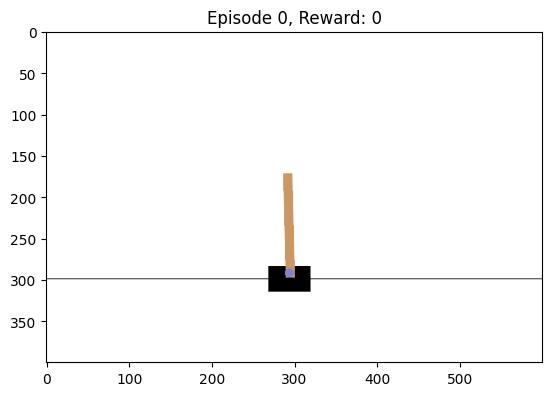

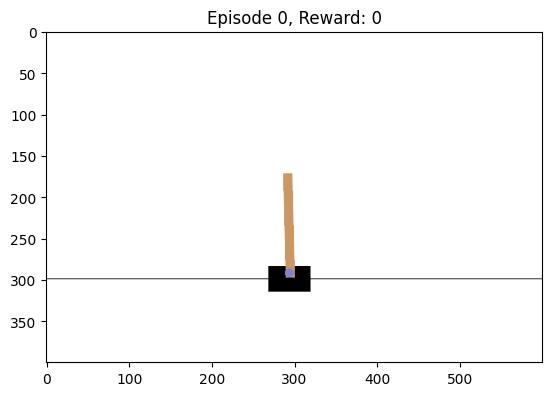

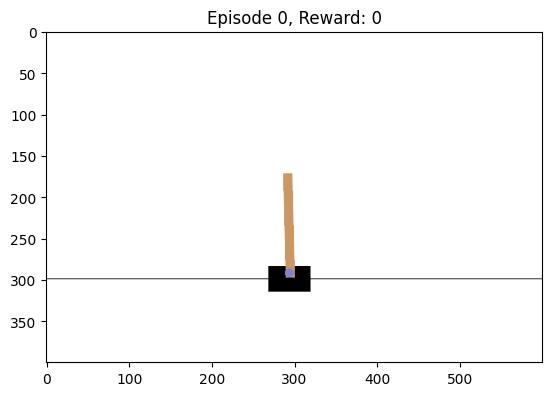

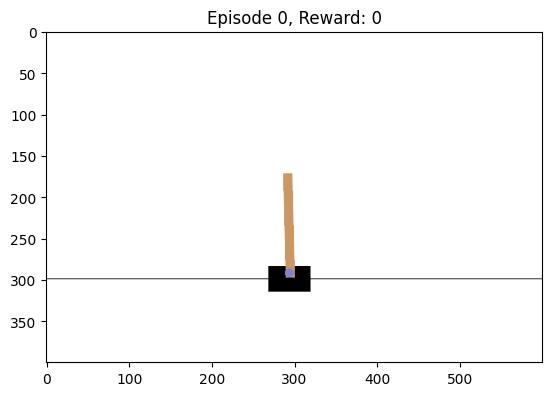

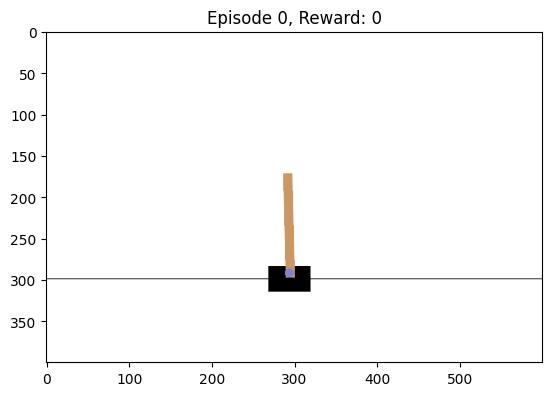

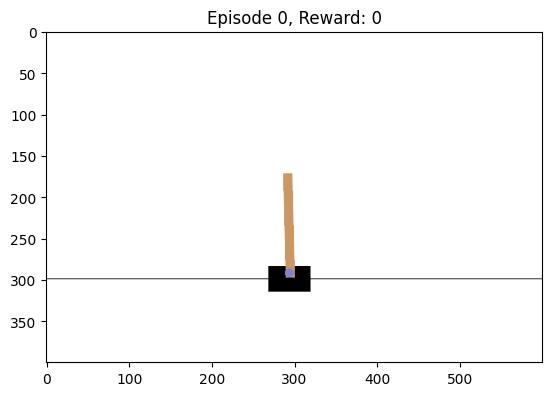

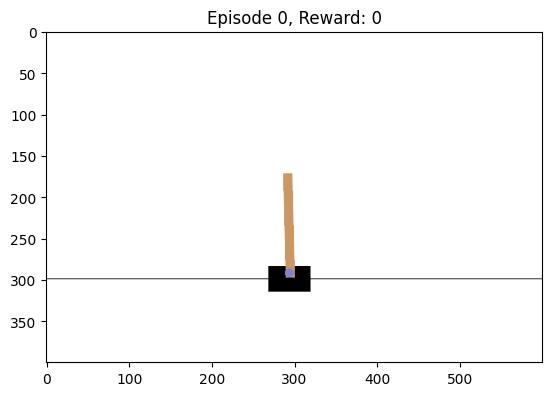

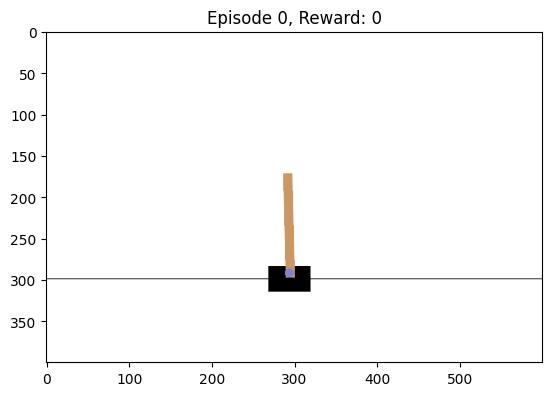

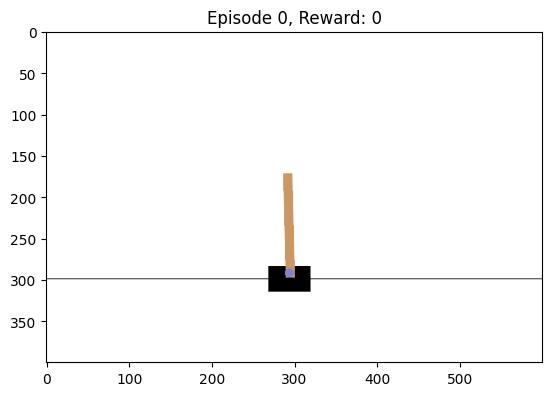

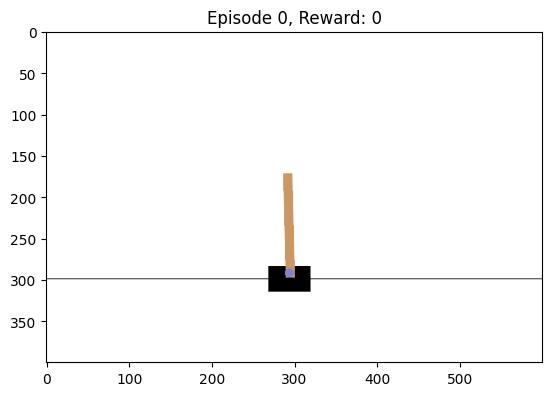

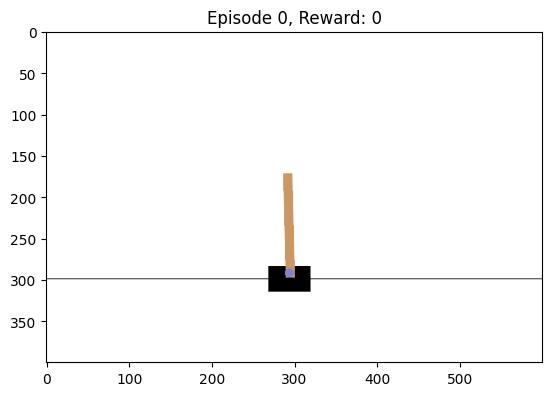

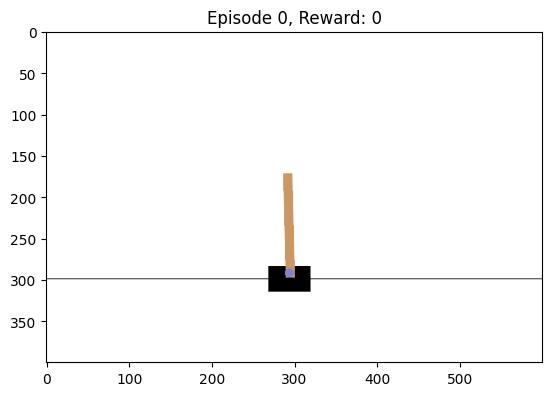

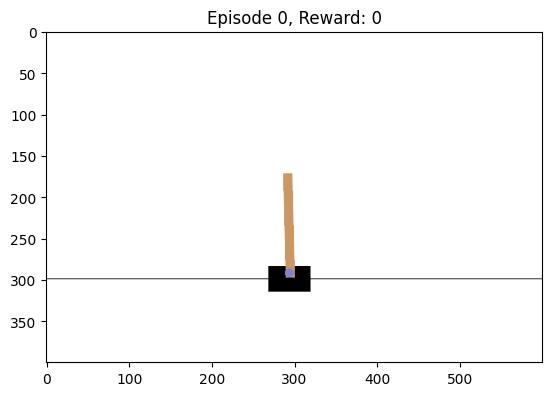

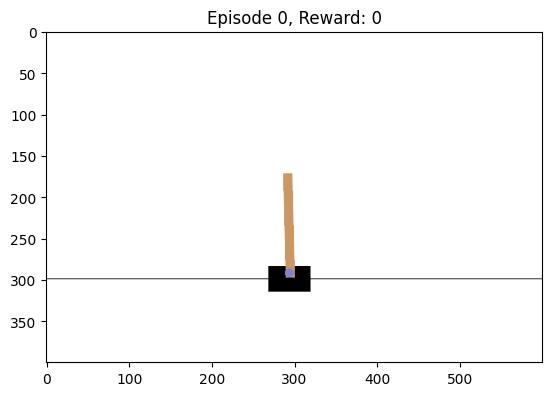

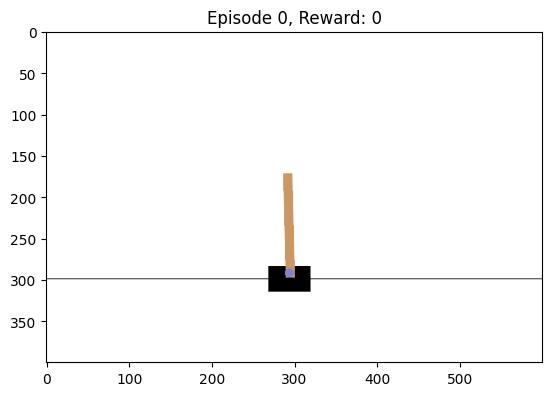

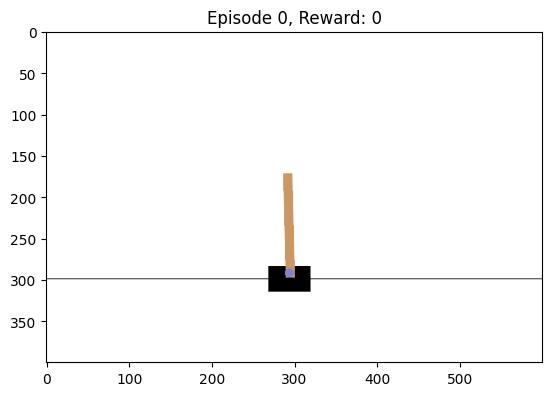

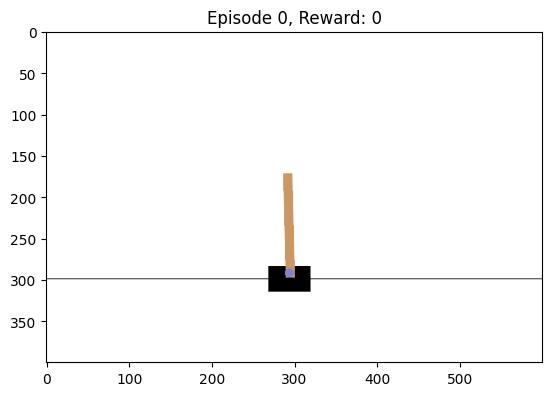

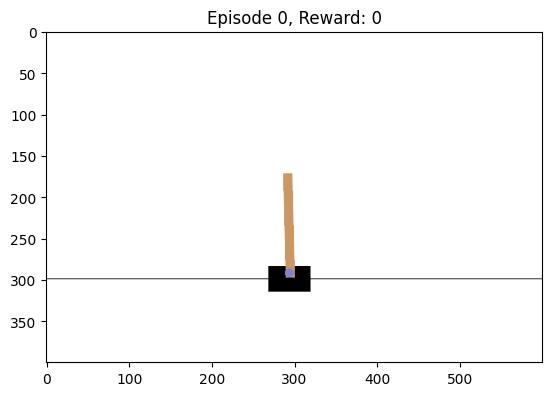

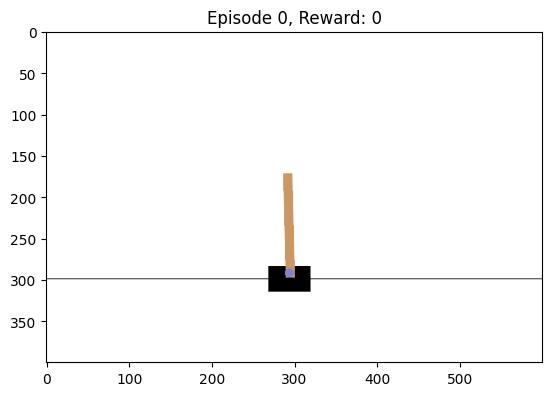

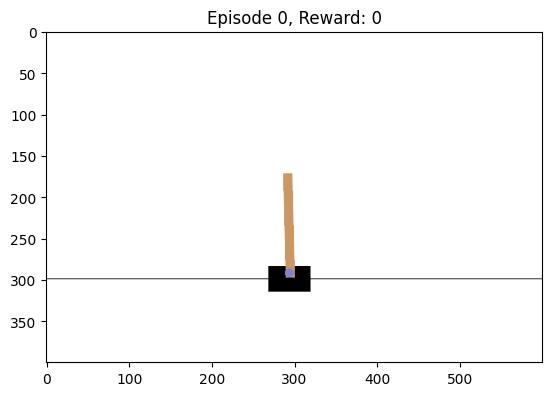

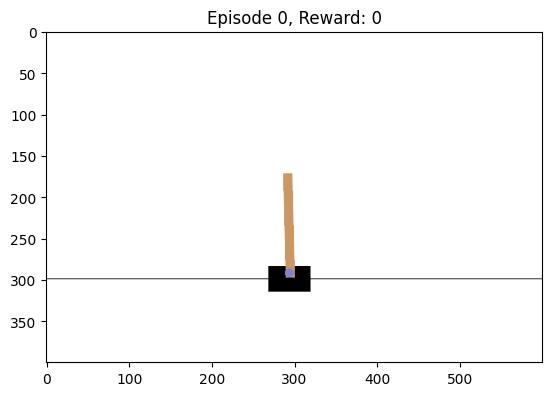

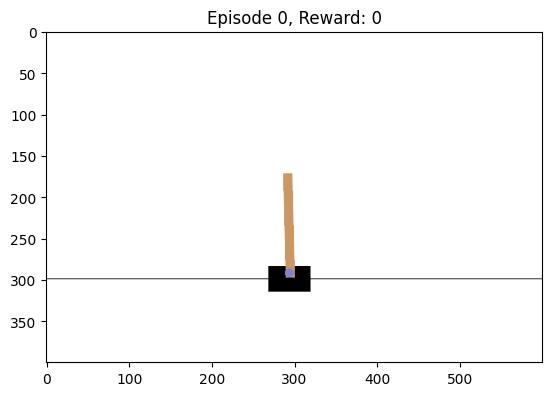

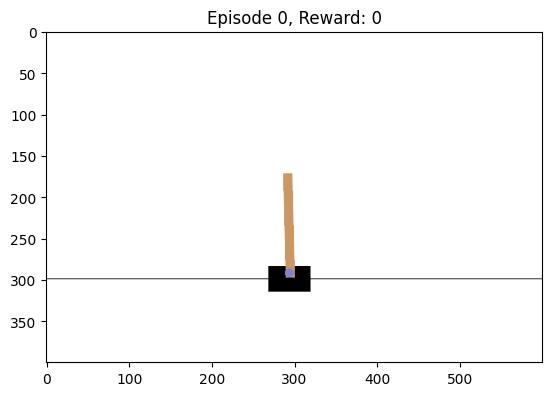

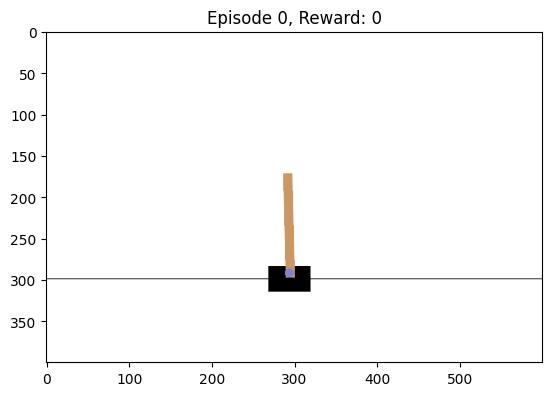

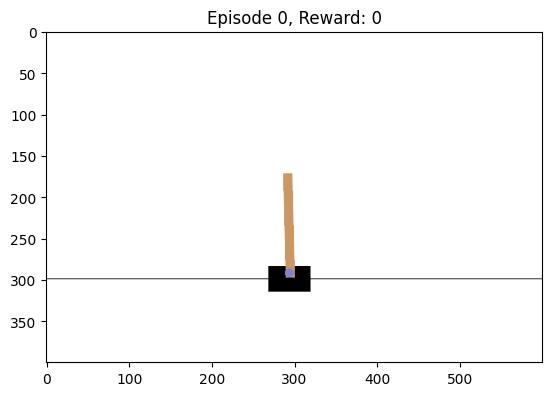

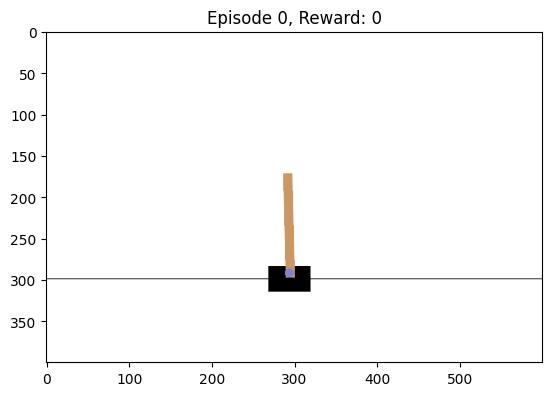

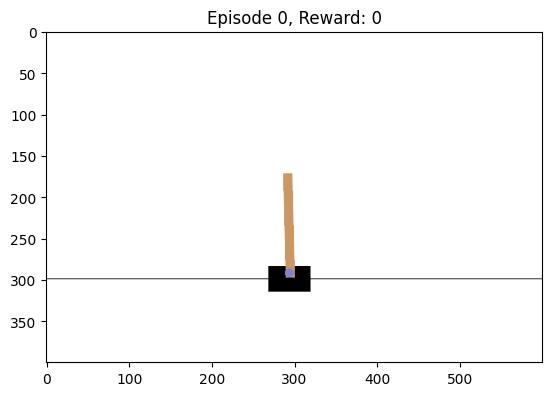

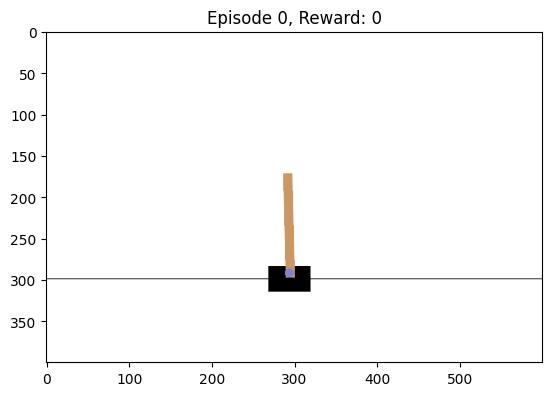

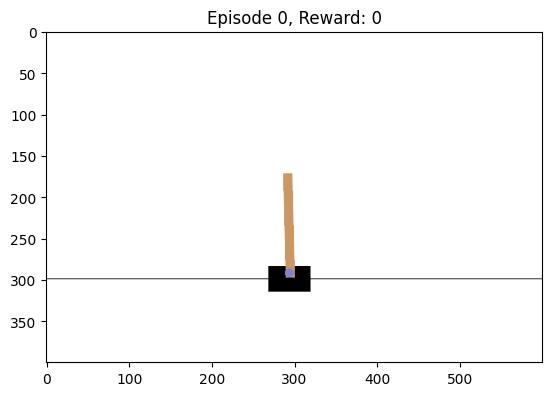

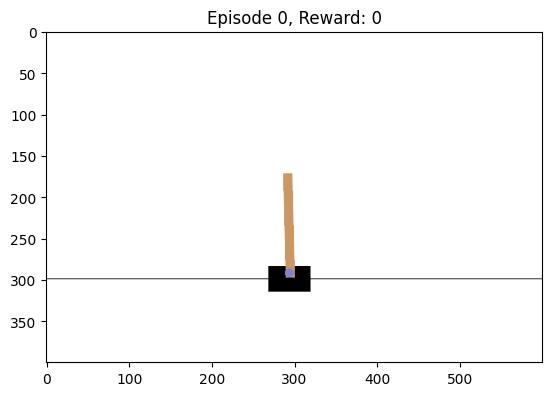

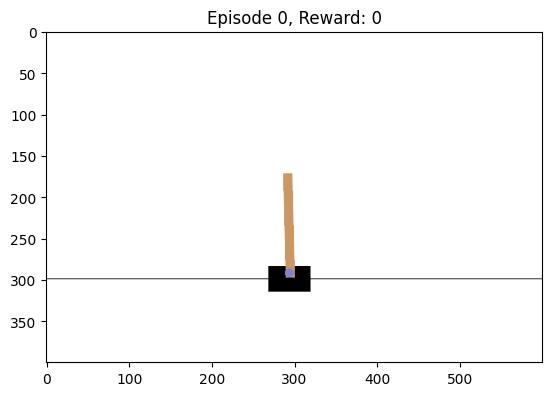

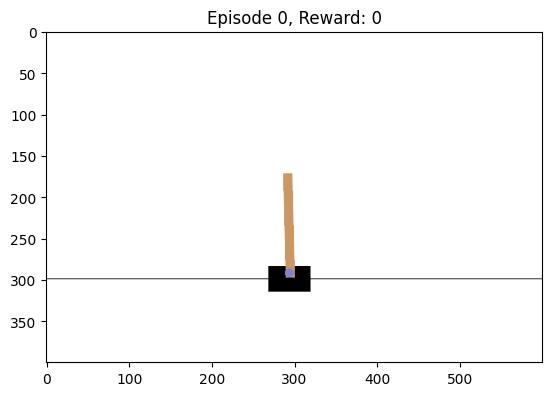

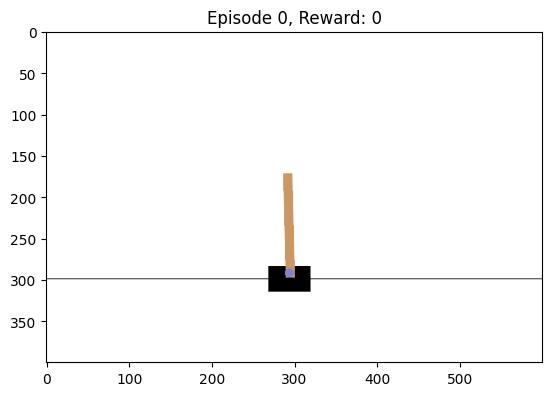

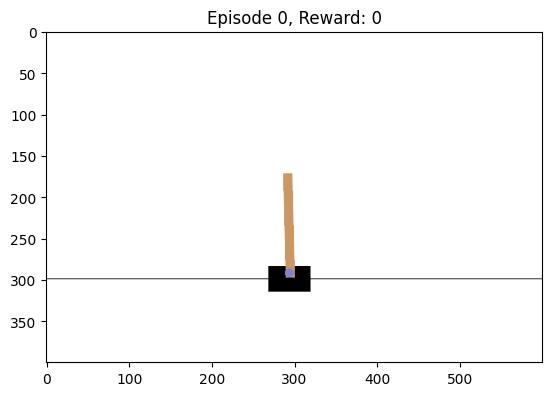

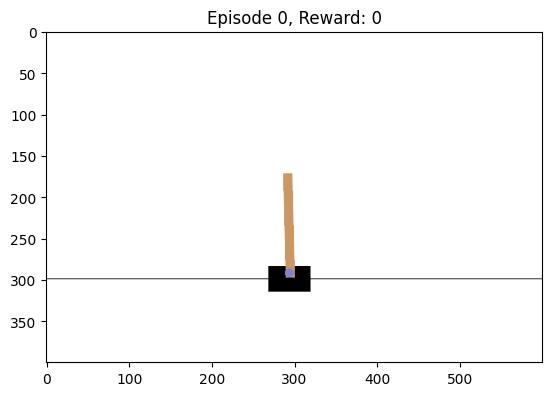

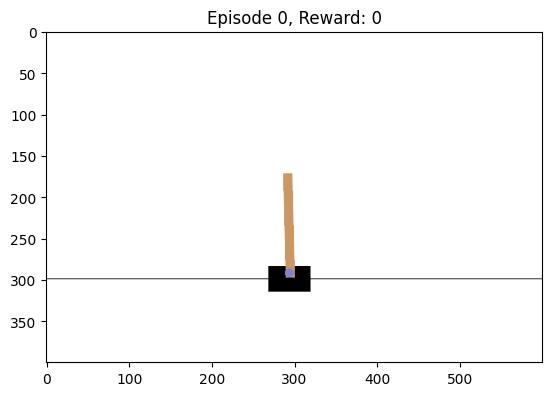

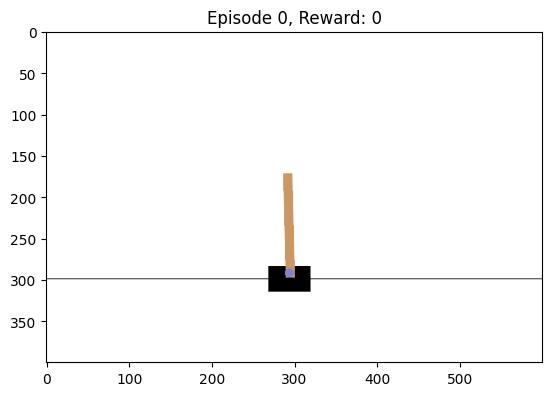

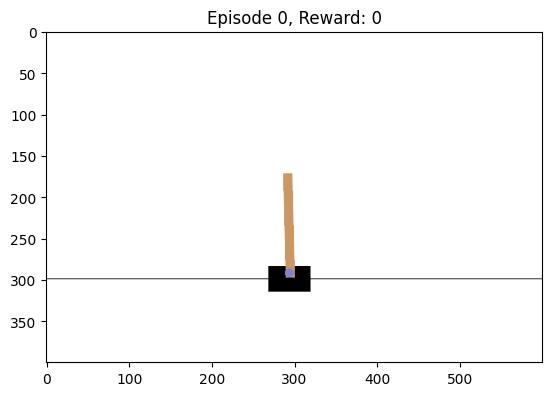

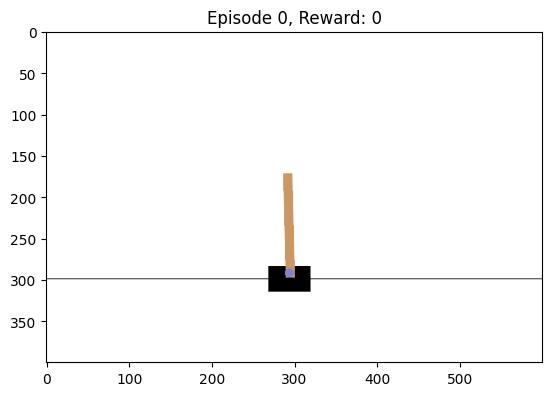

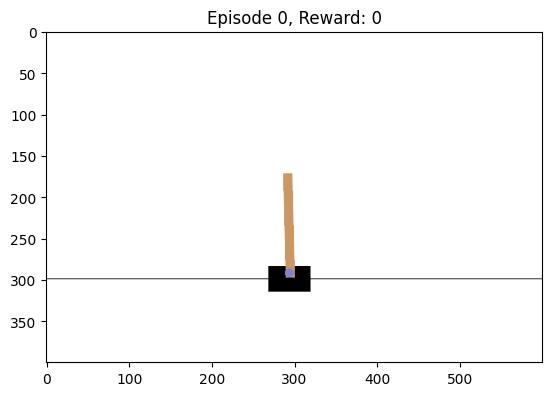

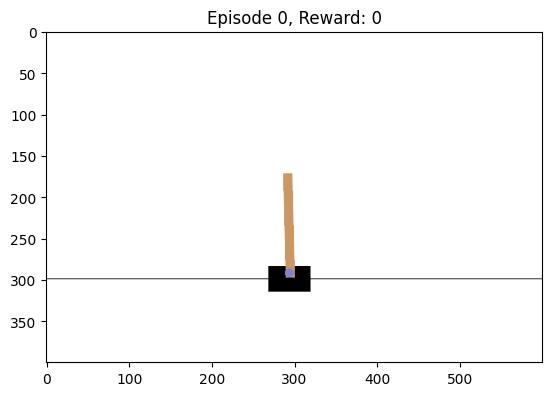

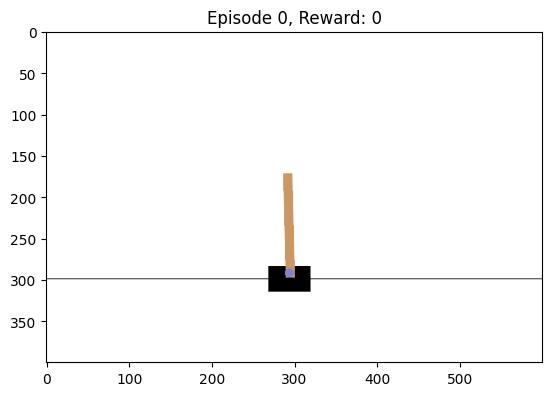

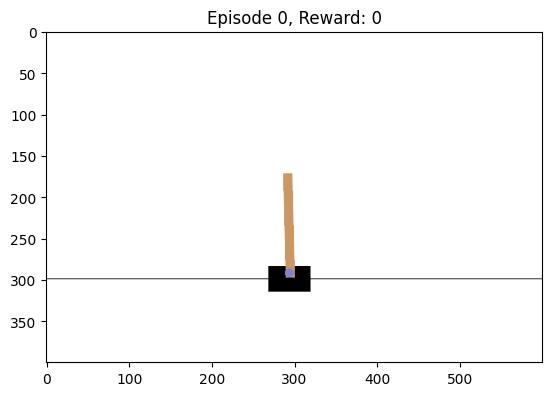

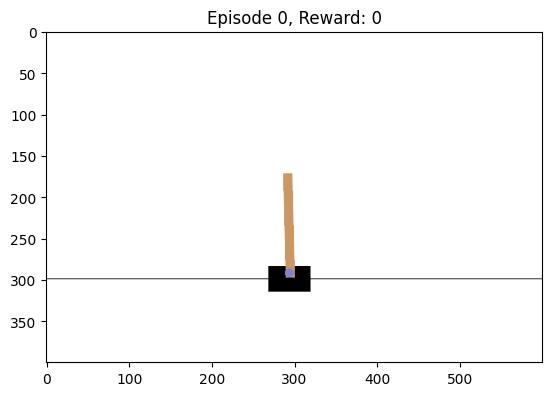

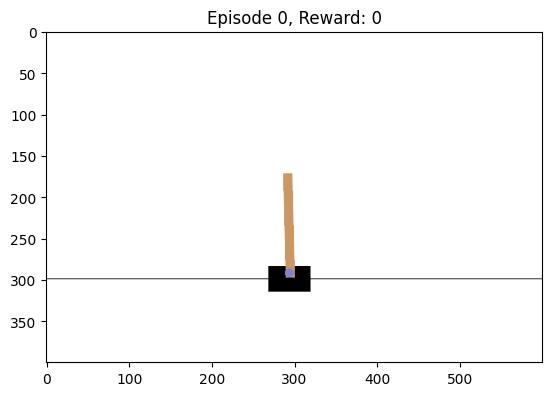

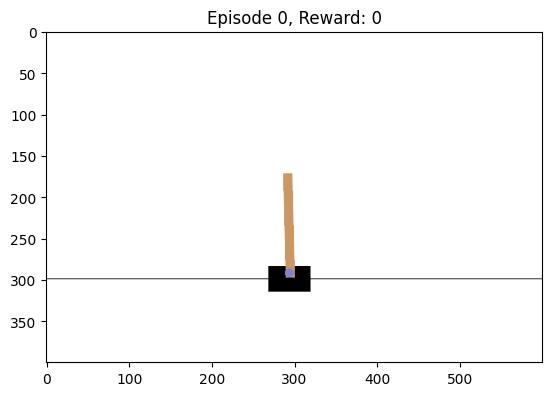

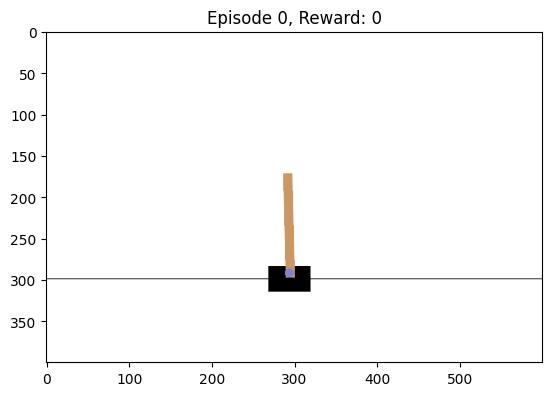

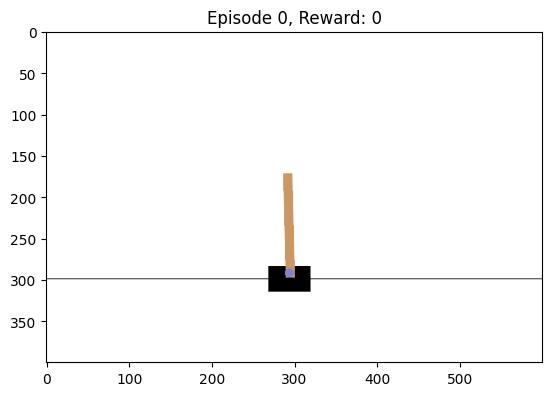

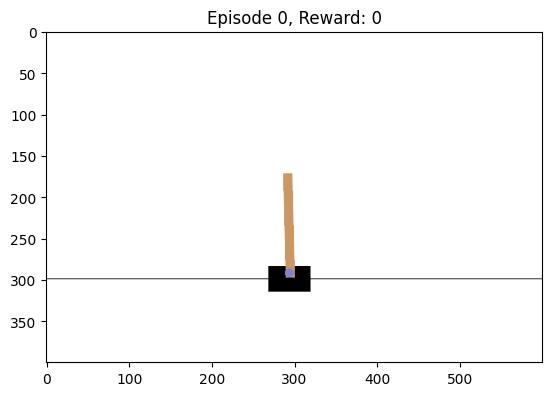

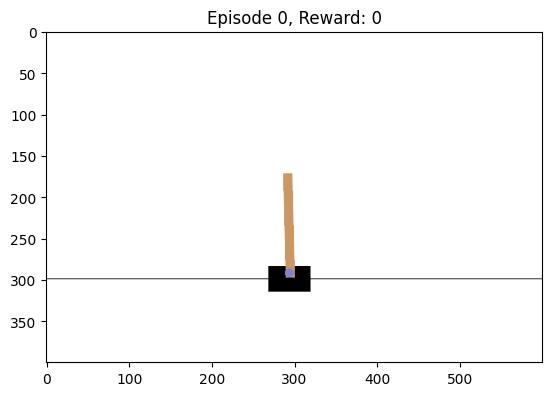

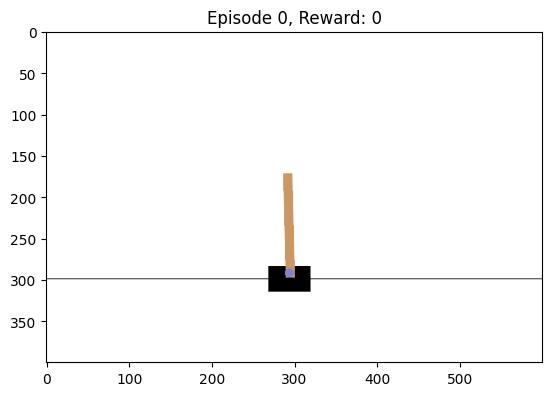

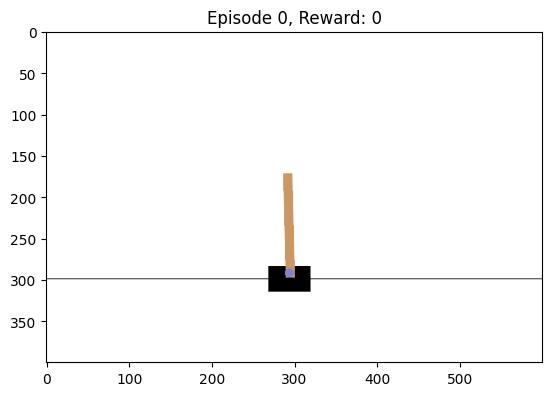

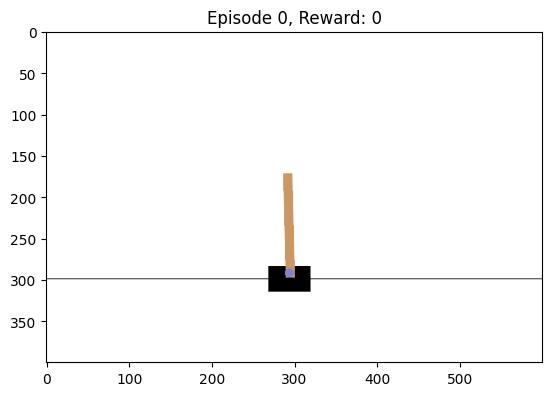

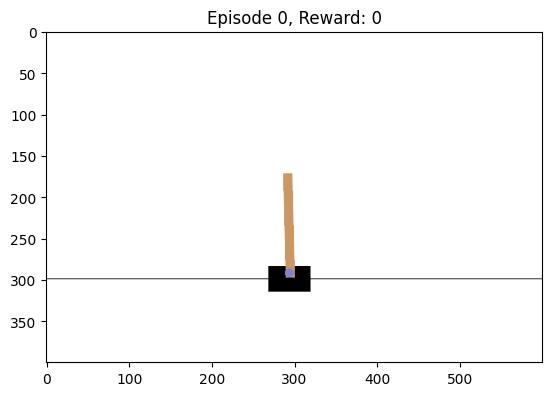

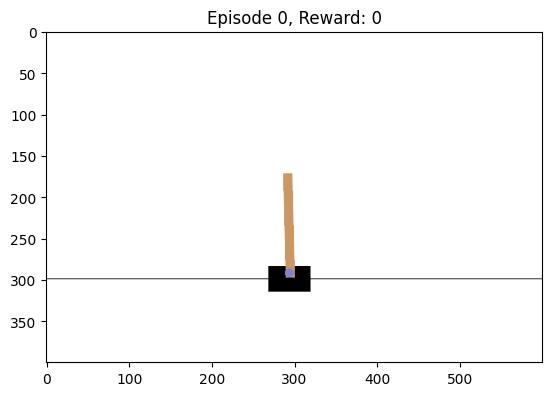

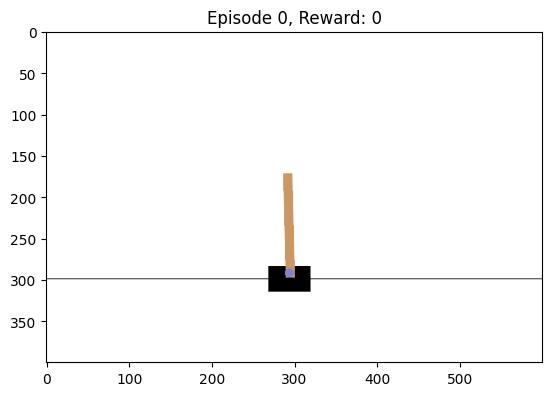

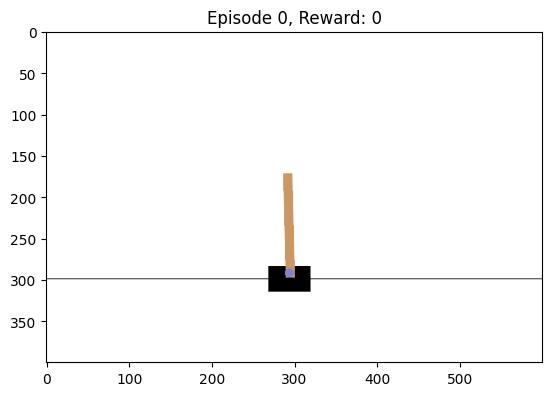

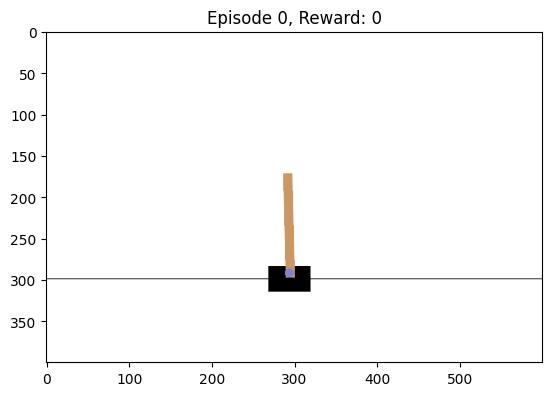

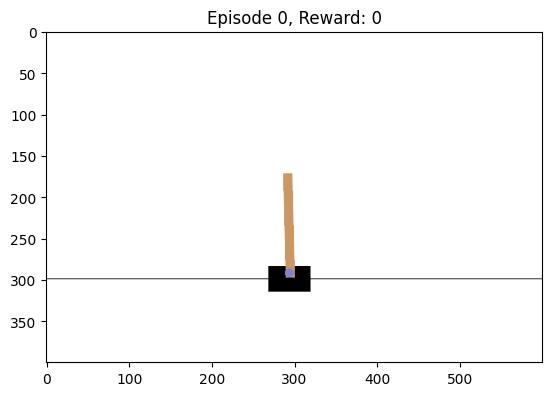

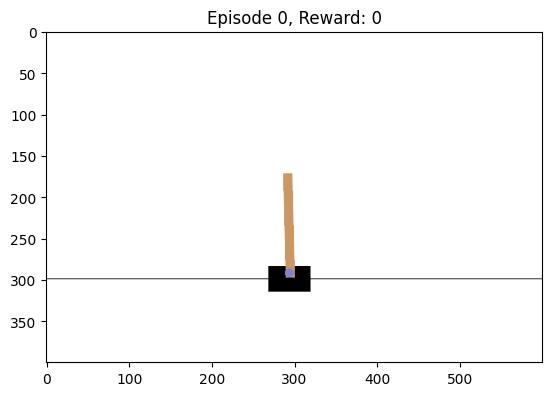

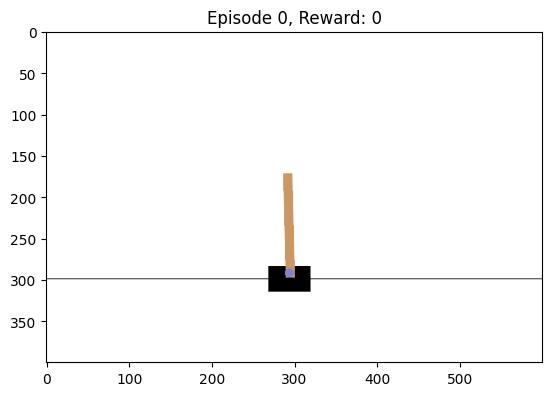

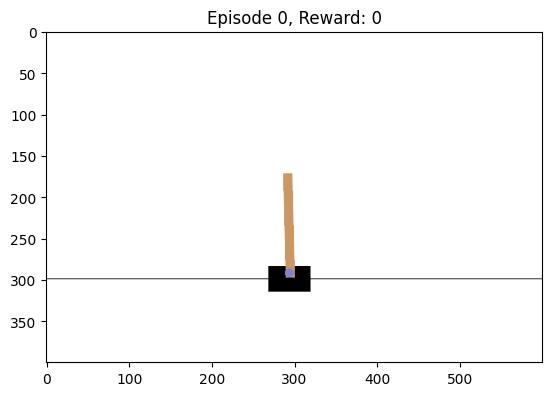

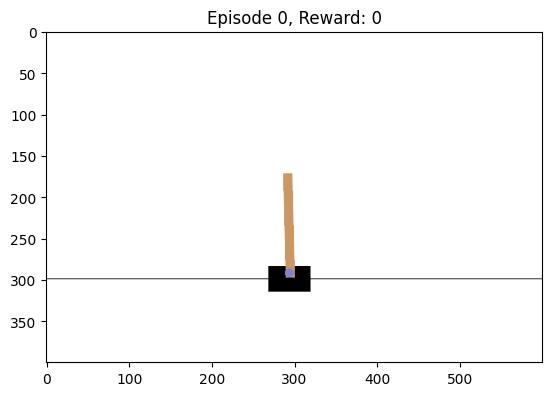

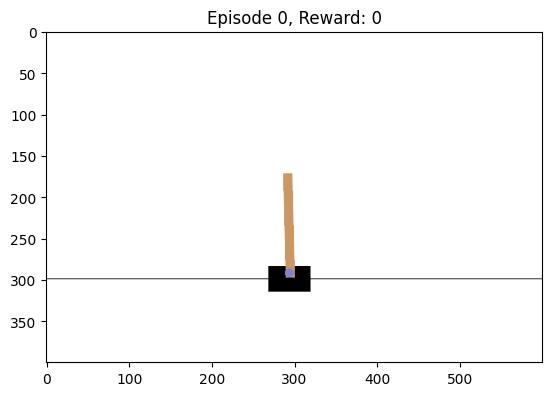

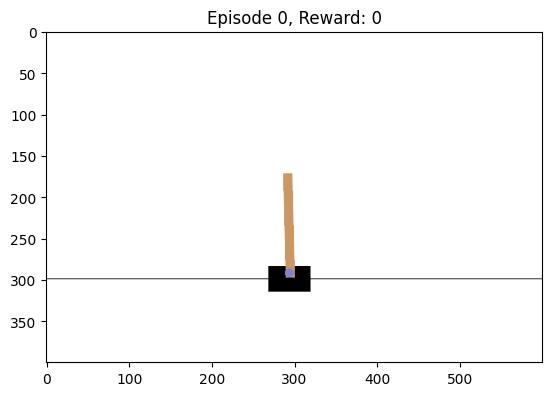

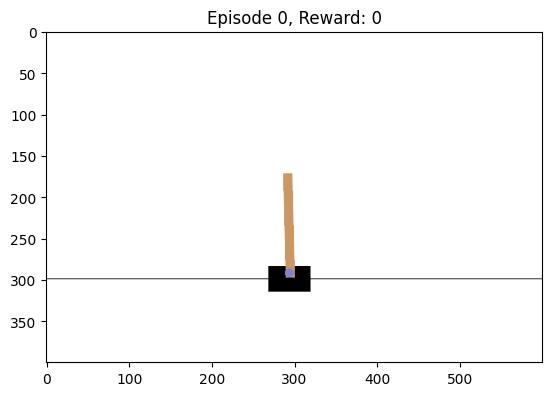

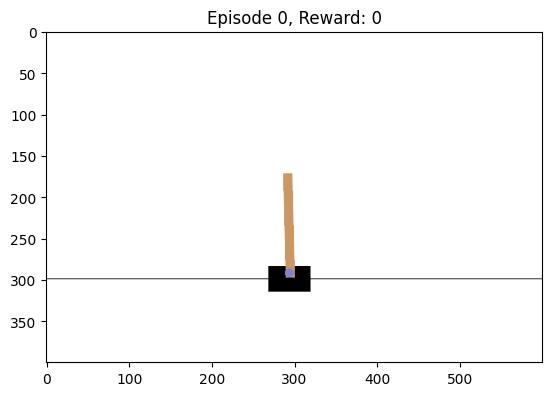

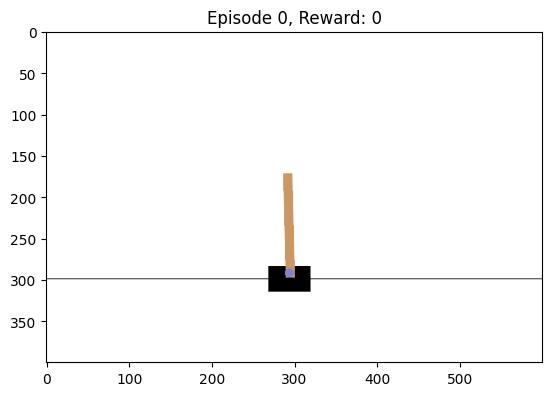

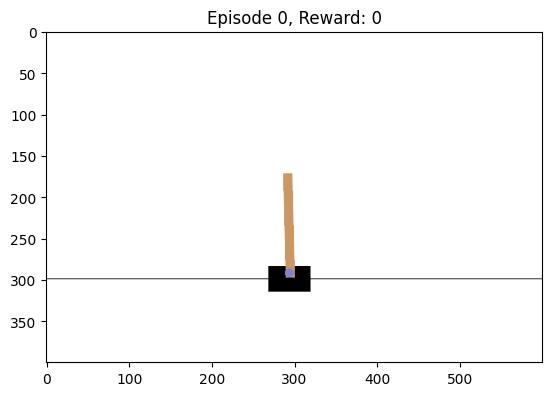

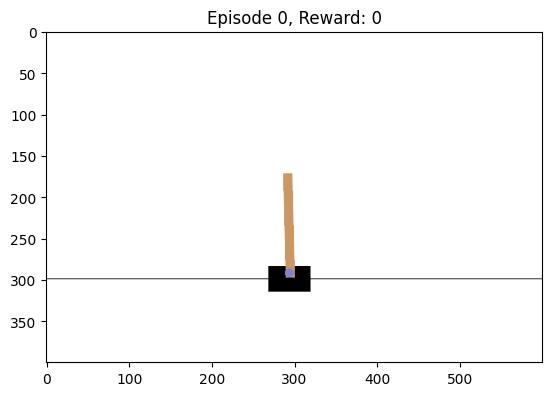

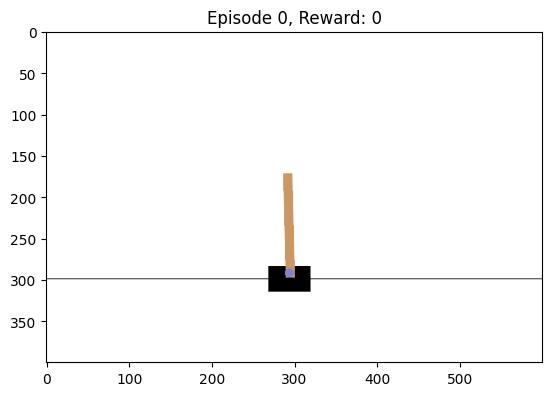

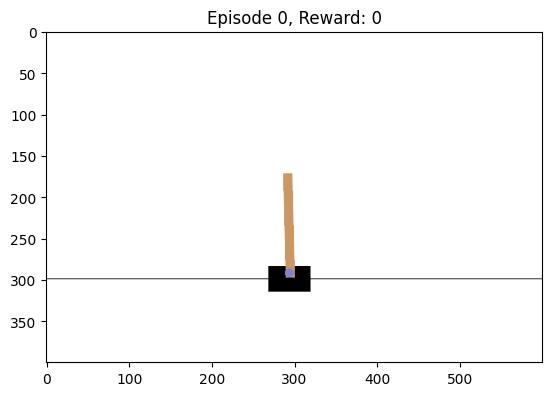

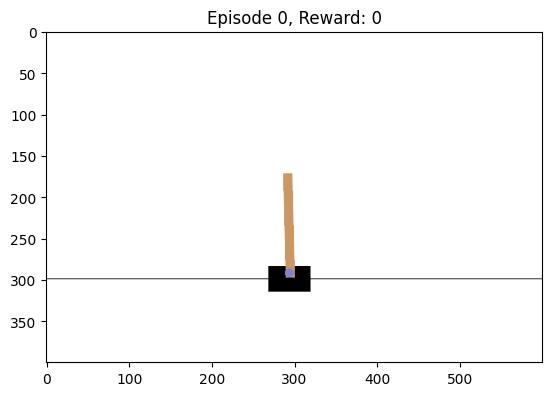

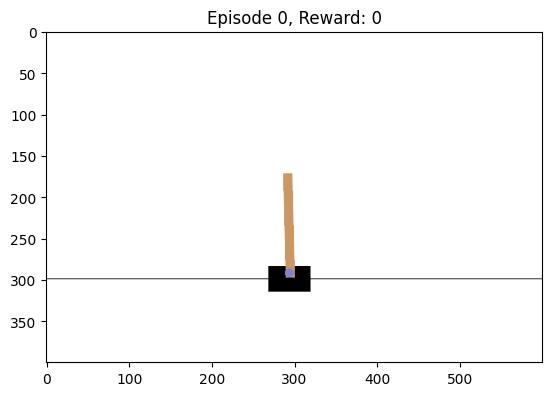

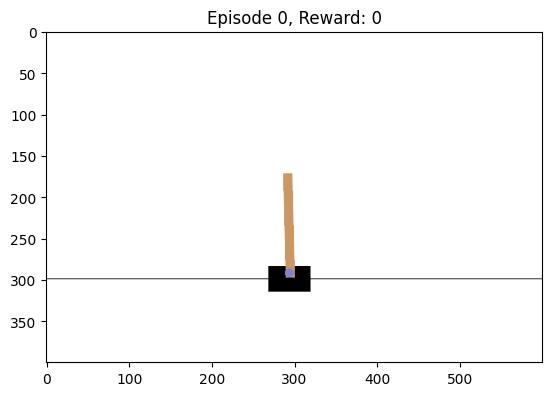

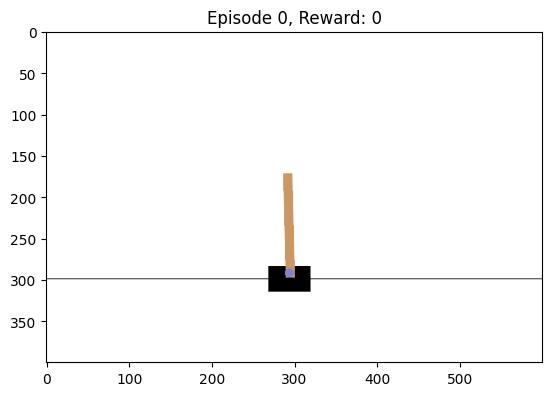

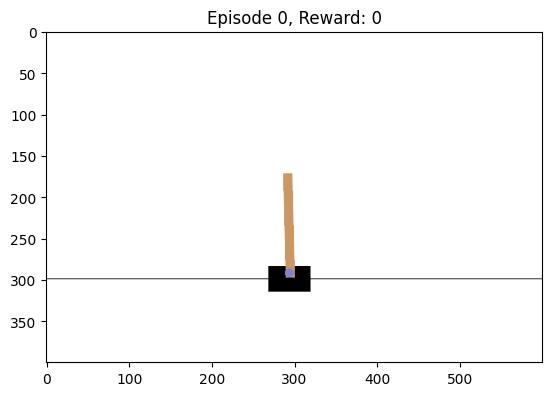

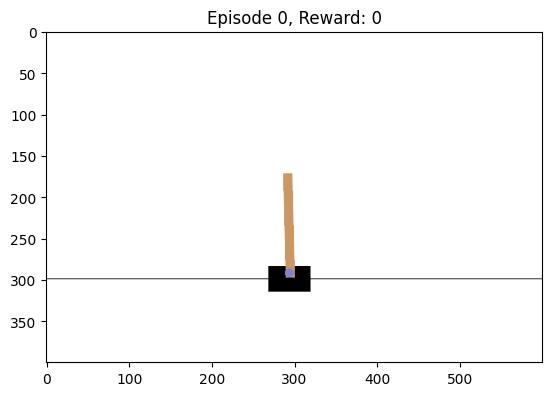

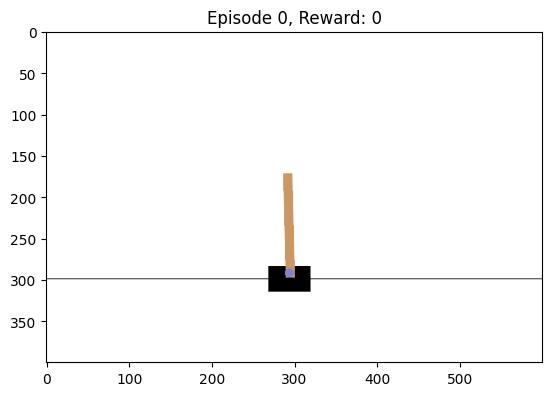

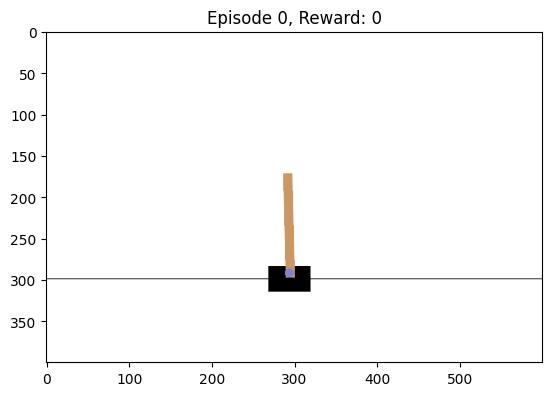

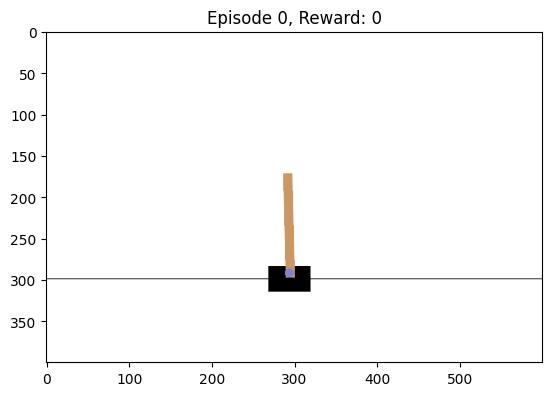

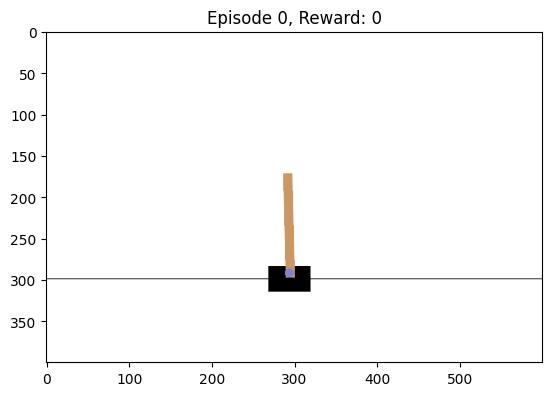

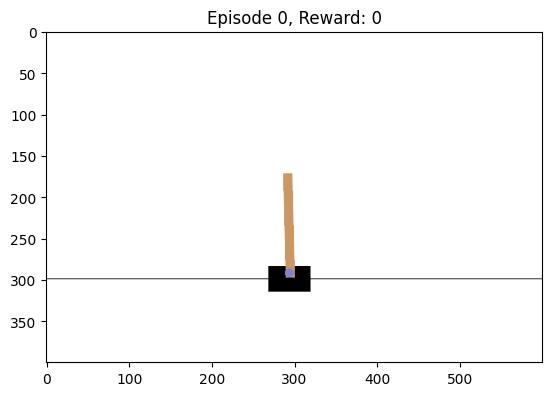

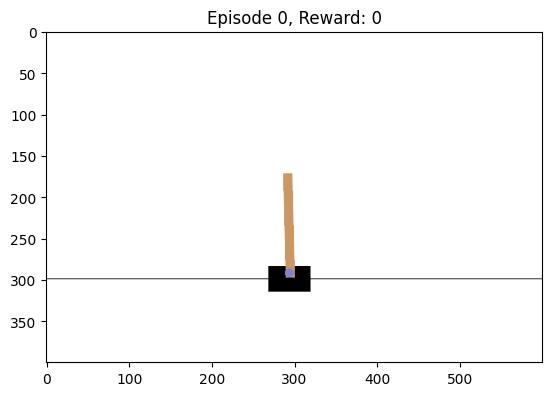

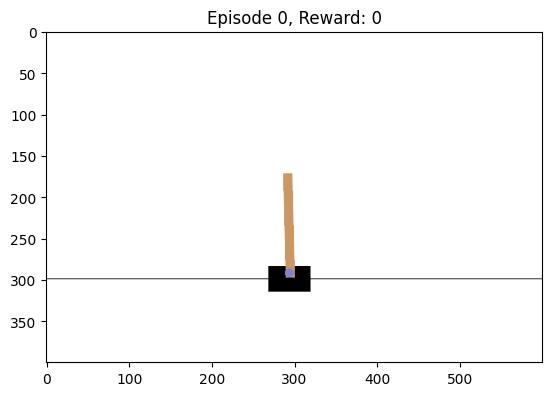

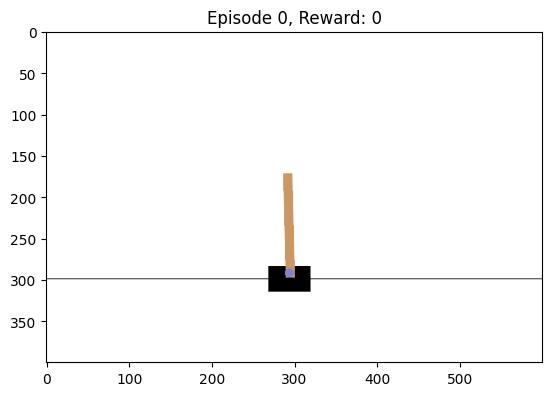

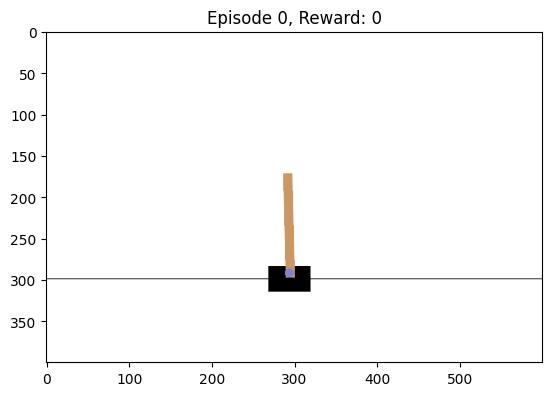

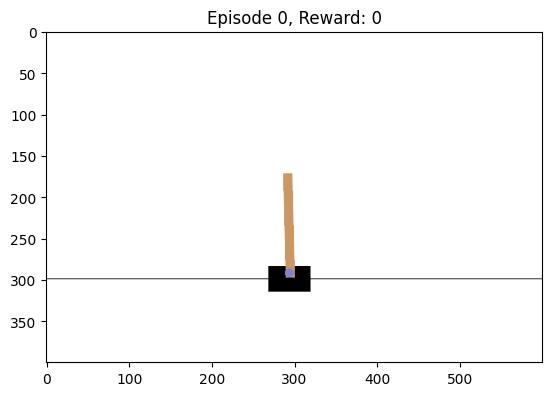

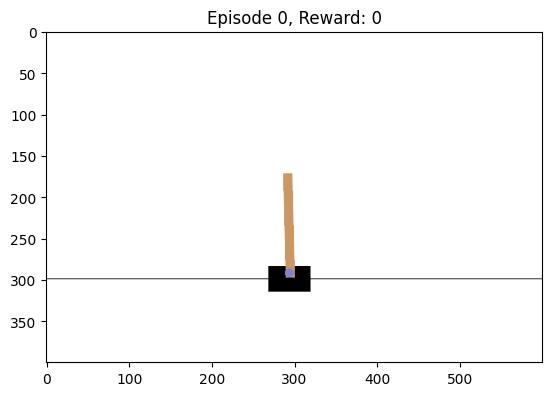

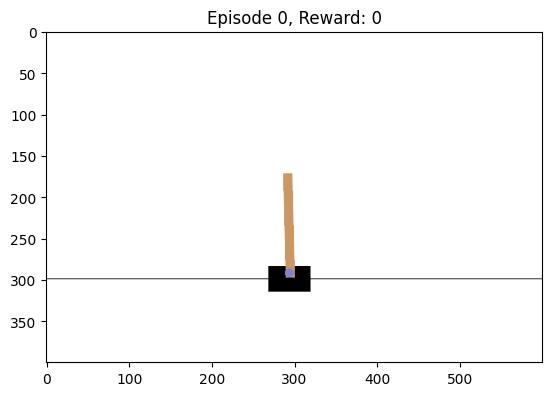

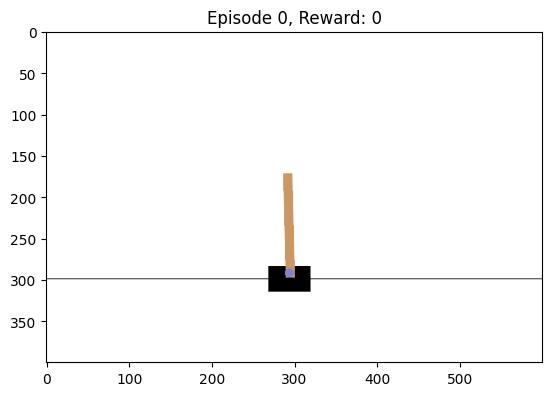

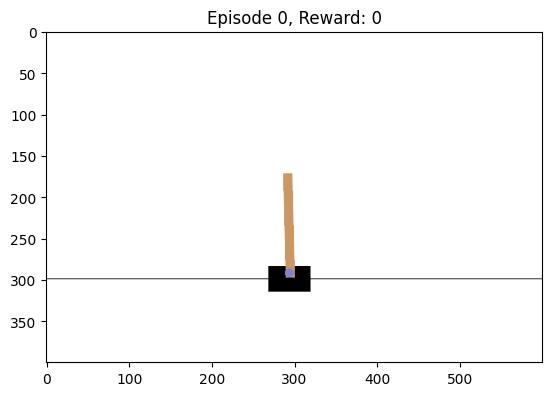

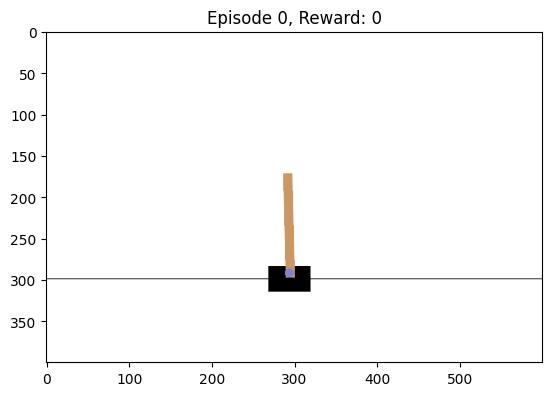

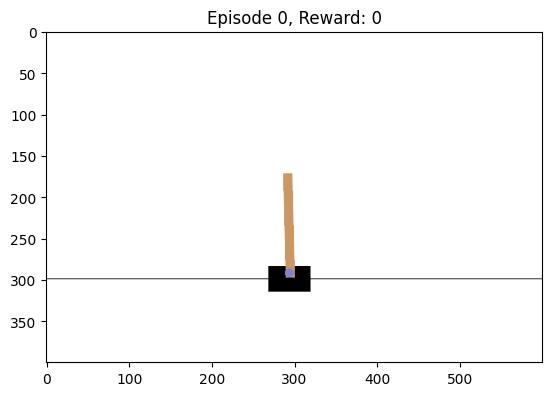

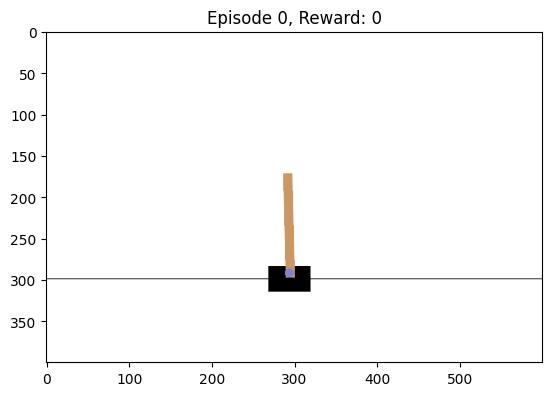

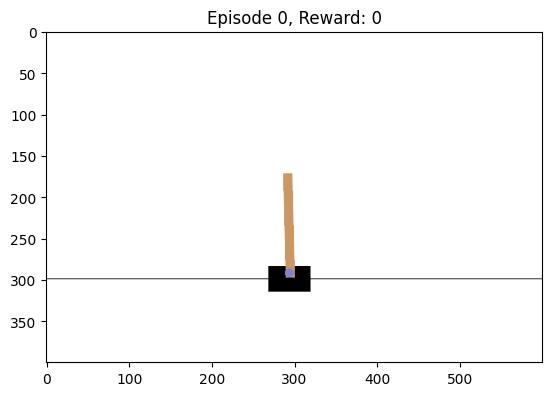

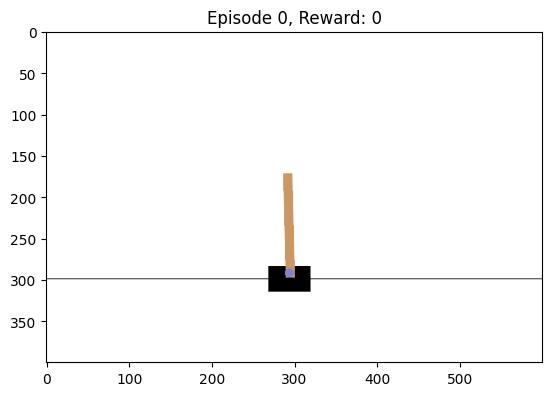

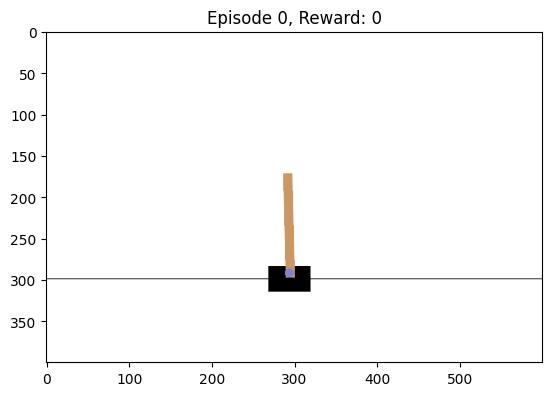

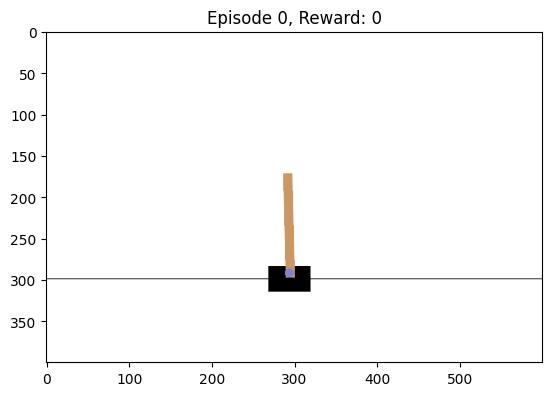

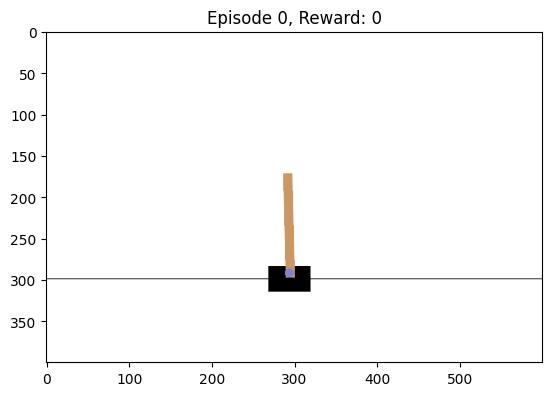

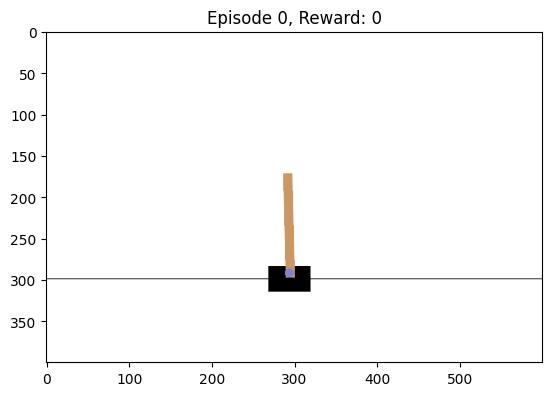

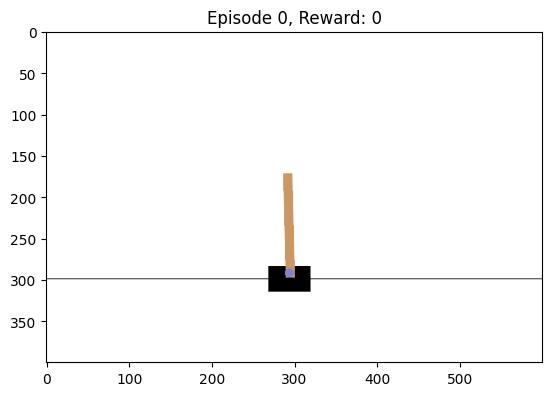

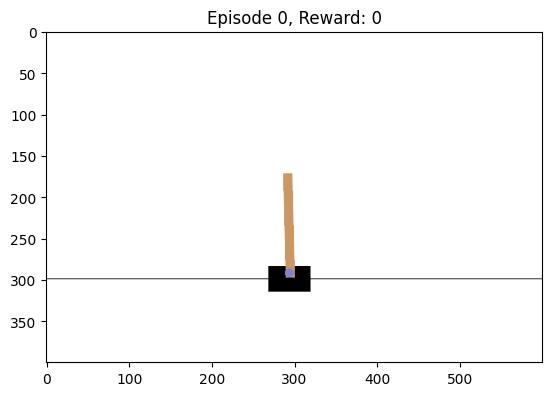

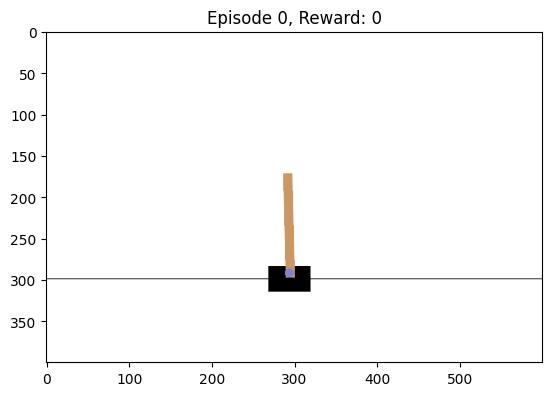

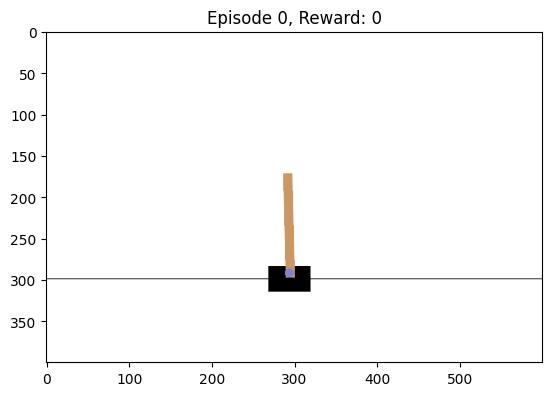

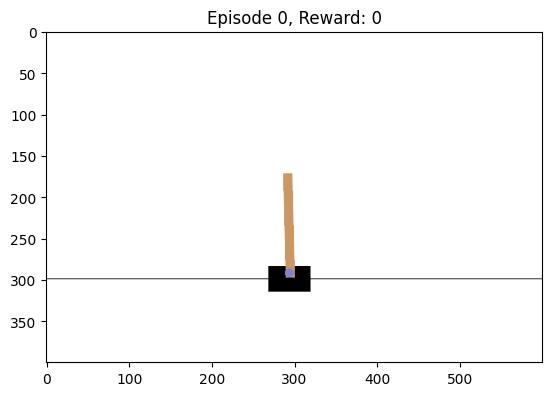

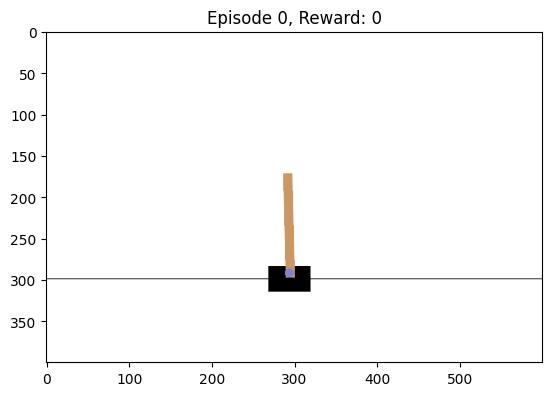

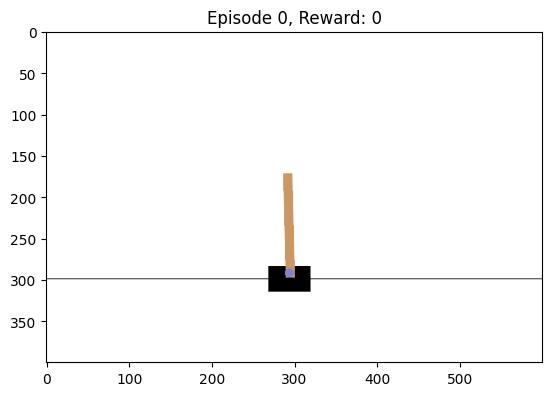

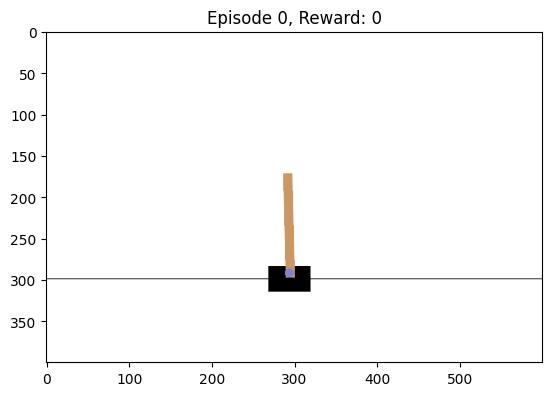

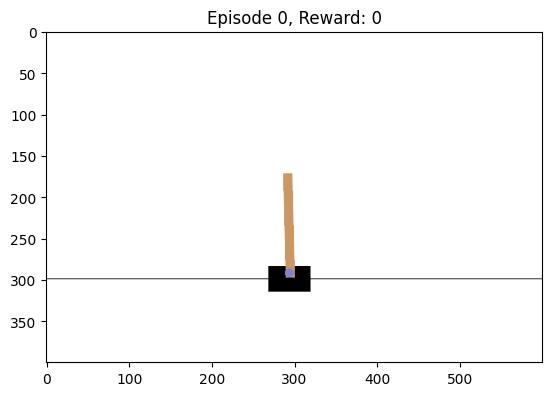

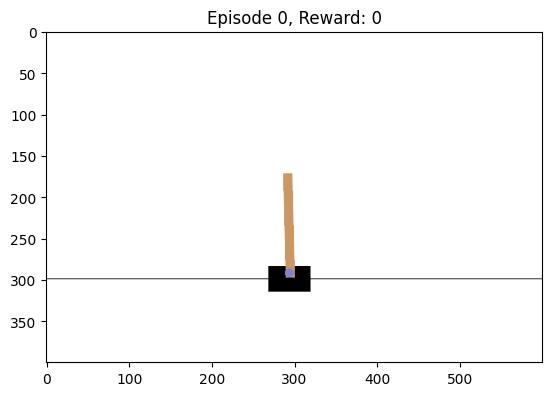

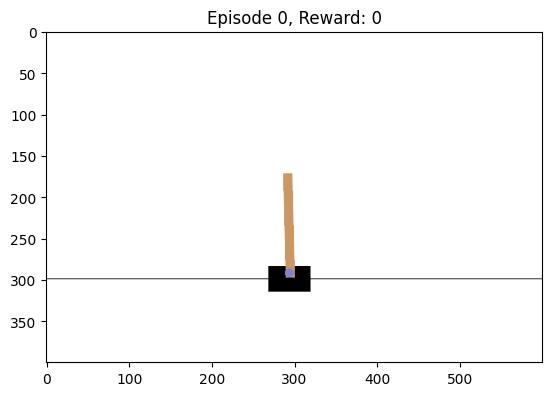

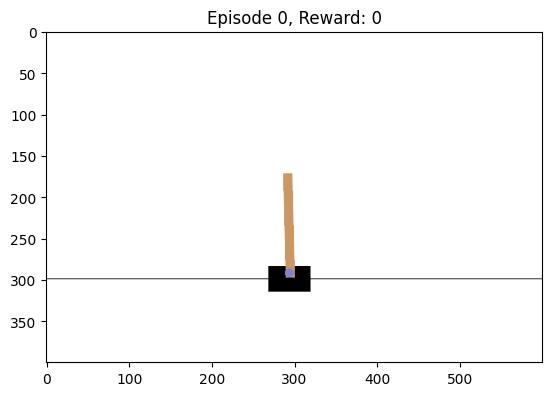

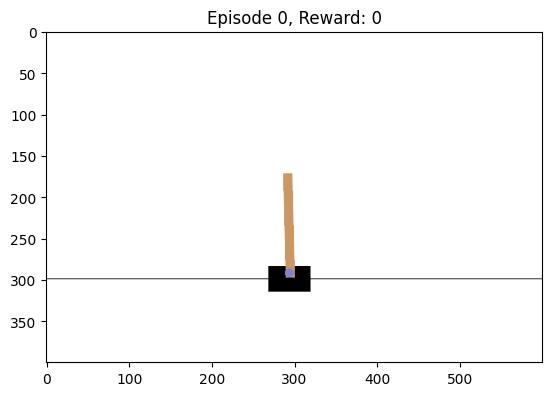

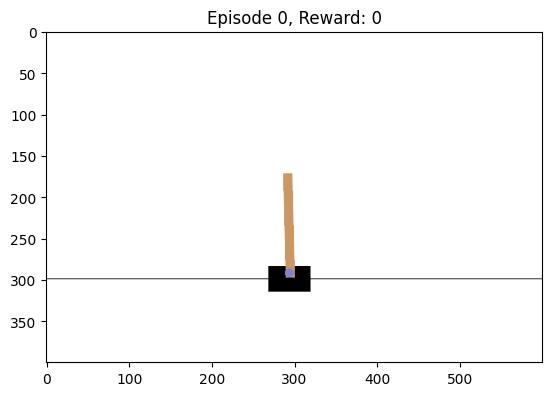

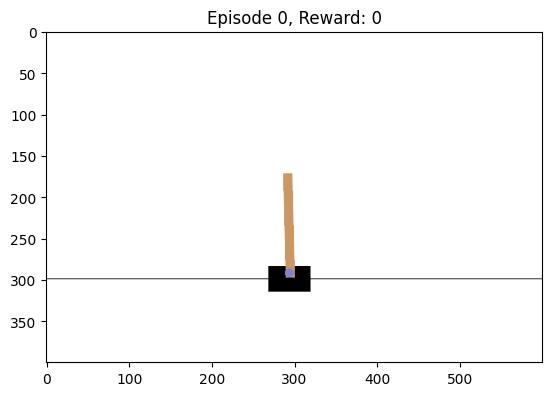

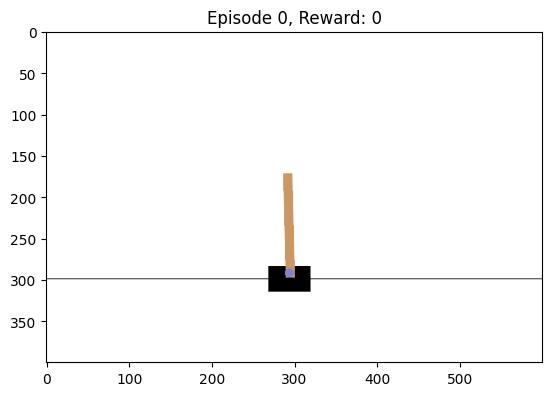

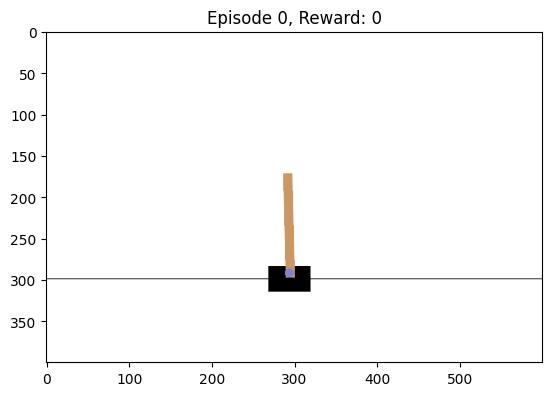

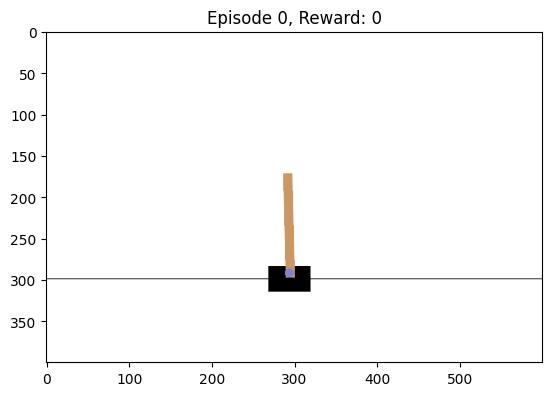

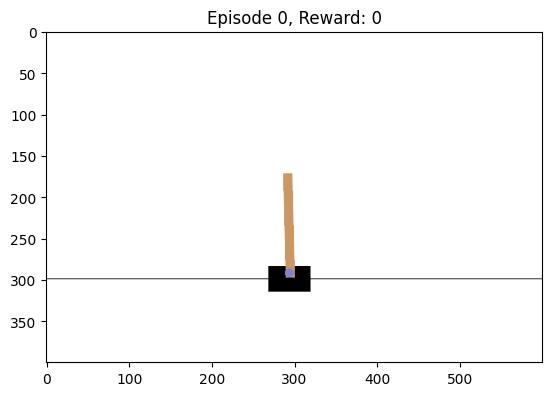

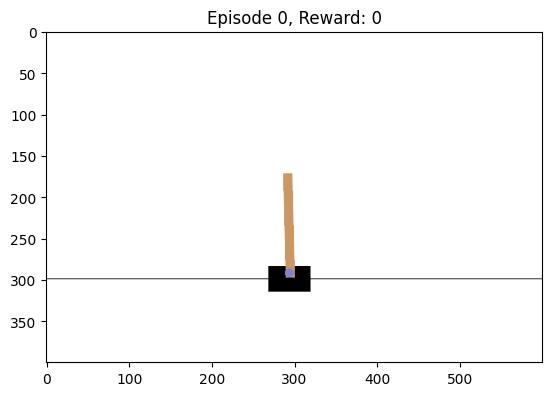

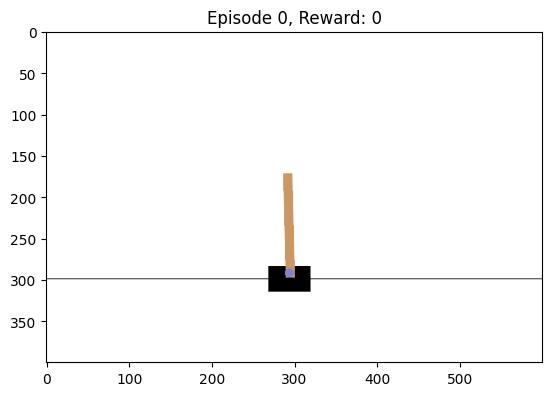

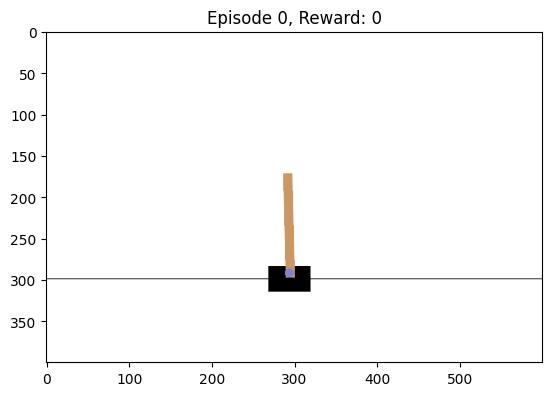

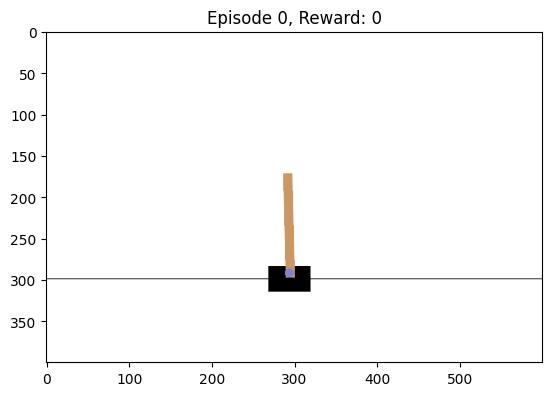

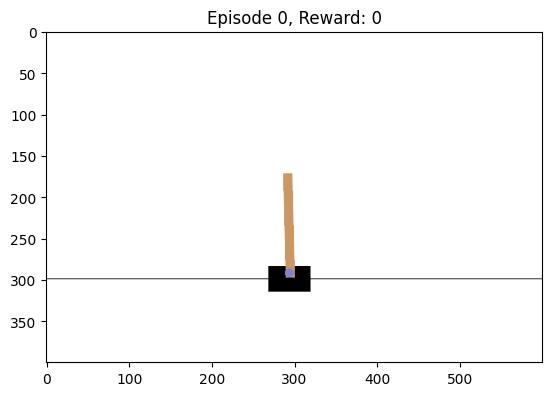

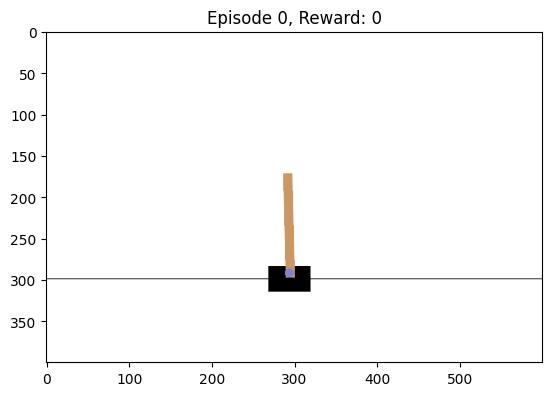

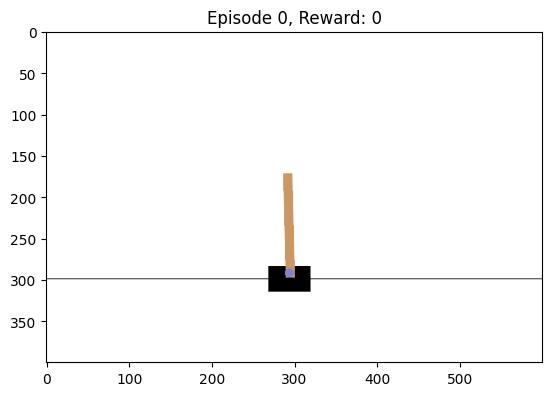

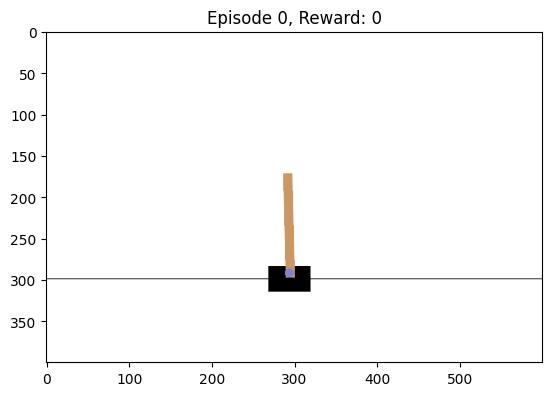

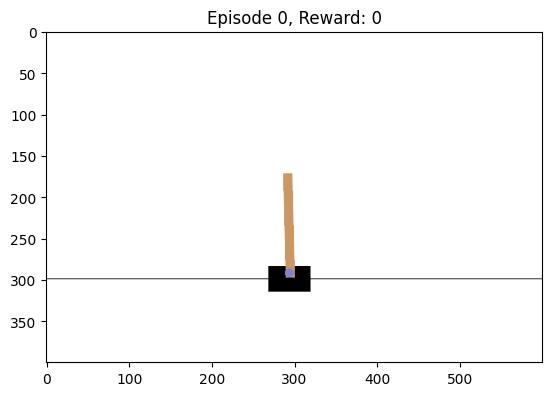

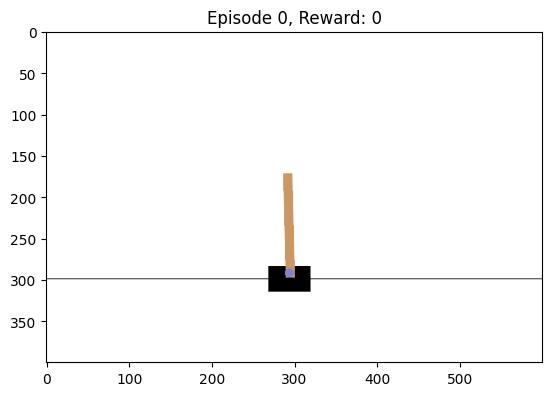

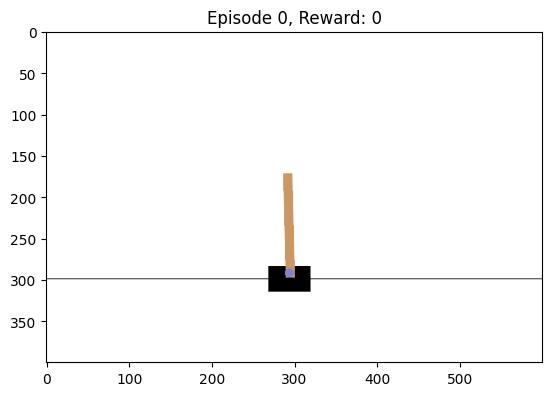

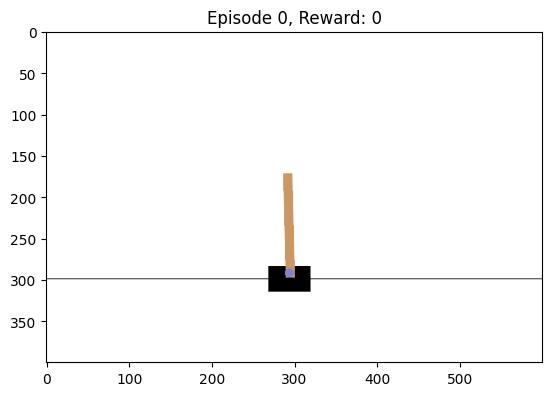

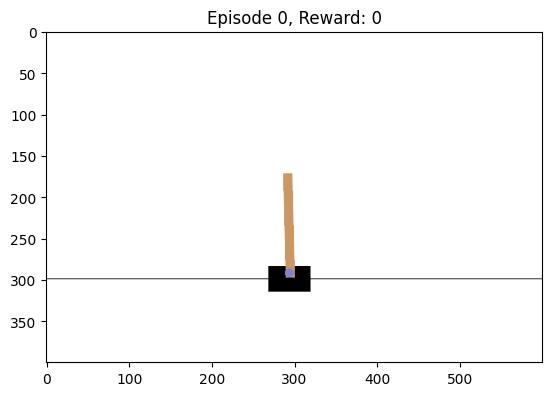

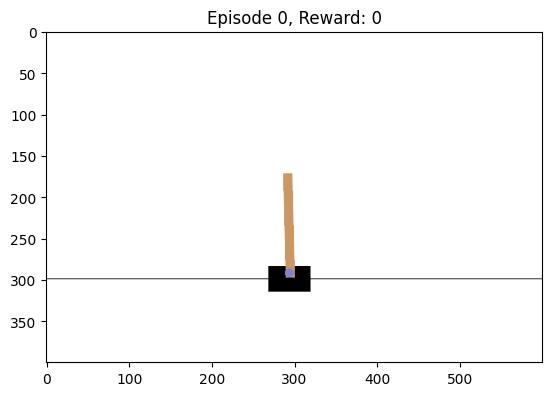

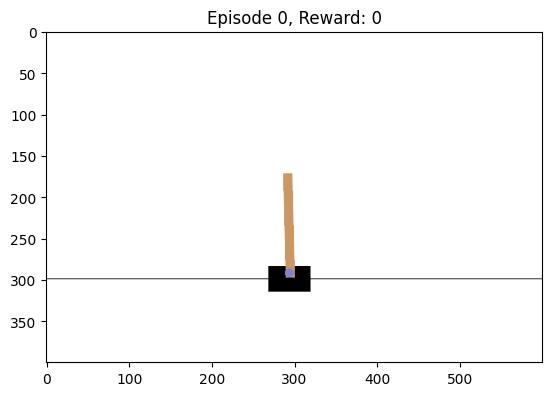

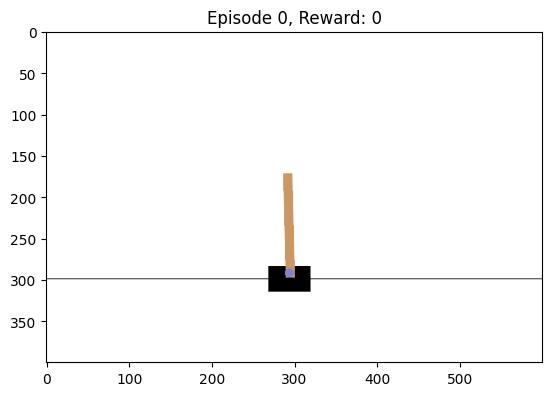

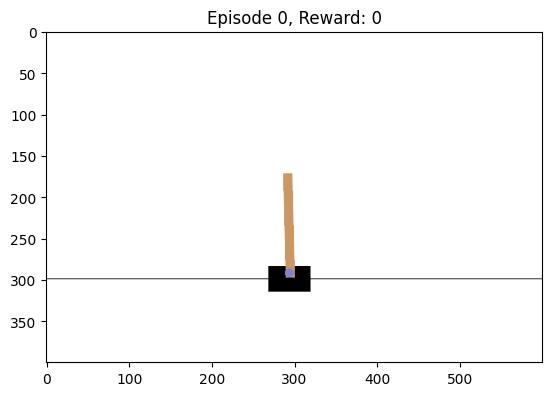

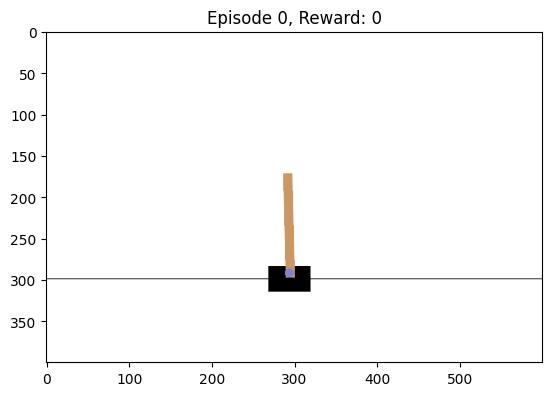

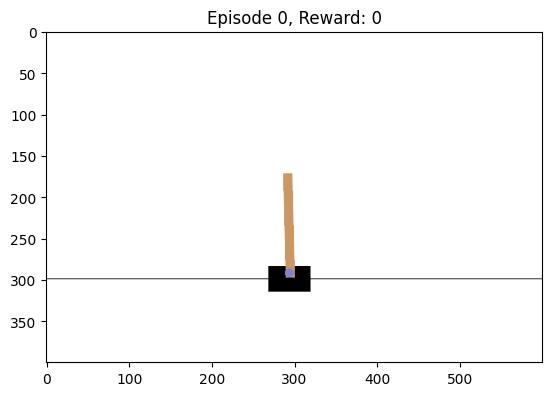

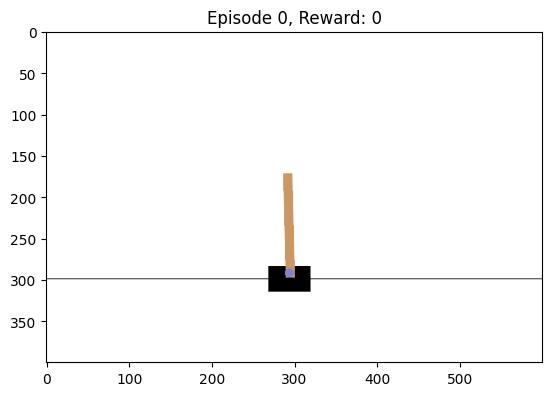

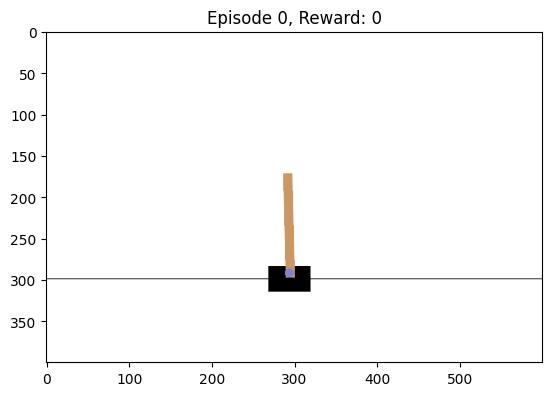

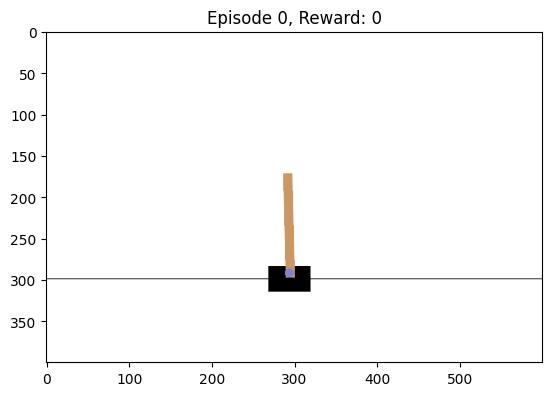

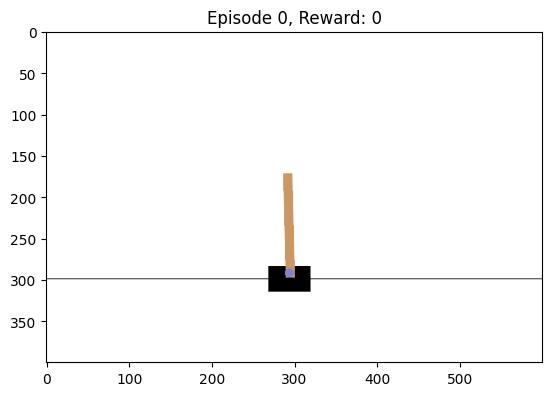

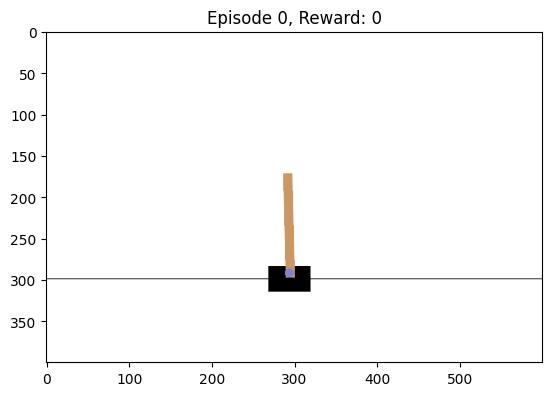

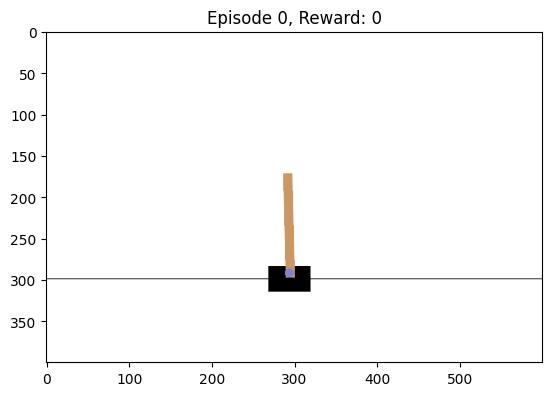

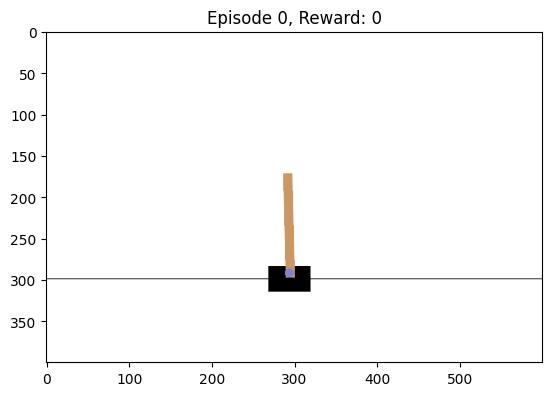

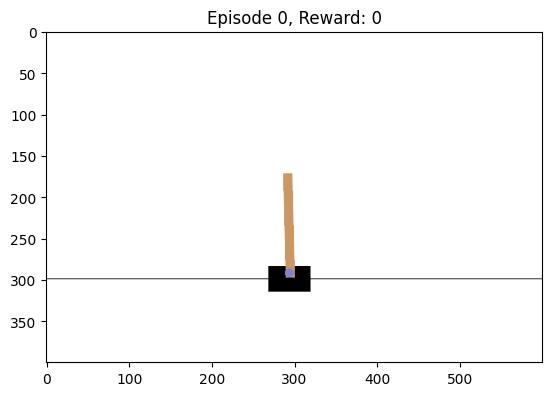

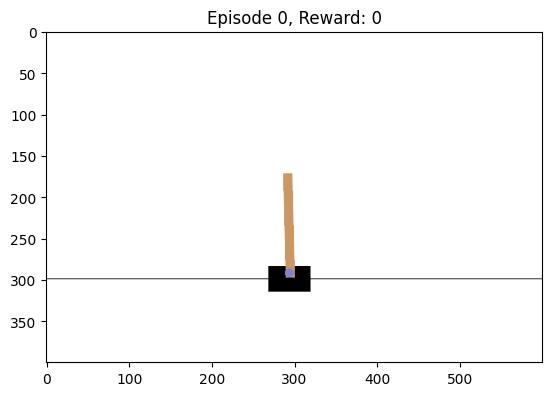

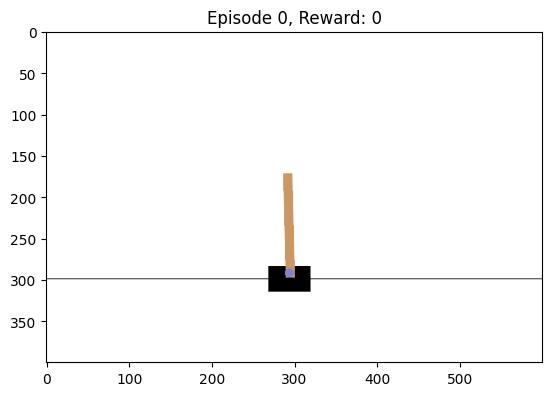

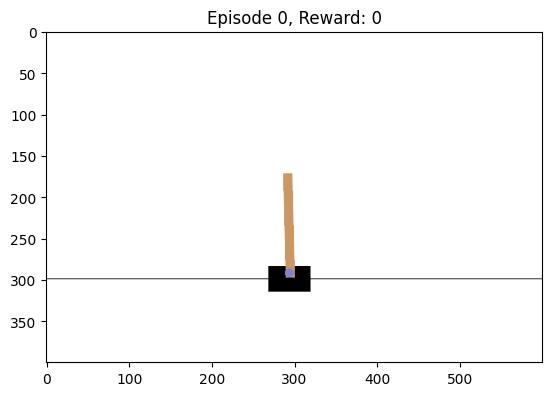

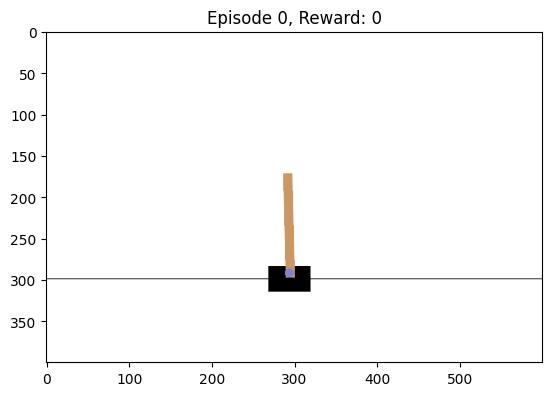

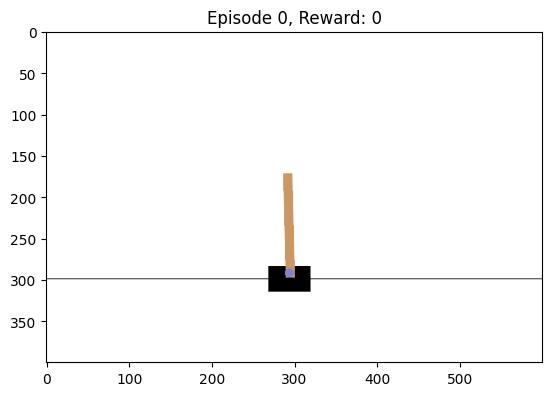

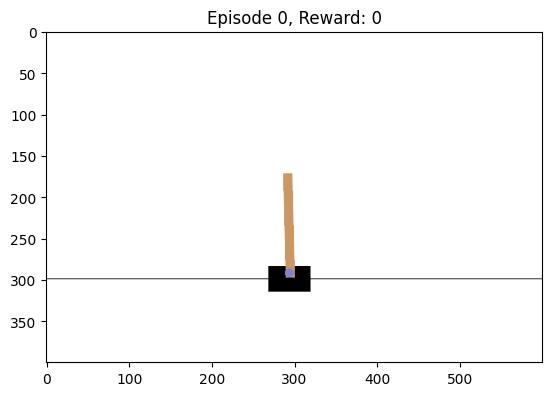

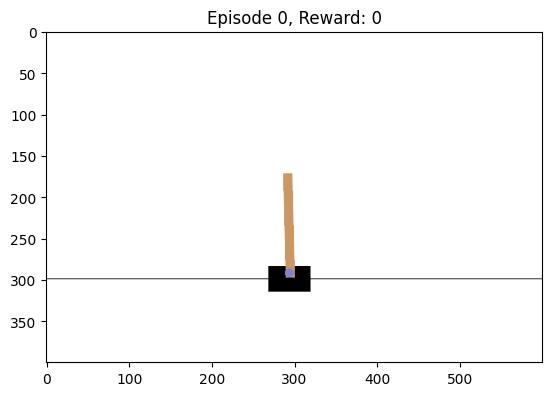

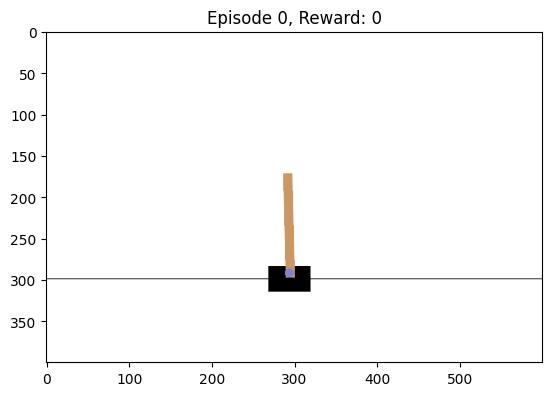

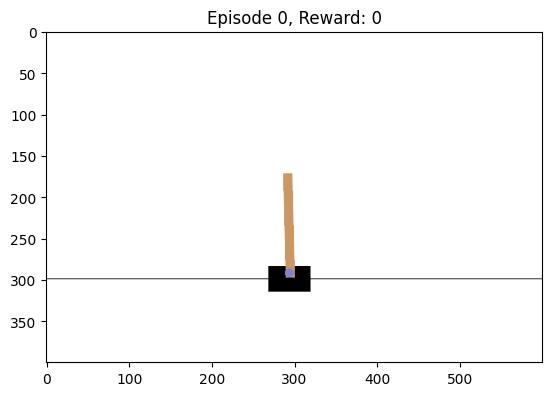

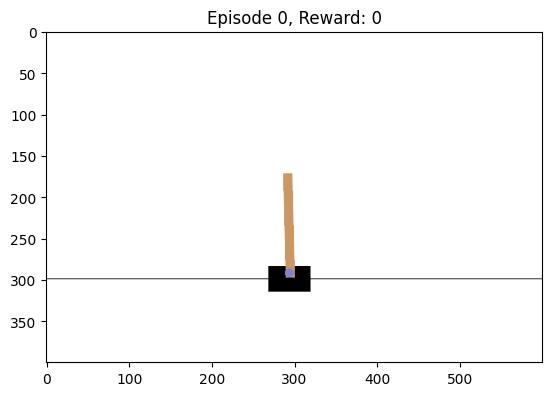

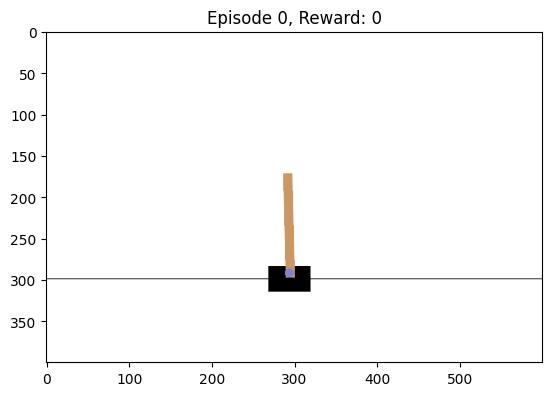

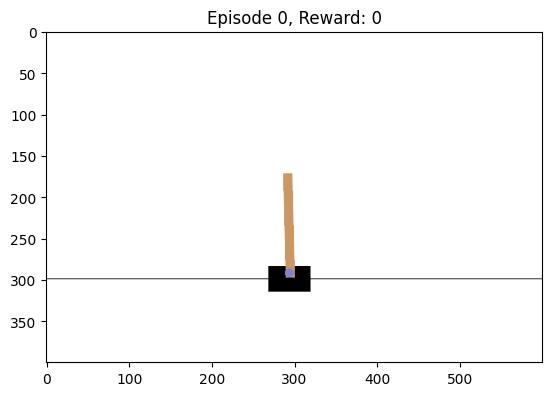

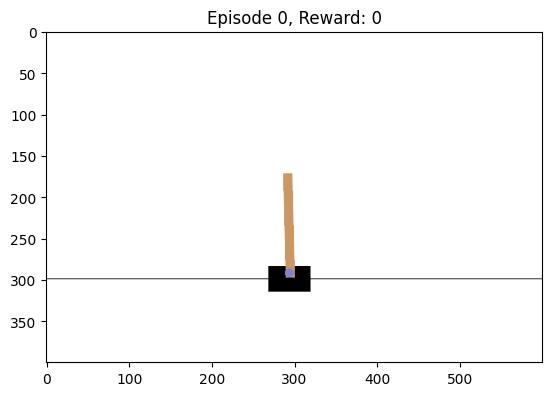

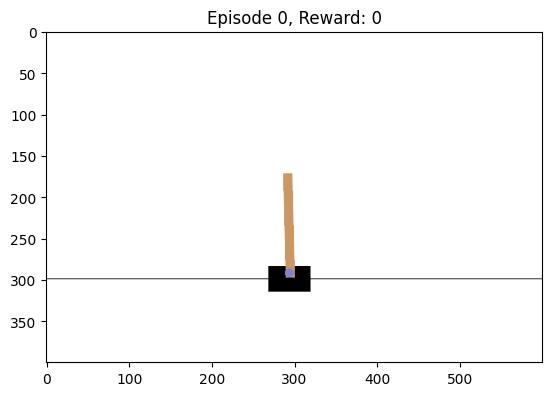

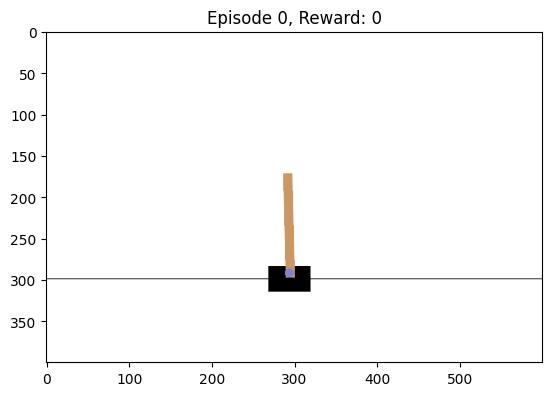

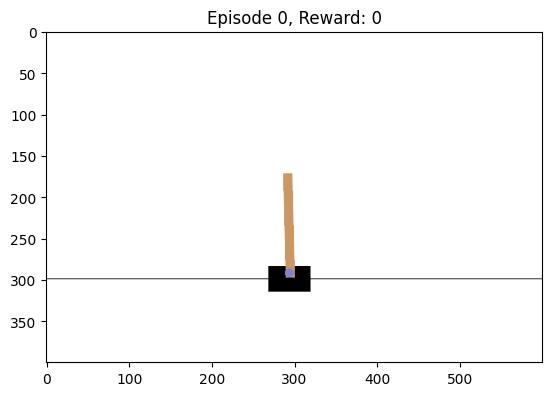

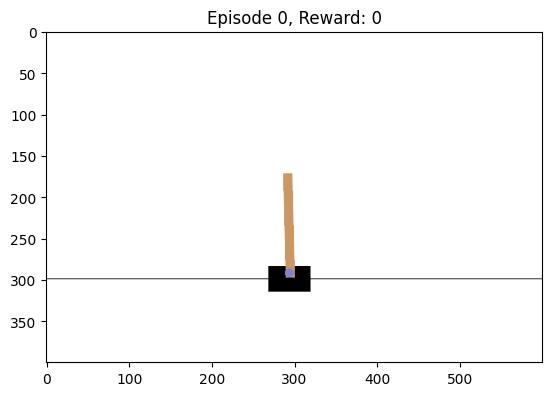

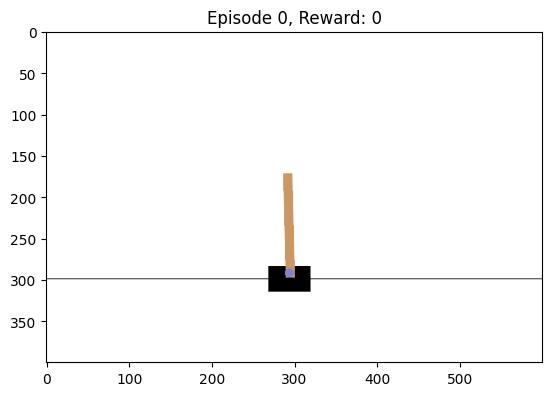

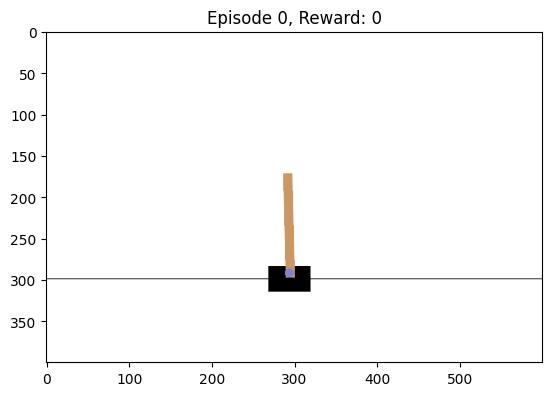

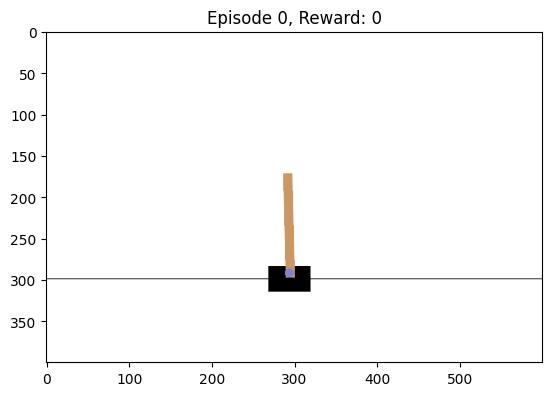

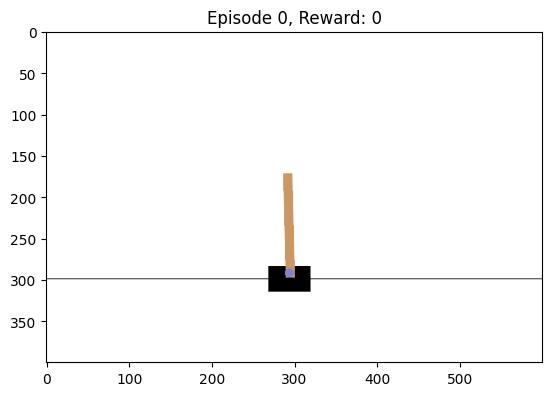

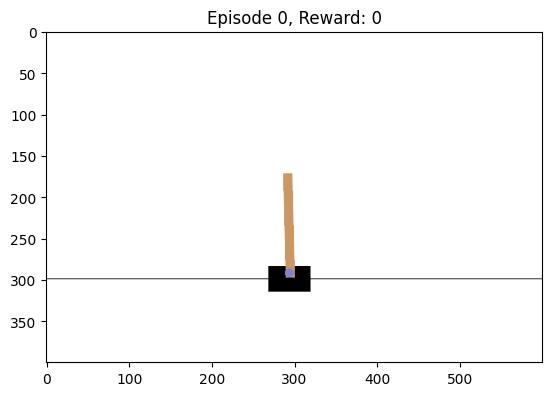

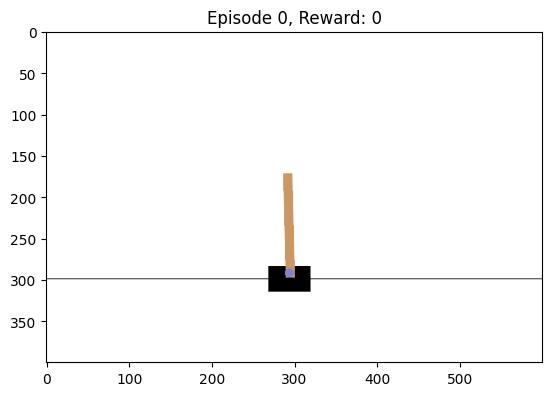

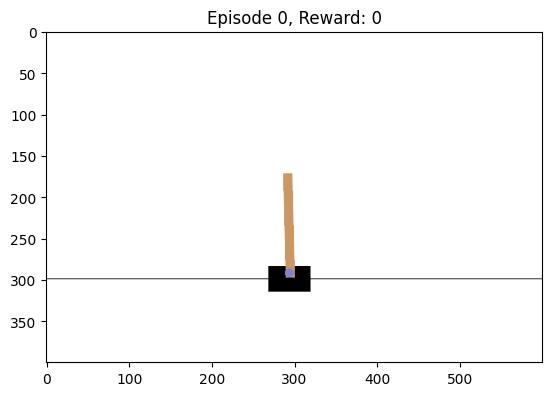

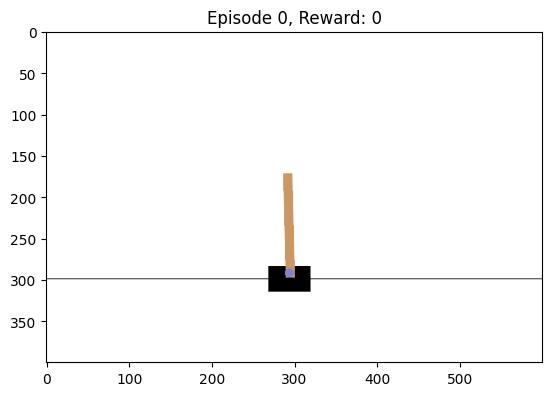

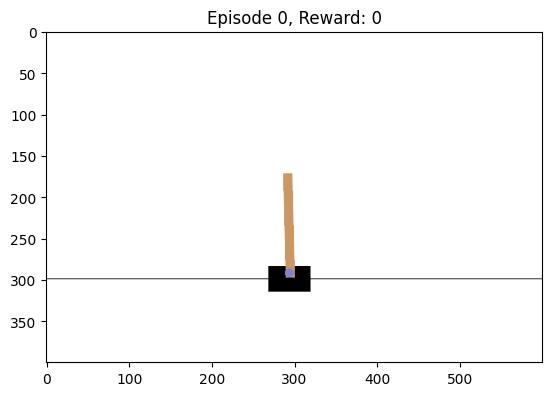

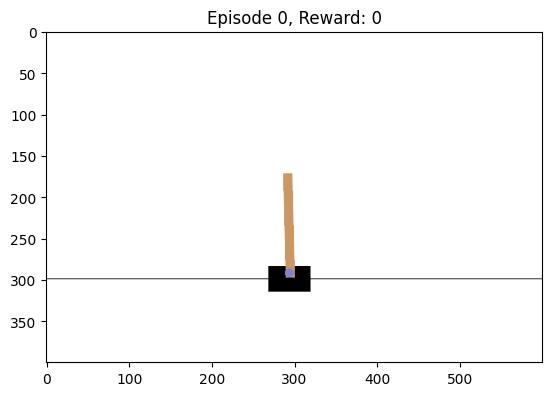

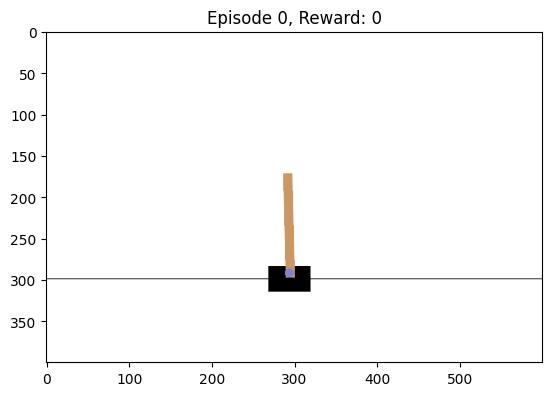

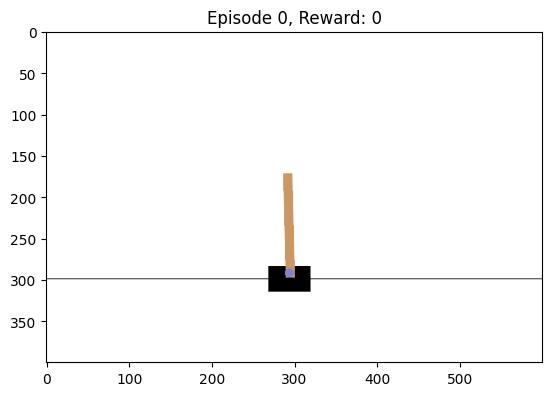

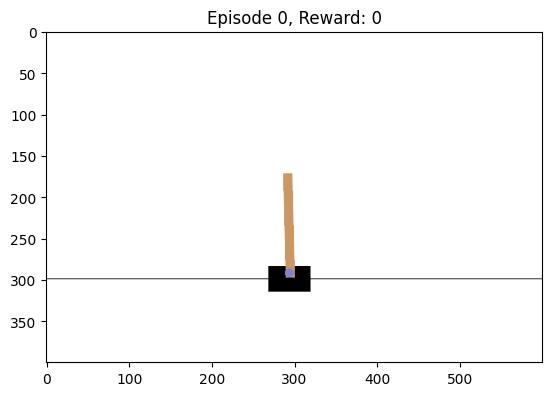

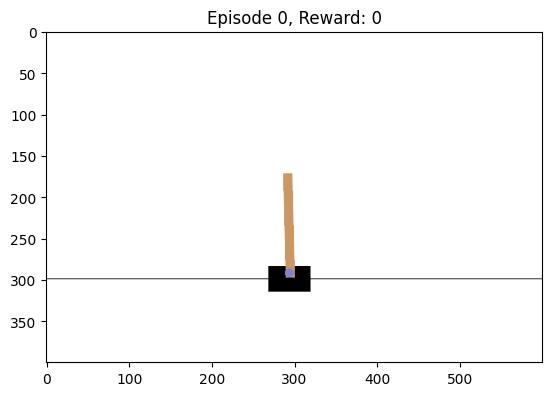

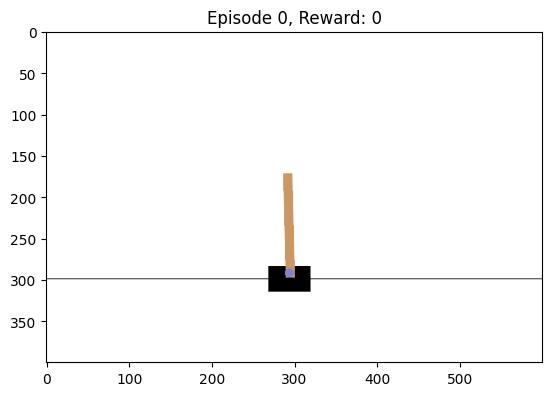

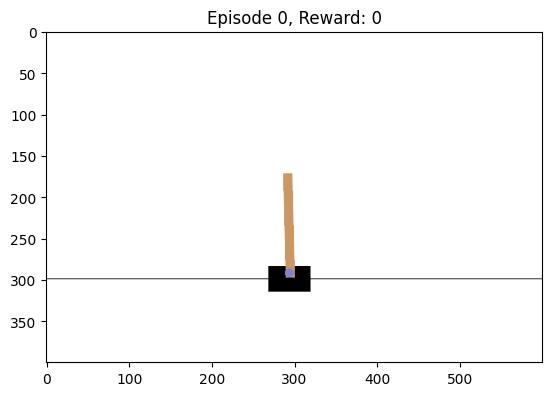

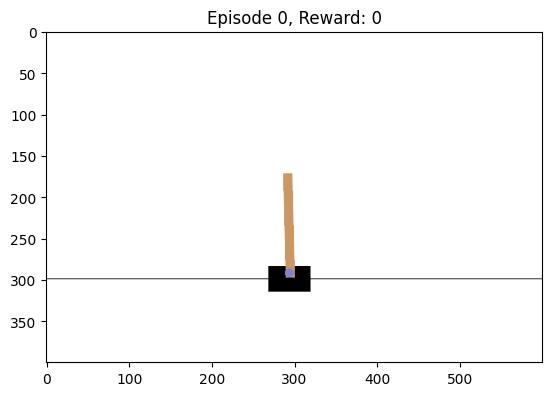

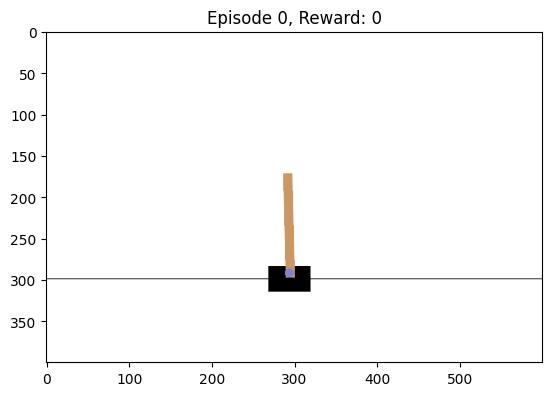

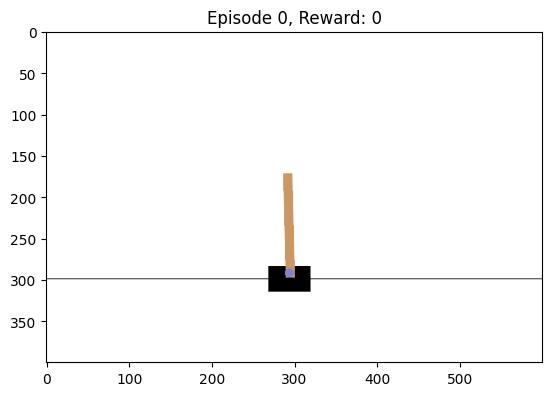

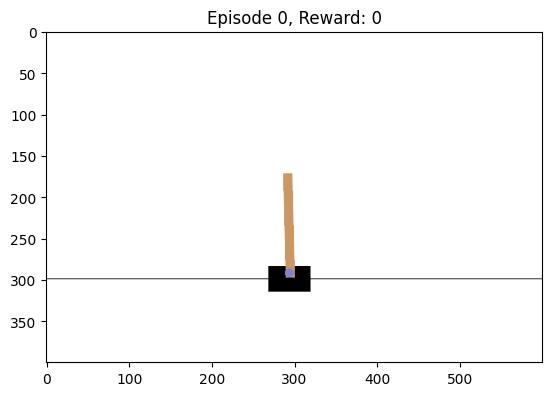

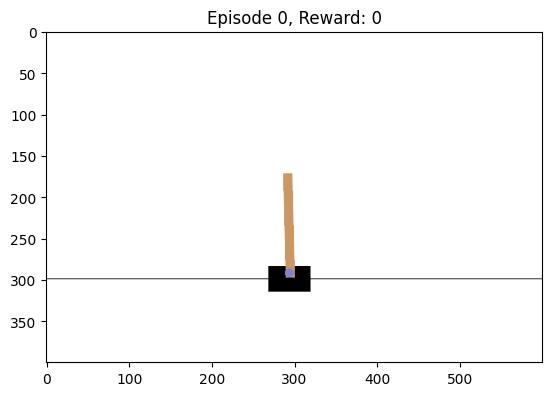

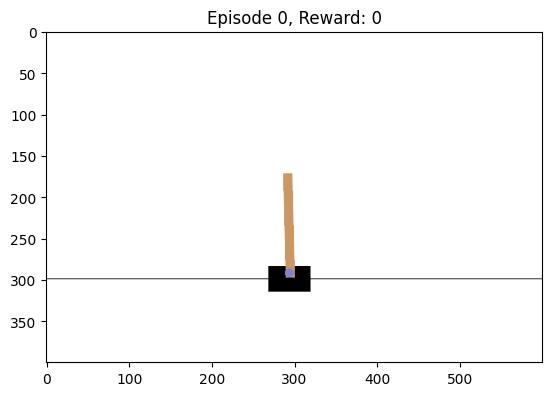

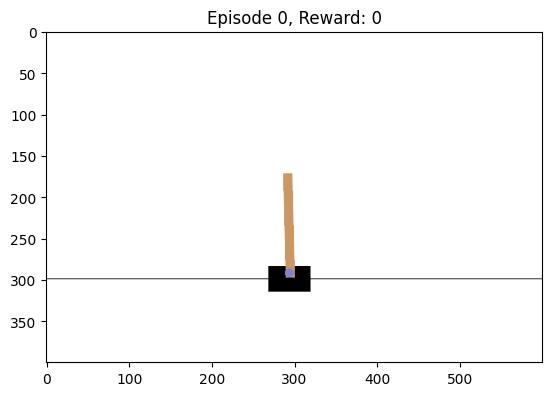

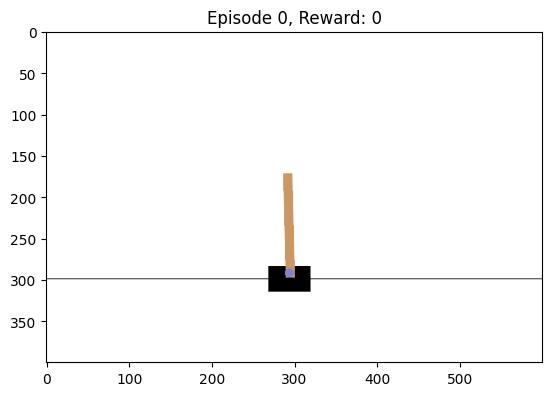

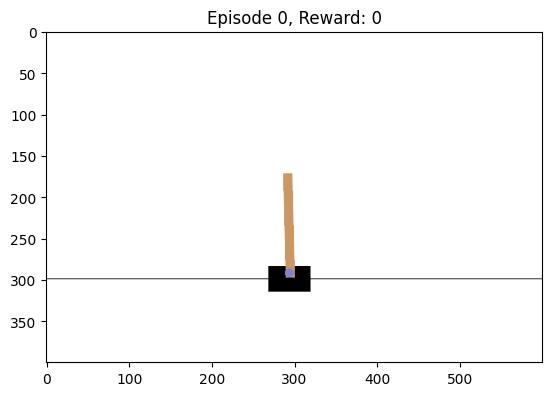

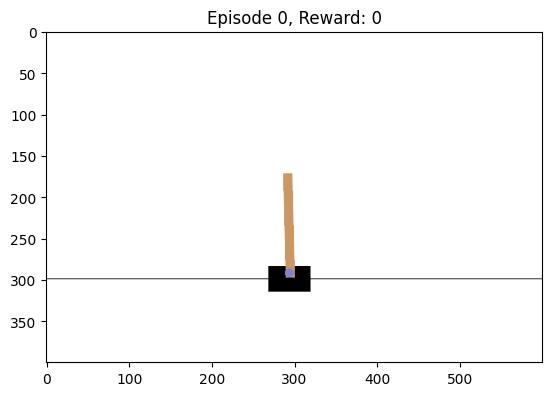

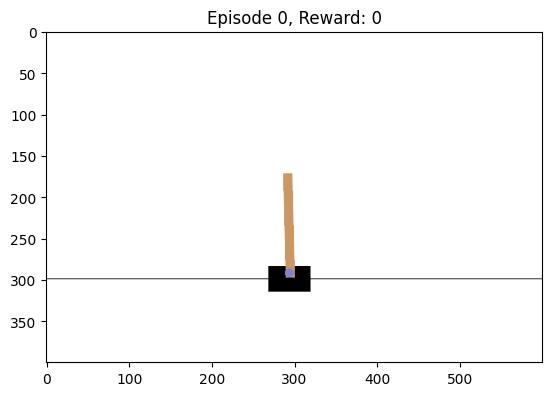

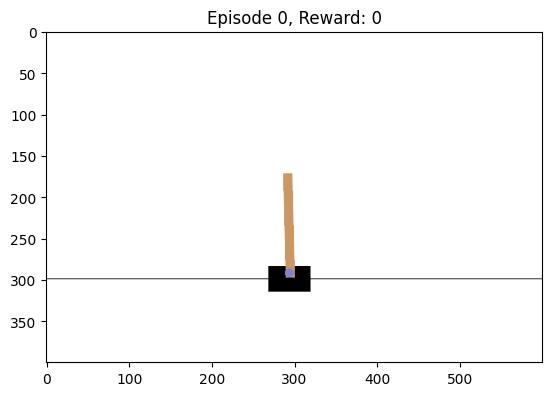

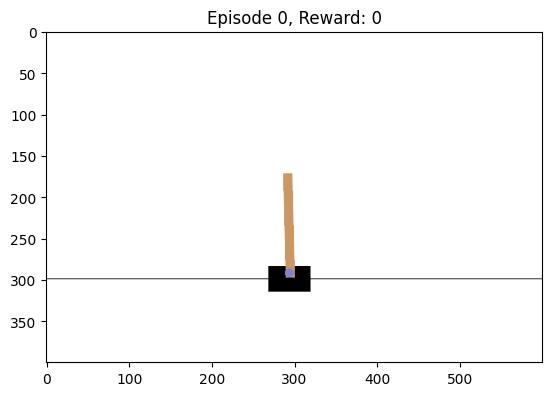

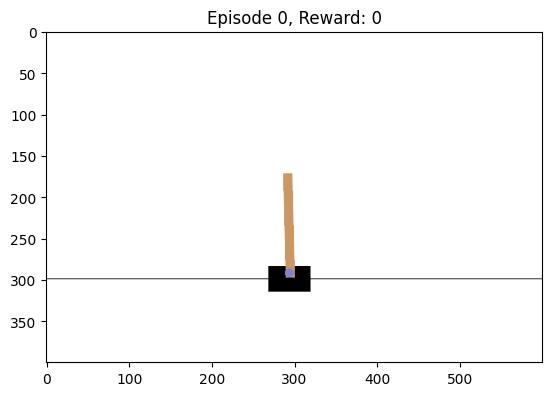

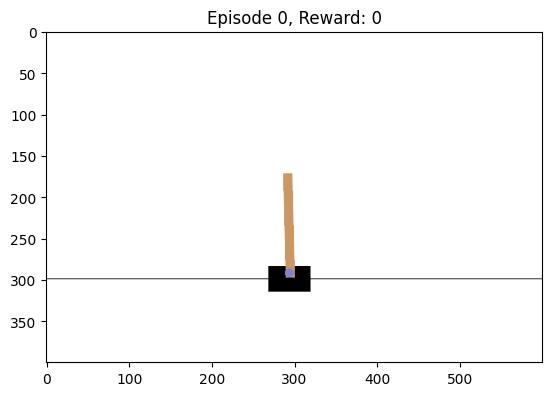

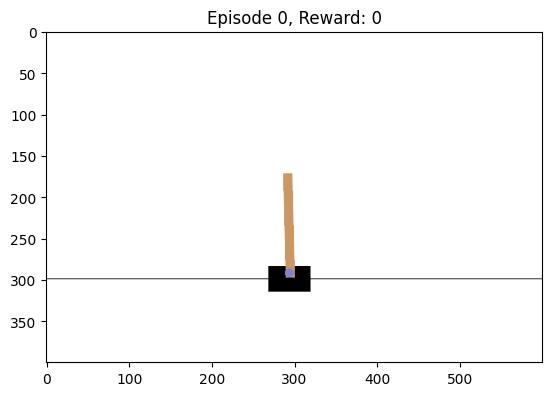

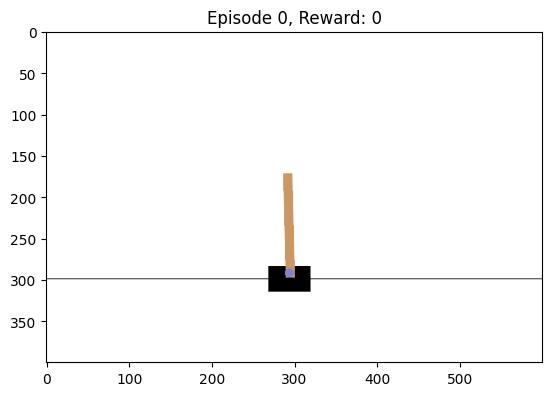

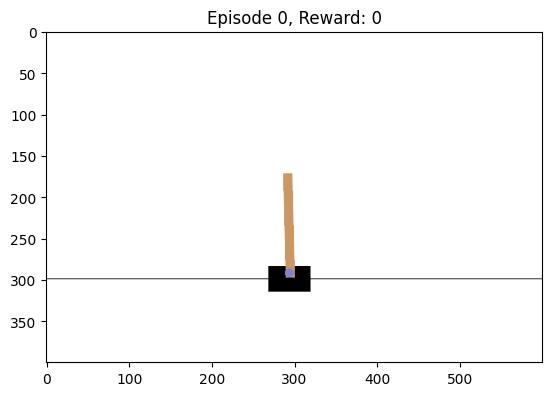

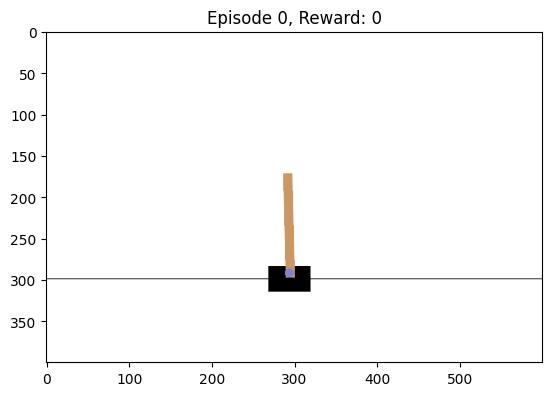

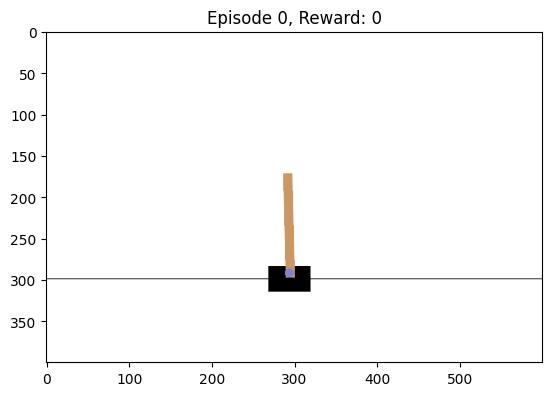

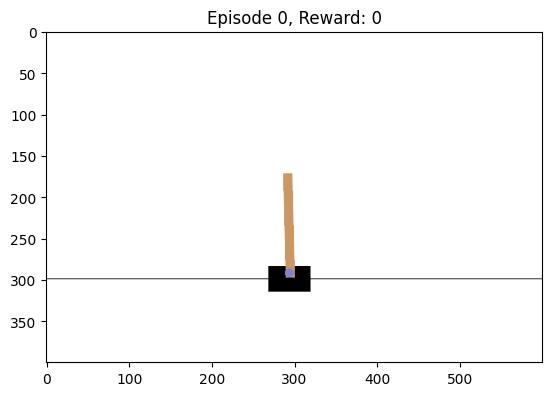

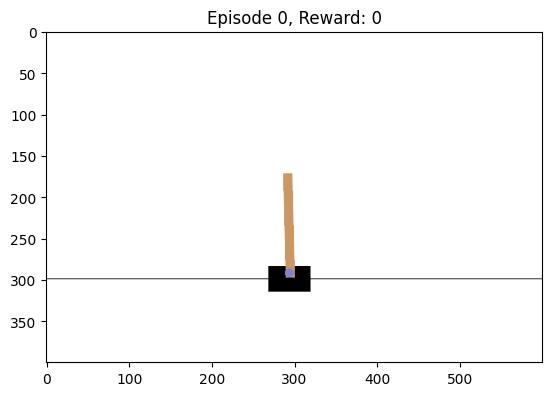

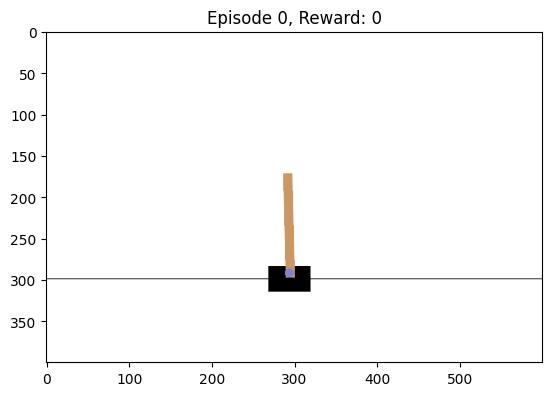

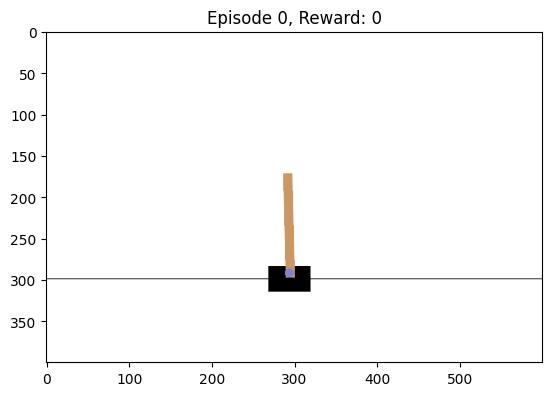

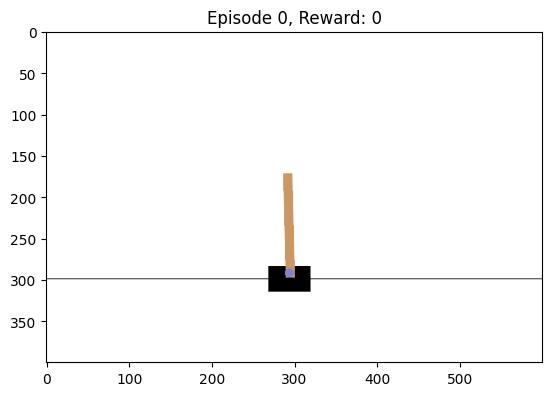

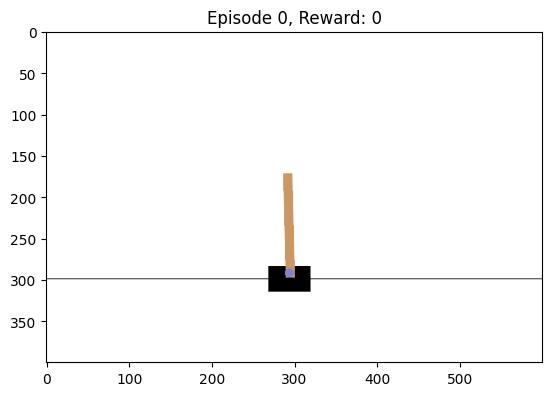

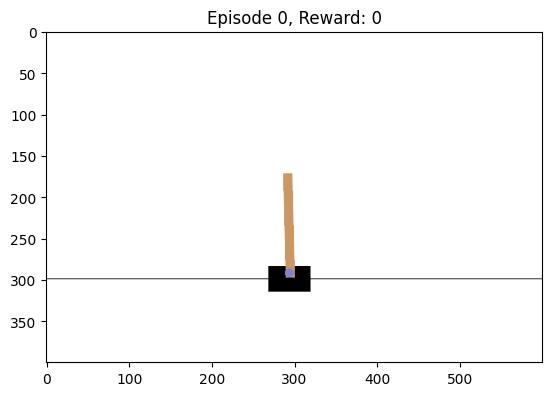

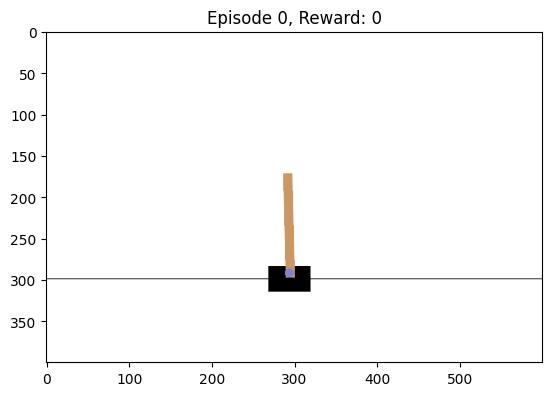

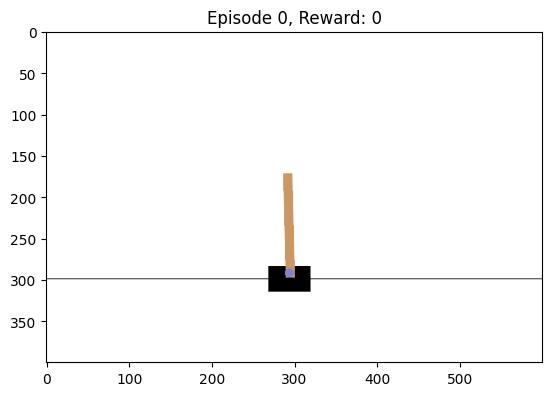

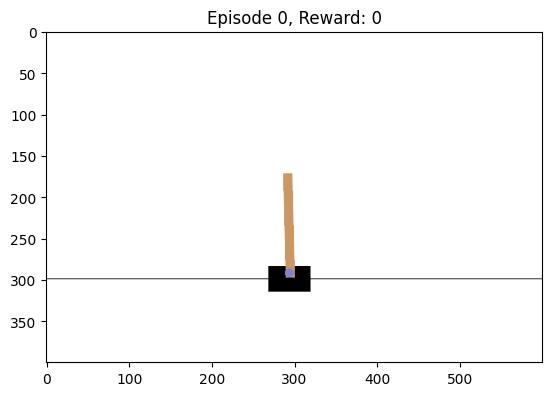

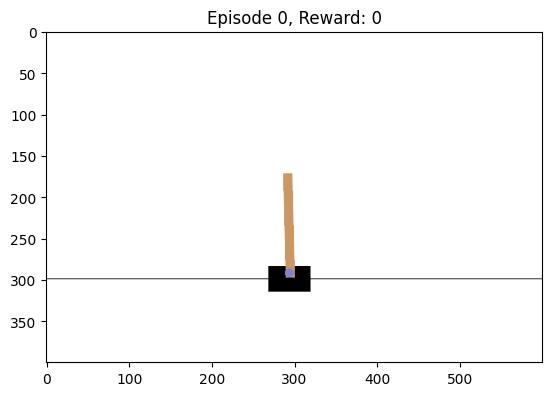

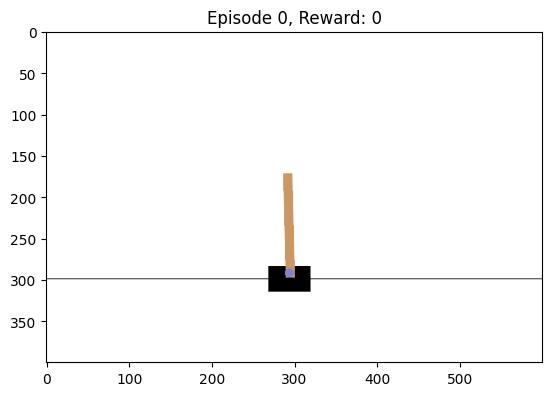

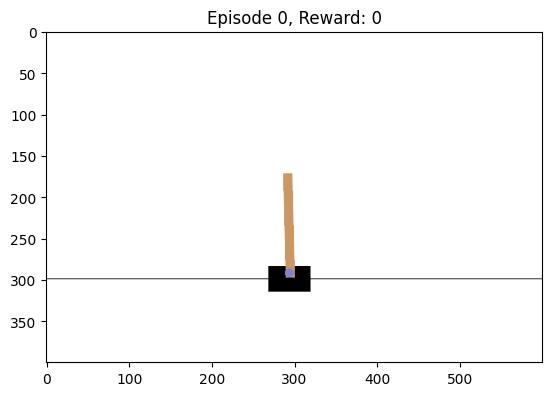

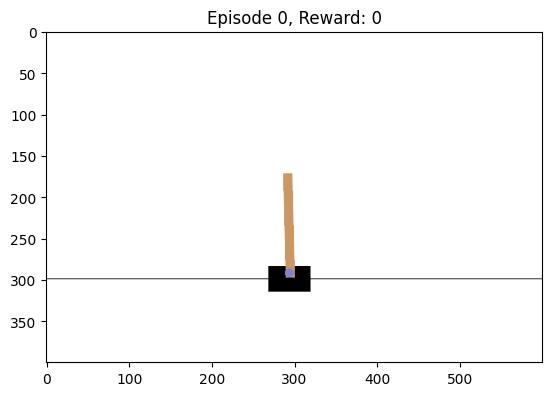

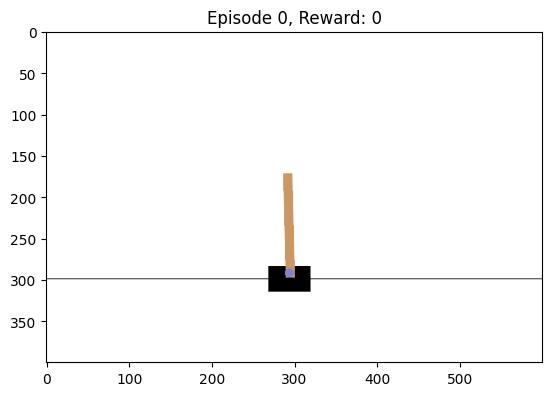

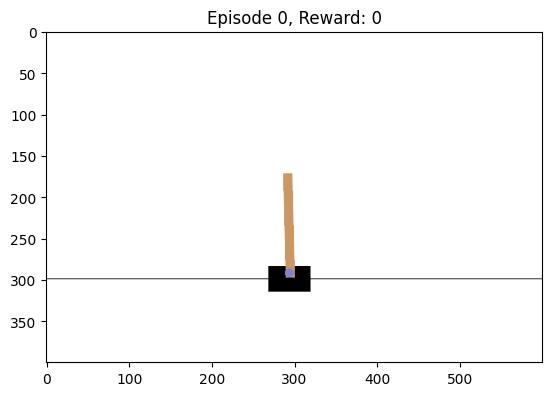

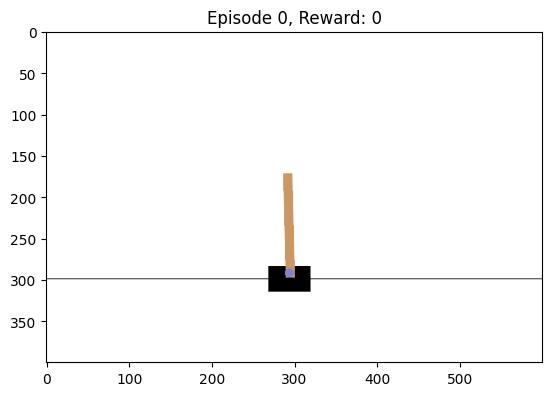

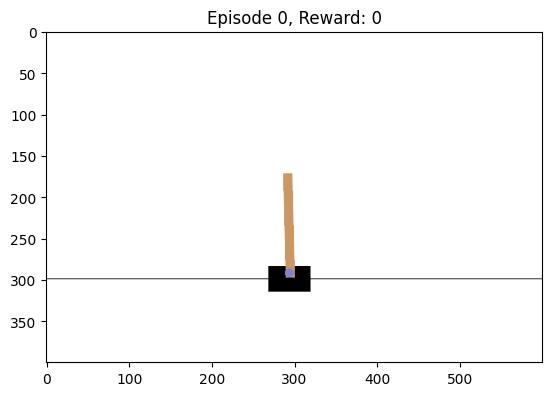

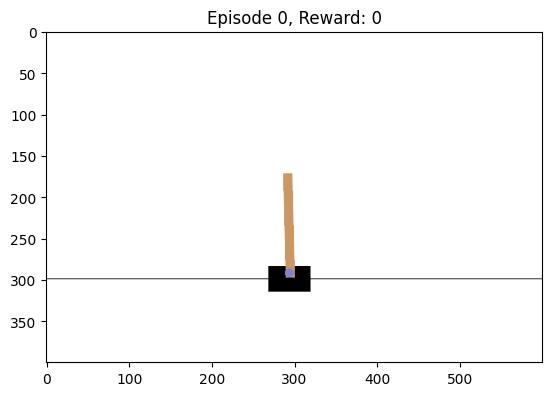

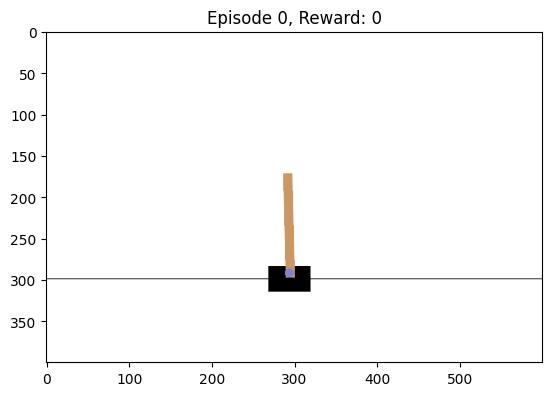

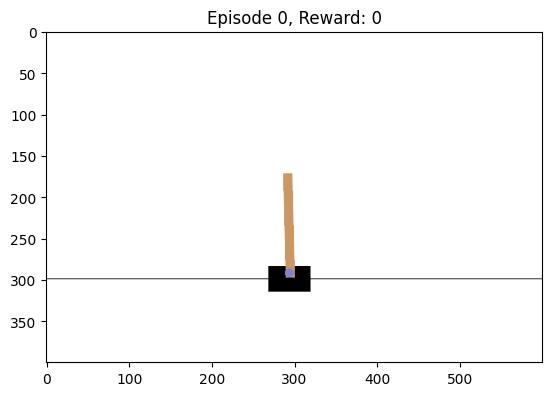

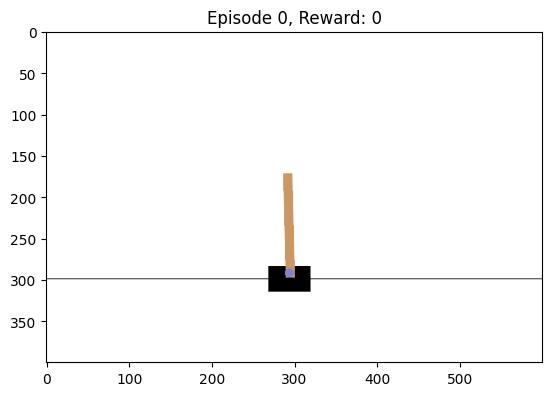

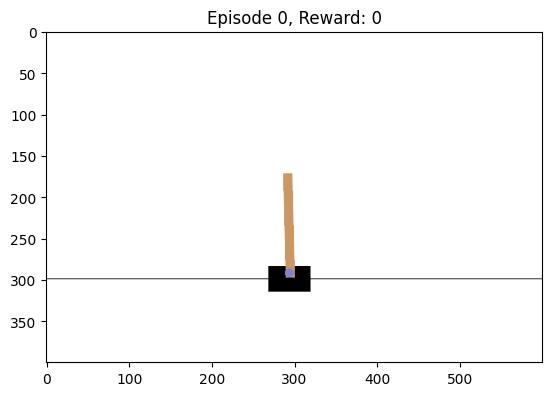

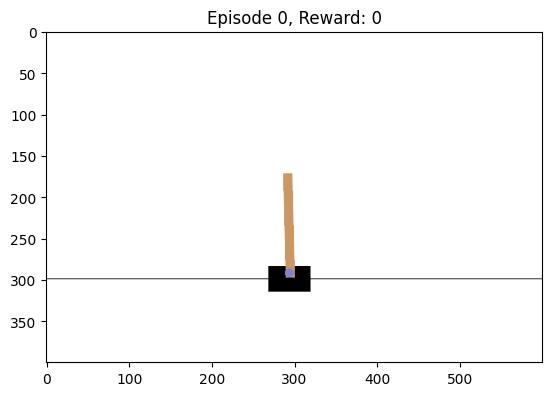

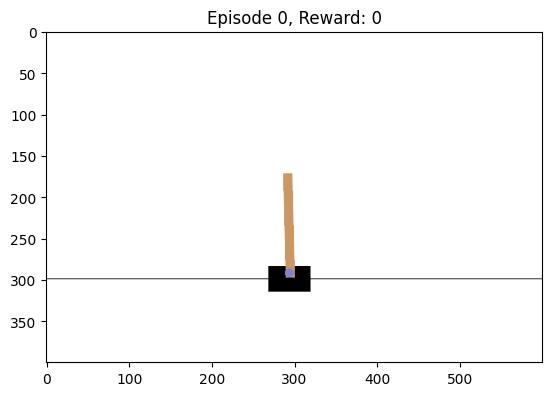

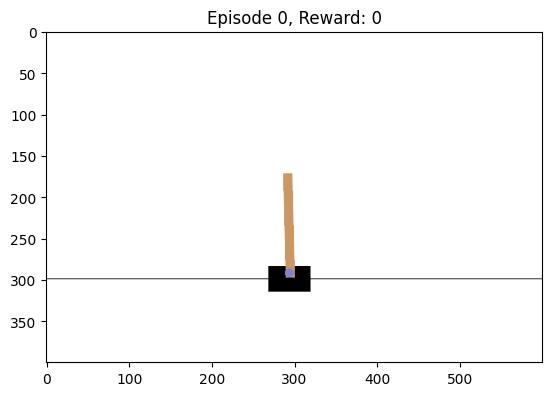

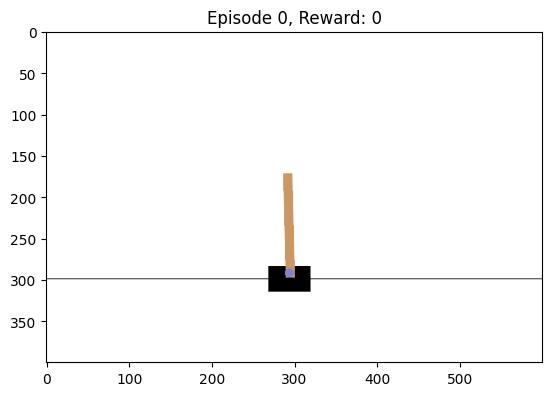

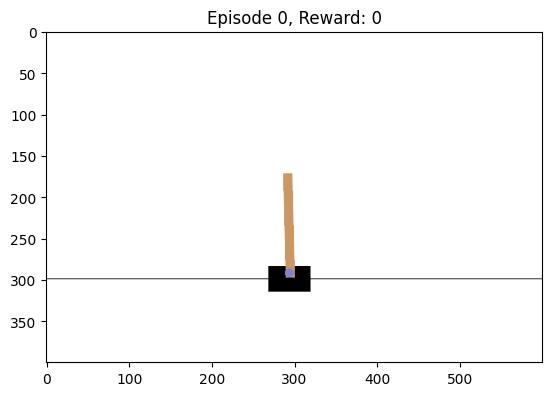

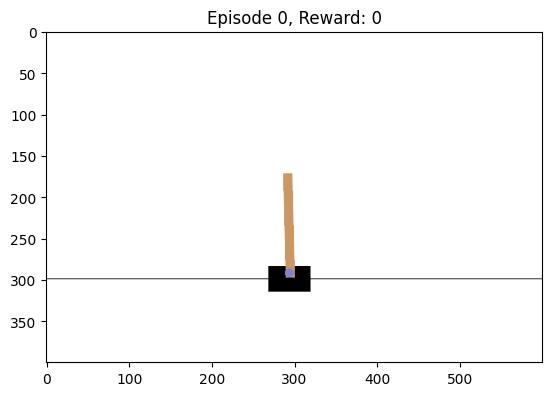

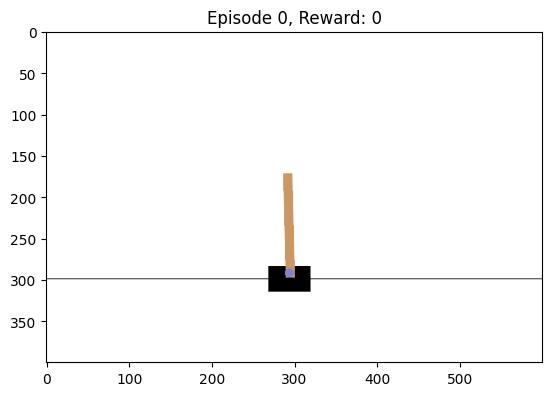

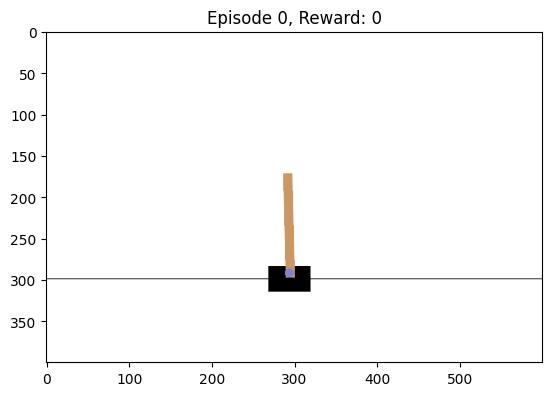

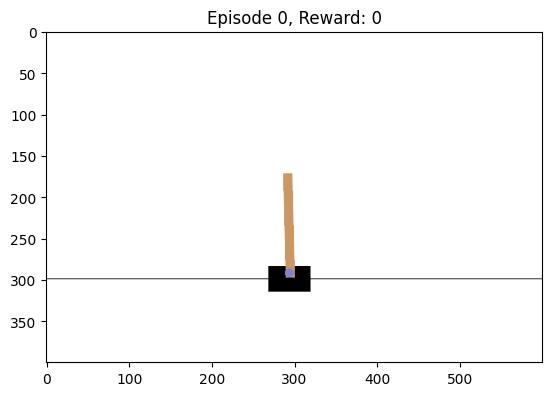

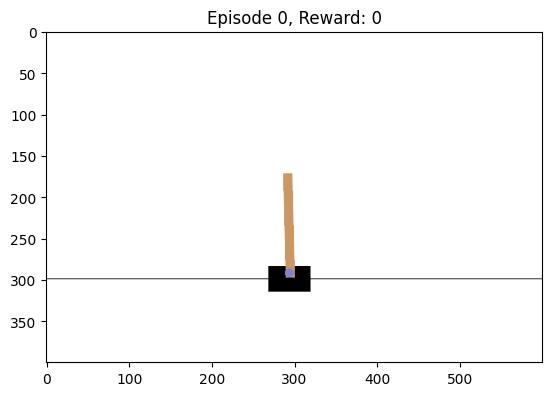

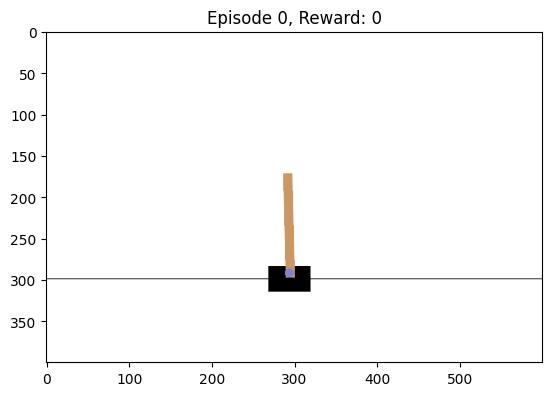

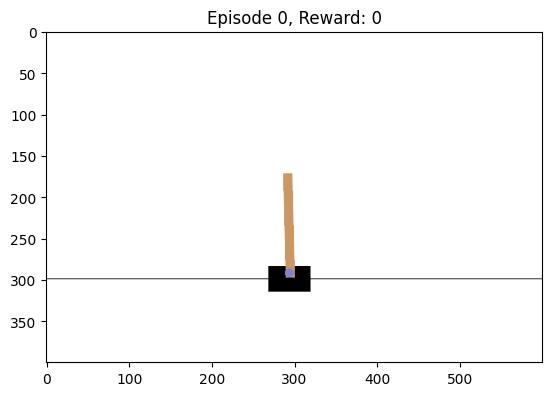

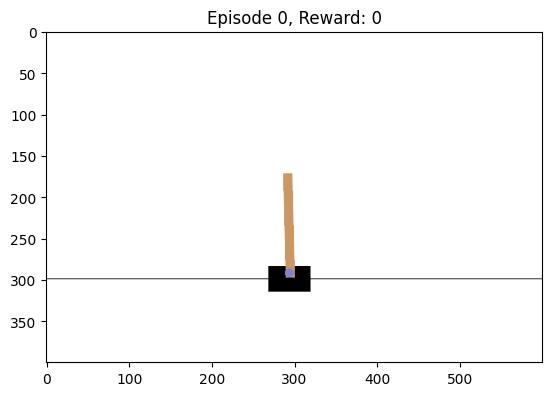

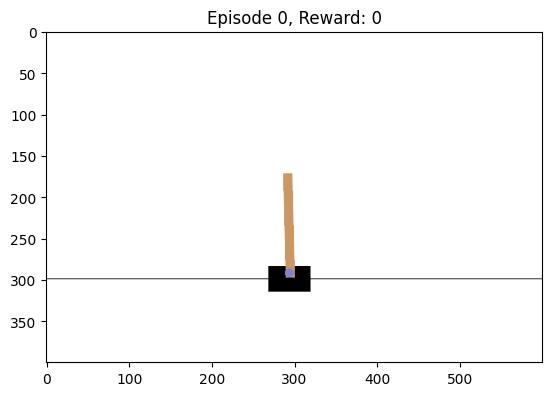

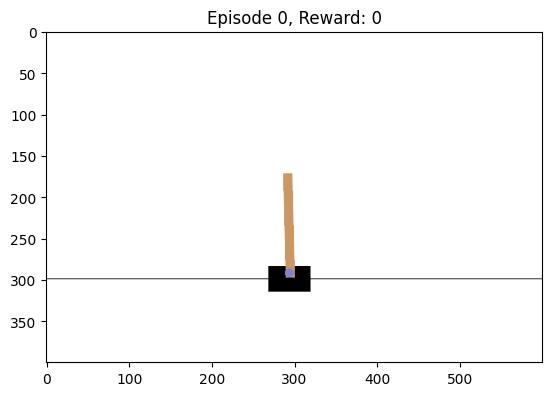

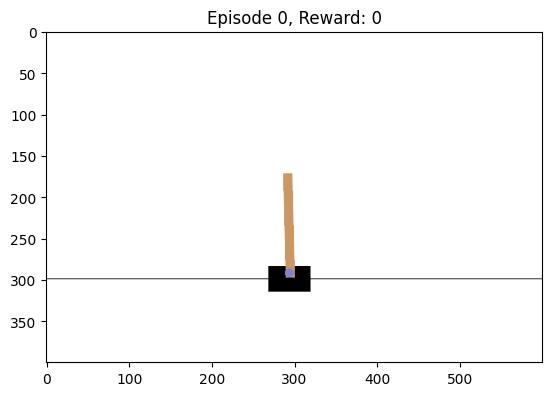

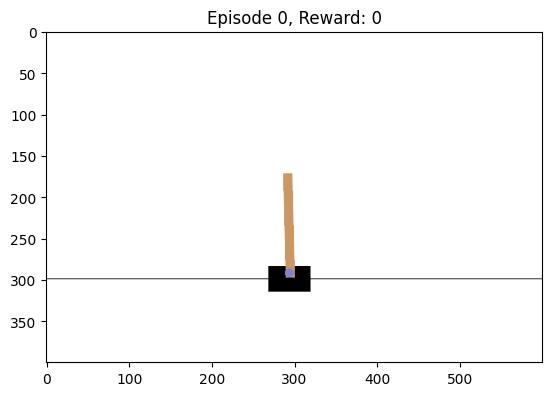

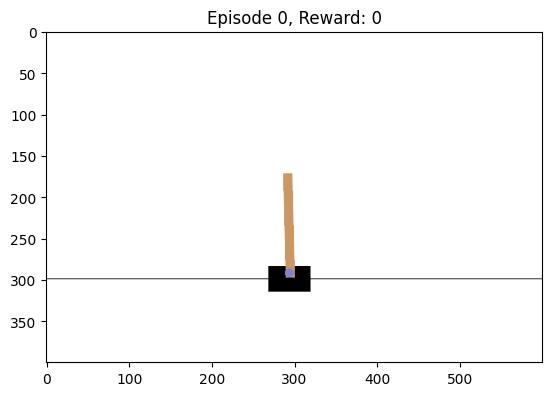

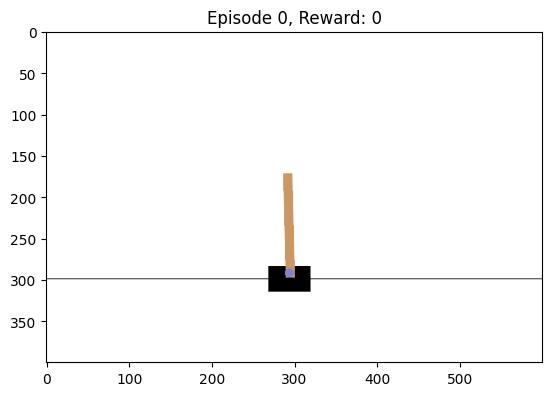

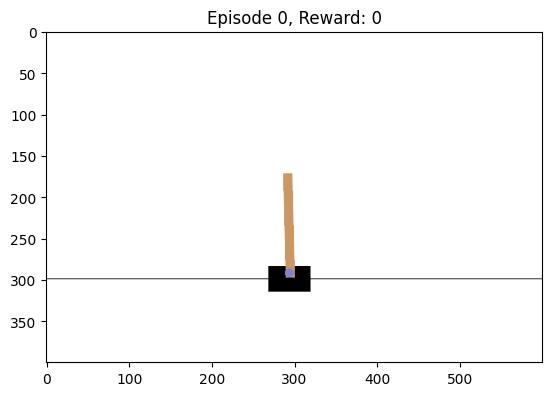

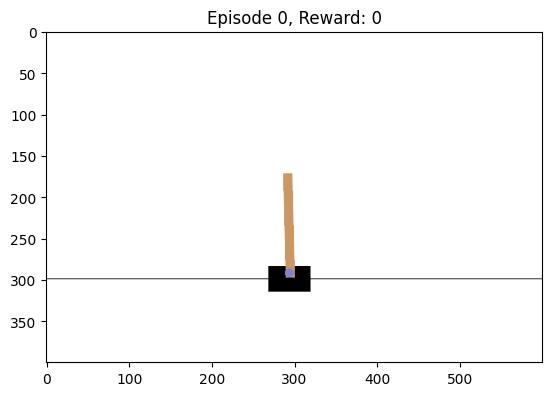

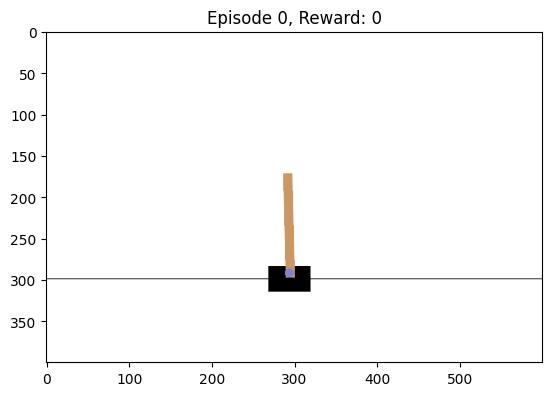

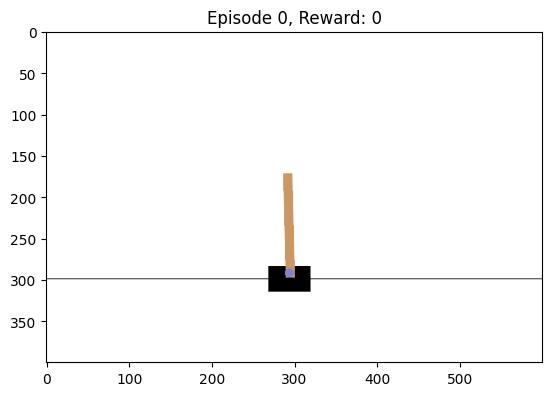

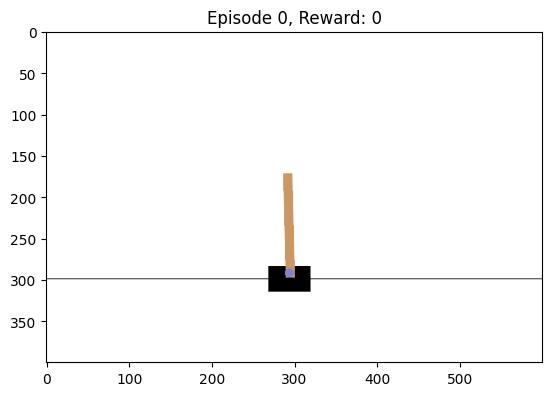

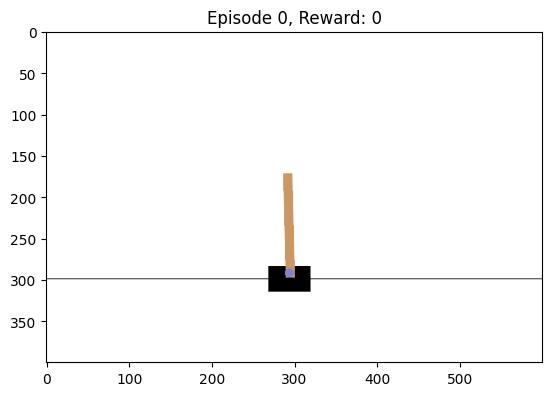

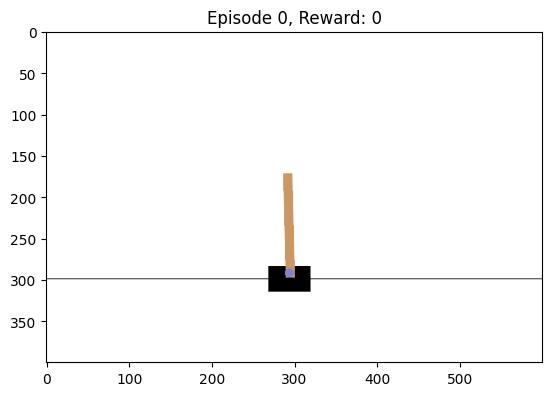

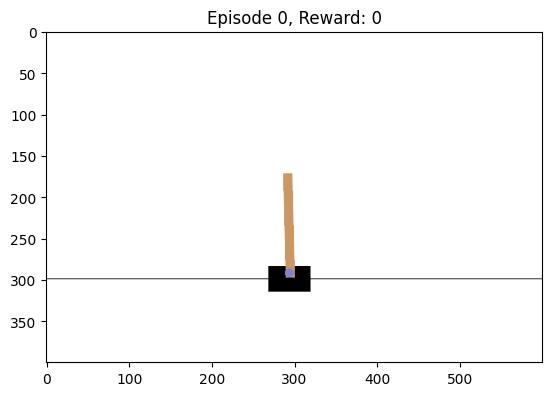

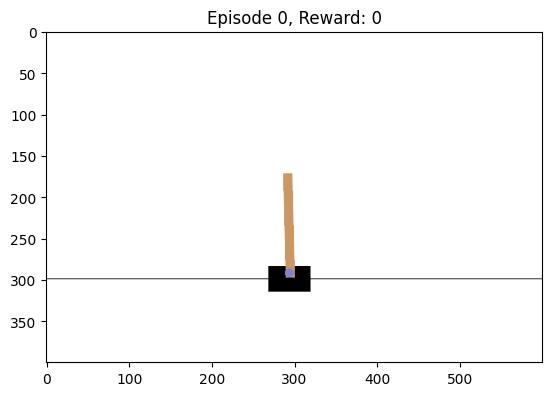

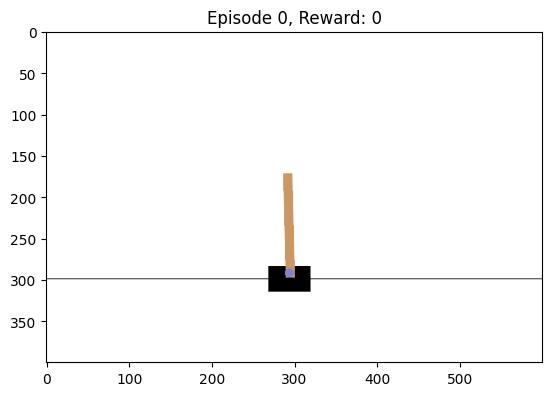

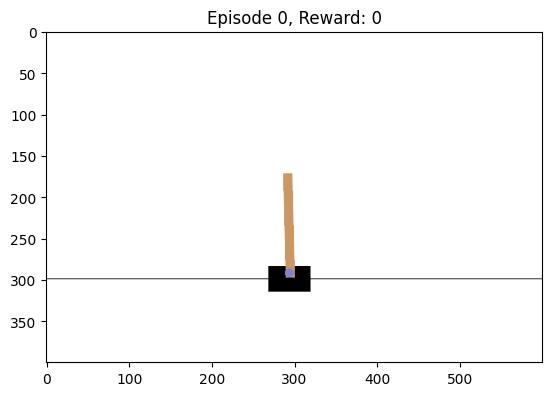

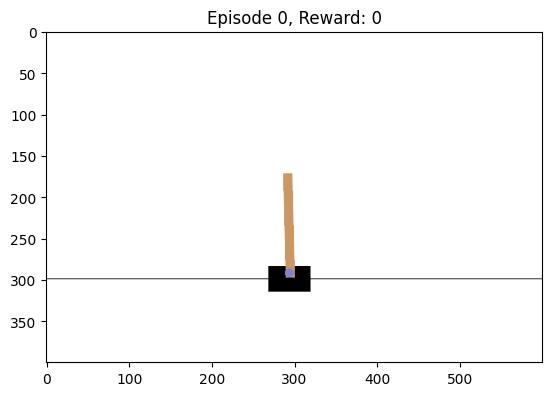

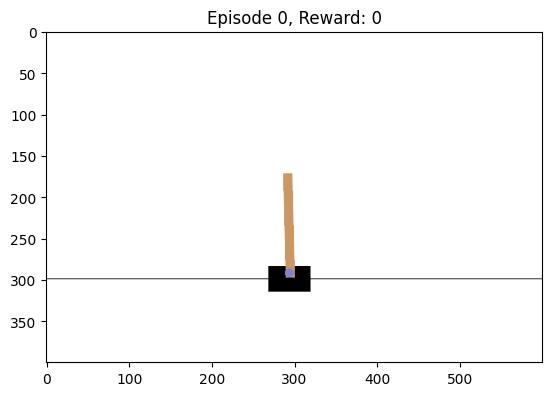

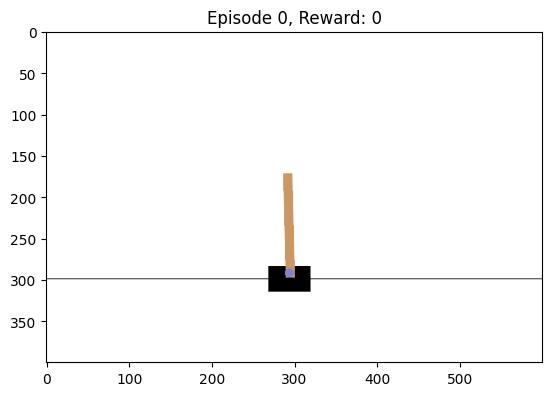

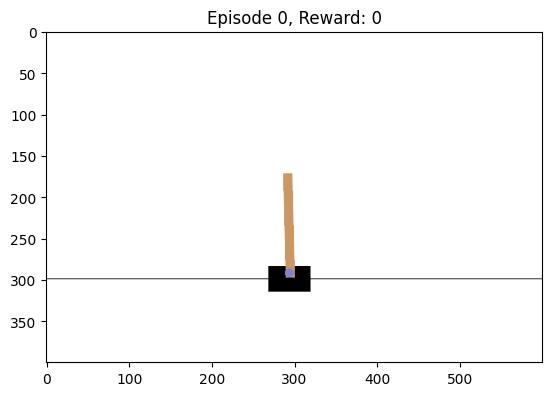

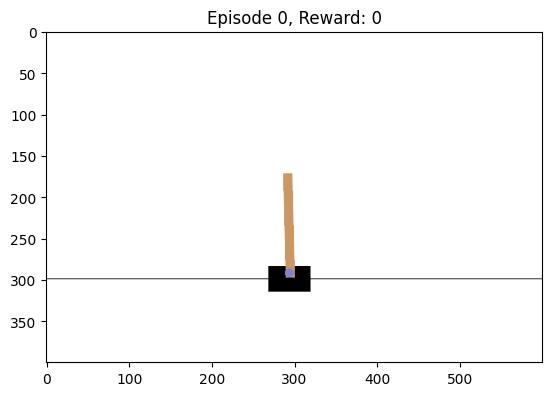

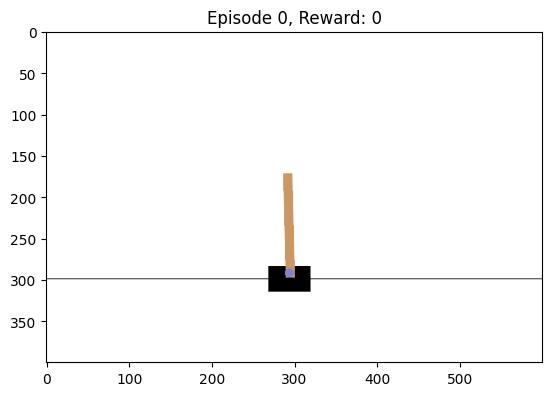

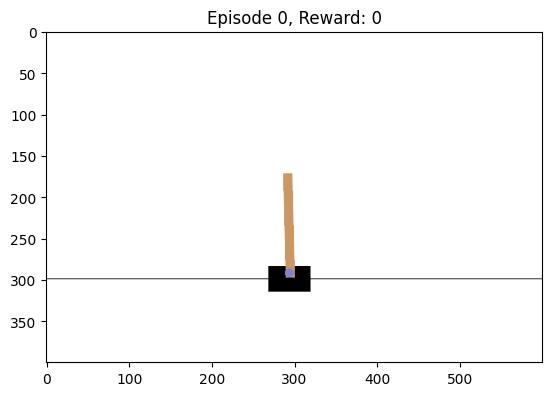

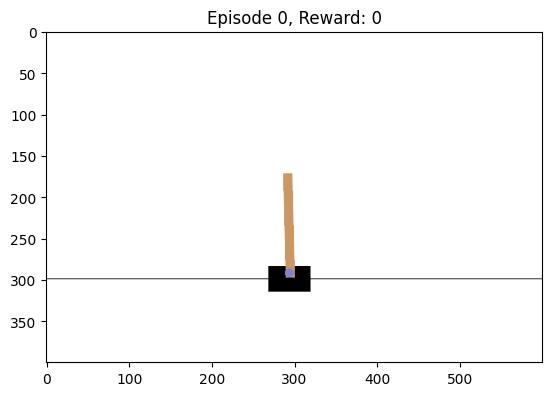

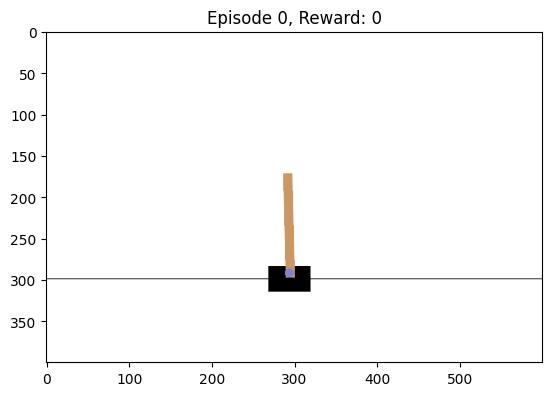

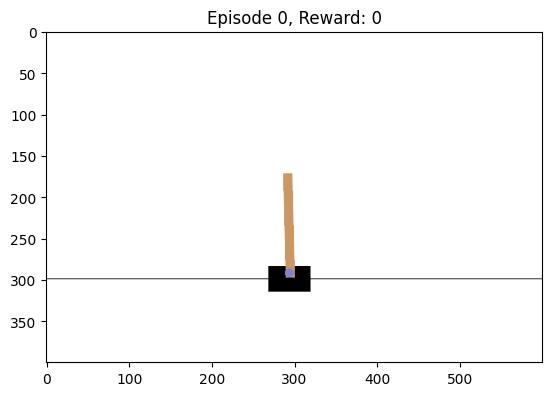

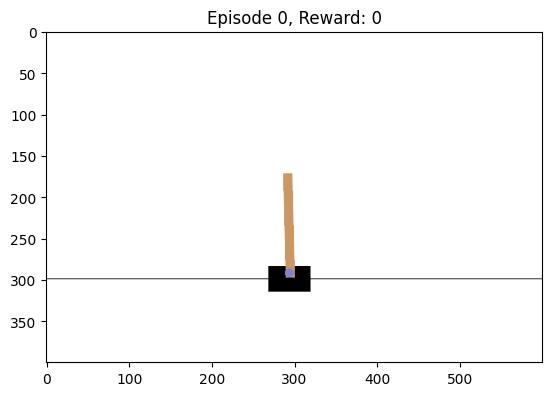

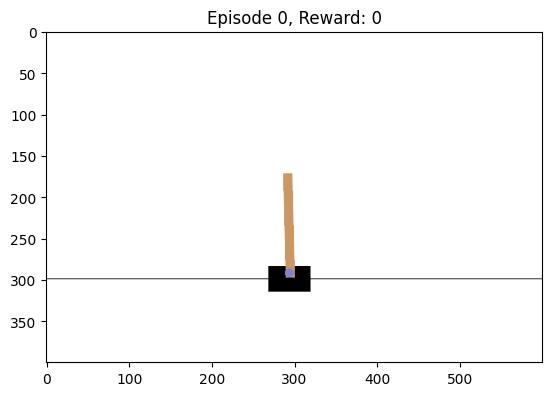

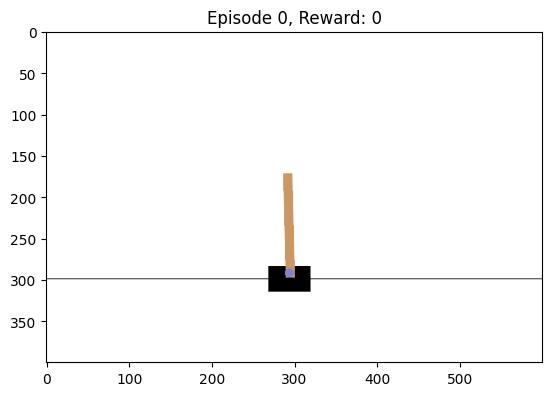

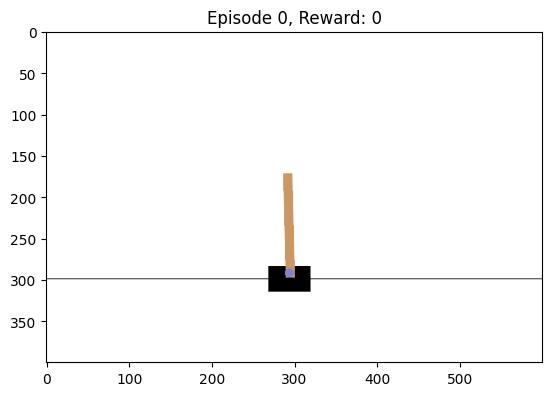

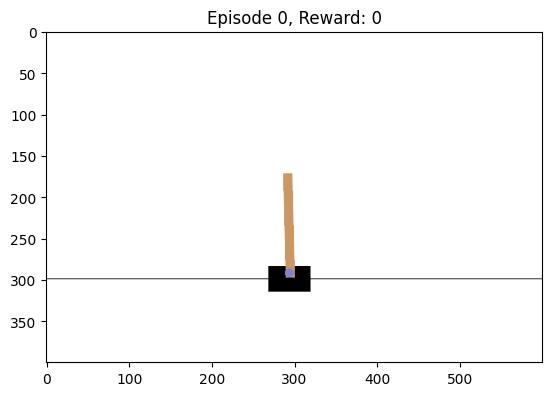

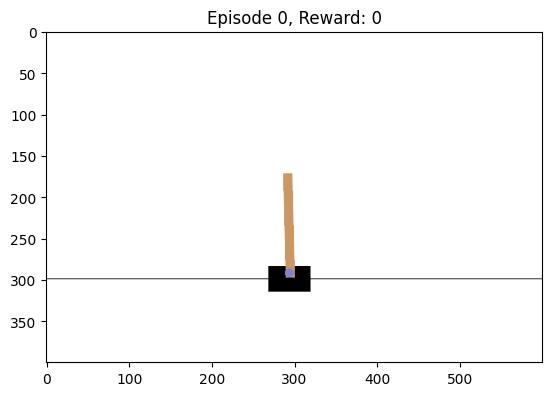

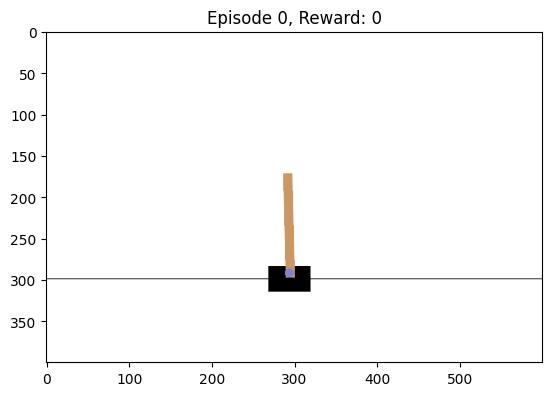

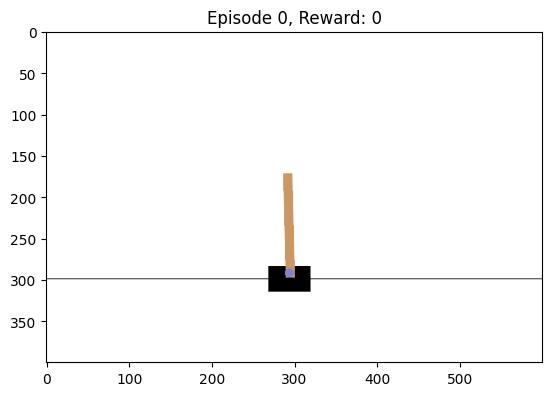

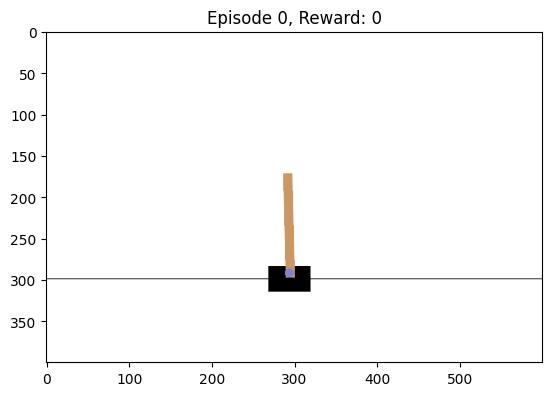

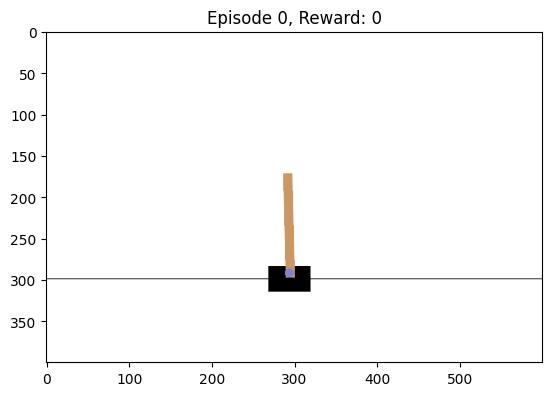

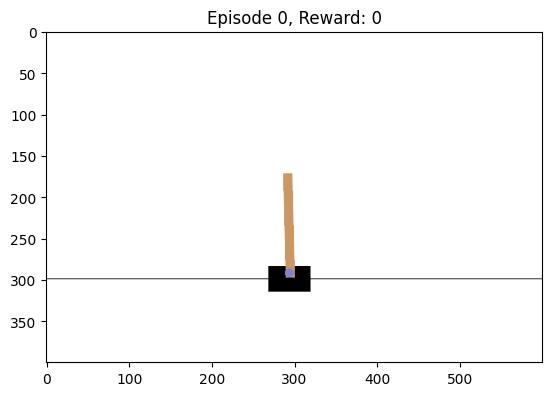

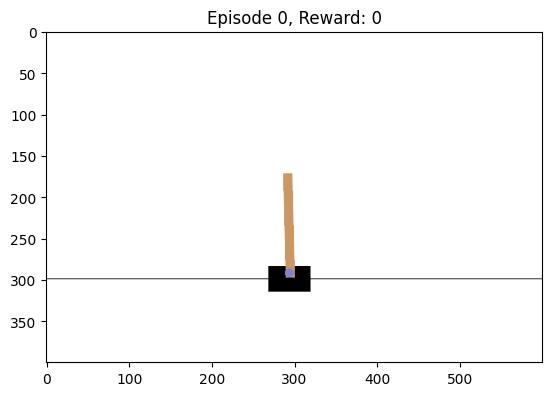

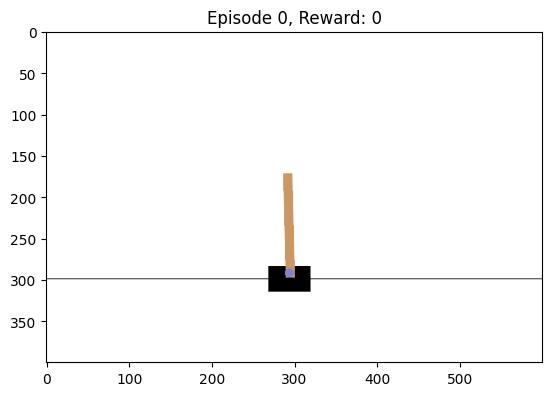

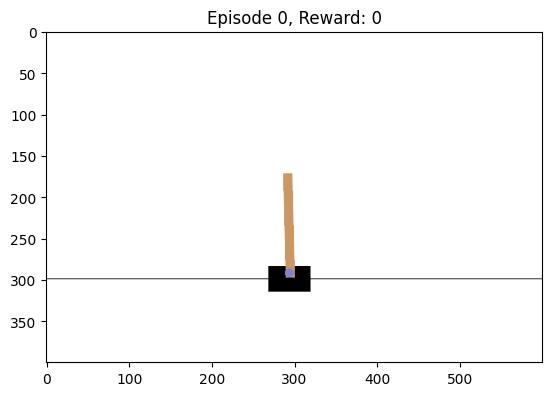

KeyboardInterrupt: 

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

# Create environment
env = gym.make("CartPole-v1", render_mode="rgb_array") # Set render_mode for visualization

# ... (Rest of the DQN, ReplayBuffer, and train_dqn code remains the same) ...

def train_dqn(episodes=500, batch_size=64):
    # ... (Existing code) ...

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0

        while True:
            # ... (Existing code) ...

            if ep % 100 == 0:  # Render every 100 episodes
                # Remove the squeezing part since the dimensions are (400, 600, 3)
                rendered_frame = env.render()
                plt.imshow(rendered_frame)
                plt.title(f"Episode {ep}, Reward: {total_reward}")
                plt.pause(0.01)  # Pause to display the frame
                plt.clf()  # Clear the plot for the next frame

            # ... (Existing code) ...

    # ... (Existing code) ...

rewards = train_dqn()

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("DQN on CartPole")
plt.show()